<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>

# **HR Attrition**

In [173]:
# import needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats


############################################ FEATURE SELECTION ############################################
!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')

from datetime import date
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

############################################## PREPROCESSING ##############################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

################################################# MODELS ##################################################
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.feature_selection import chi2


################################################# METRICS #################################################
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report


################################### MODEL SELECTION & OPTIMIZATION ########################################
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

######################################### DECISION TREES PLOTS ############################################
# in anaconda prompt: conda install python-graphviz
!pip install pydotplus
!pip install graphviz pydotplus
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz
from sklearn import tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import brier_score_loss
from sklearn.metrics import silhouette_score


######################################### SMOTE ############################################
!pip install imbalanced-learn 
!pip install xgboost
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier



from sklearn.decomposition import PCA


<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>
    
# **1. EDA - Exploratory Data Analysis** </font></a>


<a class="anchor" id="2nd-bullet">
<font color = '#2f4bd6ff'>
    
## **1.1. Data Upload** </font></a>


In section 1.1 we import the database "HR_Attrition_Dataset.csv".

In [174]:
df = pd.read_csv("HR_Attrition_Dataset.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **1.2 Initial characterization of the database** </font></a>

The database has a size of 1,470 rows and 35 columns, with no duplicate records identified. Regarding the types of variables, it was found that the dataset is composed of 35 variables, of which 9 are categorical and 26 are numerical.

The target variable is “Attrition”.

In [175]:
# Describe dataset structure
df.shape

(1470, 35)

In [176]:
# Verify the existance of null-values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null-values

In [177]:
# Verify the existance of duplicate values
df[df.duplicated()]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

There are no duplicate values

In [178]:
# Check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [179]:
df.nunique()


Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [180]:
#Set Index
df.set_index(keys=df['EmployeeNumber'],inplace=True)

In [181]:
df.drop(columns=['EmployeeNumber'], inplace=True)


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **1.3  Basic exploration of the Data Frame and initial preprocessing** </font></a>

An initial exploration of the training data was carried out with the aim of obtaining an overall view of the dataset’s contents and identifying any potential preprocessing needs.
This step was essential to understand the data structure and to detect inconsistencies, missing values, or duplicates that could compromise the quality of the subsequent analysis.

In [182]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [183]:
#Analyze the main statistics of the numerical variables
df.describe().T

count          mean          std     min     25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.0   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.0   
Education                 1470.0      2.912925     1.024165     1.0     2.0   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.0   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.0   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.0   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.0   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.0   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.0   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.0   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.0   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.0   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.0   
StandardHours             1470.0     80.000000     0.000000    80.0    80.0   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.0   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.0   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.0   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.0   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [184]:
#Analyze the main statistics of the categorical variables
df.describe(include=['object']).T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

'EmployeeCount' is always = 1 (std = 0) - remove

'StandardHours' is always = 80 (std = 0) - remove

'Over18' is always =1 - remove

In [185]:
# Drop Columns
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18']
df.drop(columns=cols_to_drop, inplace=True)

df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [186]:
# Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [187]:
# Categorical Variables
categorical_cols = df.select_dtypes(exclude=['number']).columns
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [188]:
# Observe Unique Values
# List of columns
columns = df.columns.tolist()

# Unique Values
for col in columns:
    unique_vals = df[col].unique()
    print(f"{col} → {unique_vals}")


Age → [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition → ['Yes' 'No']
BusinessTravel → ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate → [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  

<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>
    
# **2. Data Splitting: Train / Validation / Test sets** </font></a>

In [189]:
# 1. Start from the original cleaned dataset
data_model = df.copy()

# 2. Ensure EmployeeNumber is the index BEFORE splitting (critical!)
if "EmployeeNumber" in data_model.columns:
    data_model.set_index("EmployeeNumber", inplace=True)

# 3. Separate features and target
X = data_model.drop(columns='Attrition')
y = data_model['Attrition'].copy()

# 4. Split Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 5. Split Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

# 6. Summary
print(f"Training size: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation size: {len(X_val)} ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

print("\nTraining Distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nValidation Distribution:")
print(y_val.value_counts(normalize=True) * 100)

print("\nTest Distribution:")
print(y_test.value_counts(normalize=True) * 100)




Training size: 1029 (70.0%)
Validation size: 220 (15.0%)
Test size: 221 (15.0%)

Training Distribution:
Attrition
No     83.867833
Yes    16.132167
Name: proportion, dtype: float64

Validation Distribution:
Attrition
No     84.090909
Yes    15.909091
Name: proportion, dtype: float64

Test Distribution:
Attrition
No     83.710407
Yes    16.289593
Name: proportion, dtype: float64


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **3. Visual Exploration** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.1 Target Variable** </font></a>

In [190]:
#Target Variable Distribution (Training Set)
# Count of each class
count = y_train.value_counts().sort_index()

# Percentage of each class
percent = y_train.value_counts(normalize=True).sort_index() * 100
percent = percent.map('{:,.2f} %'.format)

# Combine count and percentage in a dataframe
df_target = pd.concat([count, percent], axis=1)
df_target.columns = ['Nr of Employees', '%']
display(df_target)




Nr of Employees        %
Attrition                          
No                     863  83.87 %
Yes                    166  16.13 %

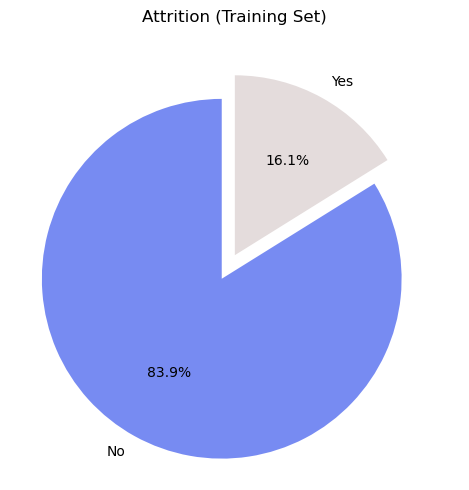

In [191]:

# Pie Chart

plt.figure(figsize=(5,5))
count.plot(
    kind='pie',
    labels=['No', 'Yes'],
    explode=(0.15, 0),
    startangle=90,
    autopct='%1.1f%%',
    colors=["#778bf2ff", "#e4dcdcff"]
)
plt.title("Attrition (Training Set)")
plt.ylabel('')
plt.tight_layout()
plt.show()


Employee Attrition:

    83.87% of employees stayed with the company.

    16.13% of employees left the company.

The dataset is imbalanced toward those who stayed.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.2 Categorical Variables** </font></a>

In [192]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(col)


BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


In [193]:
def analyze_categorical_train(X_train, y_train, feature):

    # Combine X_train and y_train
    df = X_train.copy()
    df['Target'] = y_train

    # --- Counts and percentages ---
    counts = df[feature].value_counts().sort_index()
    pct = df[feature].value_counts(normalize=True).sort_index() * 100
    pct = pct.map("{:,.2f}%".format)
    summary = pd.concat([counts, pct], axis=1)
    summary.columns = ['Count', '%']
    display(summary)

   # --- Count bar plot ---
    plt.figure(figsize=(8,5))
    sns.countplot(x=feature, data=df, palette="Blues", order=counts.index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # --- Target rate (temporary numeric conversion) ---
    df['_target_numeric'] = df['Target'].map({'No': 0, 'Yes': 1})
    rate = df.groupby(feature)['_target_numeric'].mean().reset_index()

    plt.figure(figsize=(8,5))
    sns.barplot(x=feature, y='_target_numeric', data=rate, palette="Blues", order=counts.index)
    plt.title(f'Target Rate by {feature}')
    plt.ylabel("Target Rate (0-1)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Count       %
Gender               
Female    419  40.72%
Male      610  59.28%

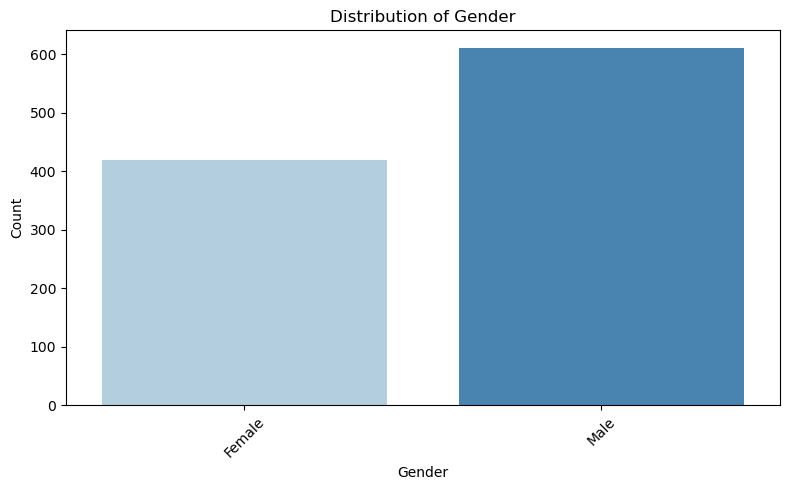

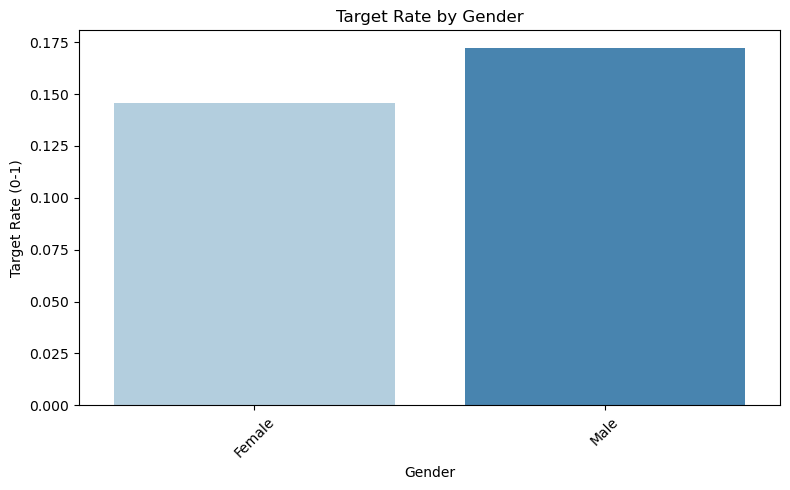

In [194]:
# Gender
analyze_categorical_train(X_train, y_train, 'Gender')

Count       %
MaritalStatus               
Divorced         228  22.16%
Married          477  46.36%
Single           324  31.49%

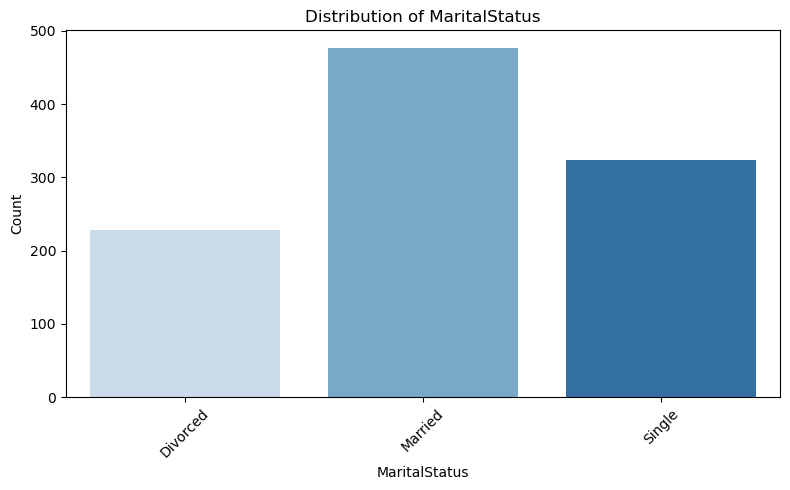

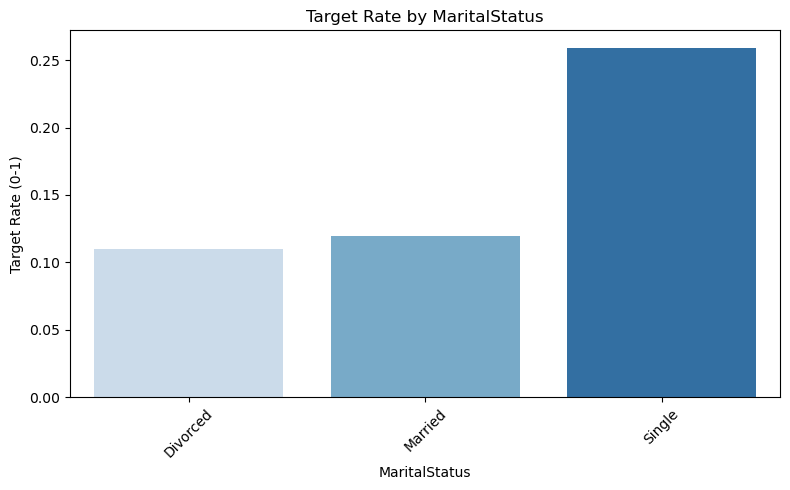

In [195]:
# MaritalStatus
analyze_categorical_train(X_train, y_train, 'MaritalStatus')

Count       %
EducationField                 
Human Resources      18   1.75%
Life Sciences       419  40.72%
Marketing           116  11.27%
Medical             321  31.20%
Other                49   4.76%
Technical Degree    106  10.30%

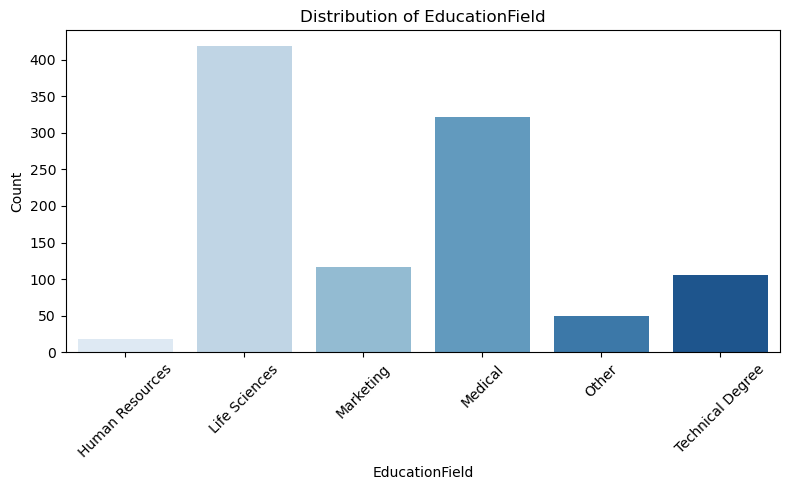

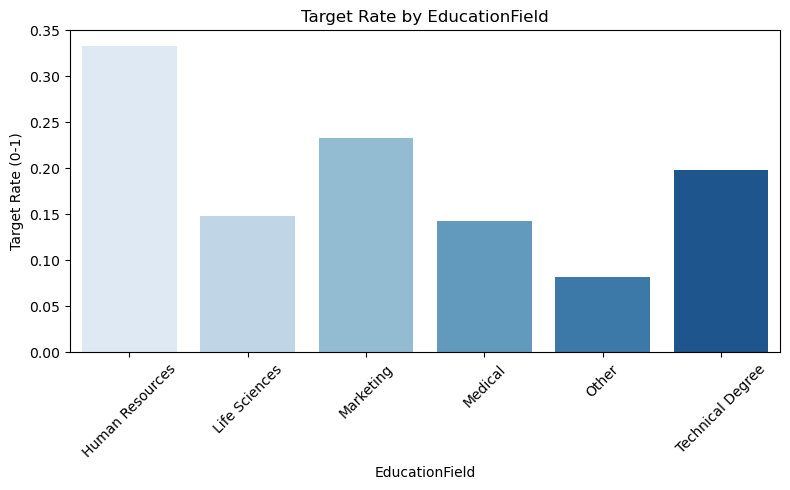

In [196]:
# EducationField
analyze_categorical_train(X_train, y_train, 'EducationField')

Count       %
Department                           
Human Resources            44   4.28%
Research & Development    668  64.92%
Sales                     317  30.81%

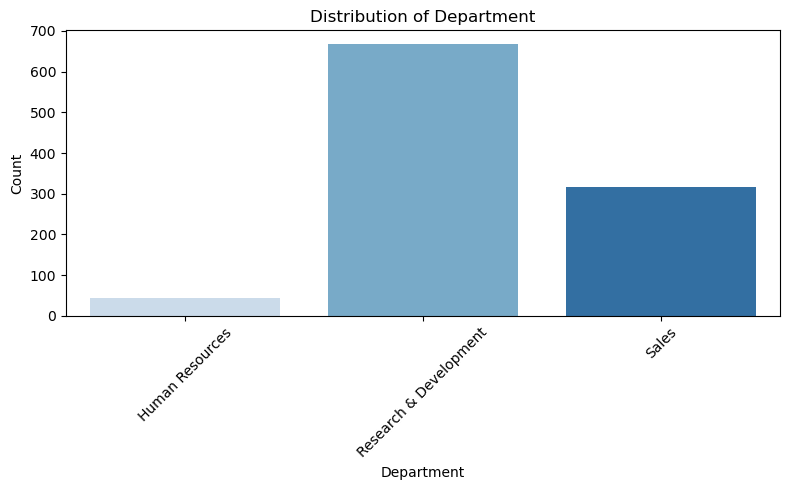

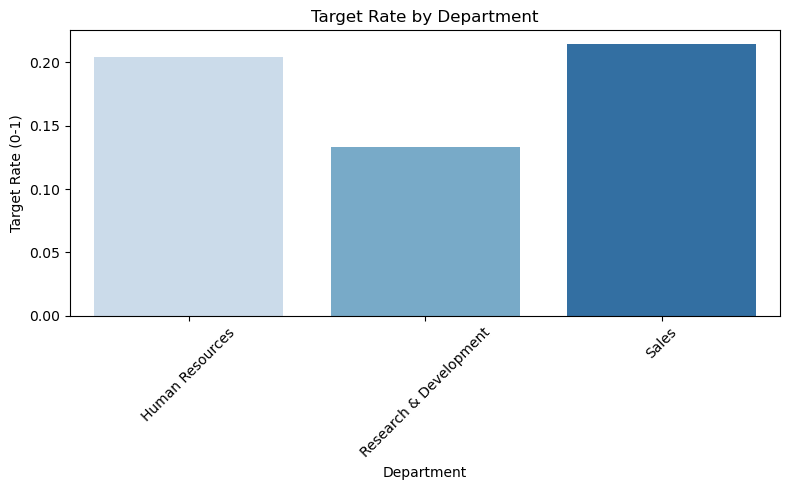

In [197]:
# Department
analyze_categorical_train(X_train, y_train, 'Department')

Count       %
JobRole                                 
Healthcare Representative     95   9.23%
Human Resources               37   3.60%
Laboratory Technician        182  17.69%
Manager                       74   7.19%
Manufacturing Director       101   9.82%
Research Director             54   5.25%
Research Scientist           195  18.95%
Sales Executive              239  23.23%
Sales Representative          52   5.05%

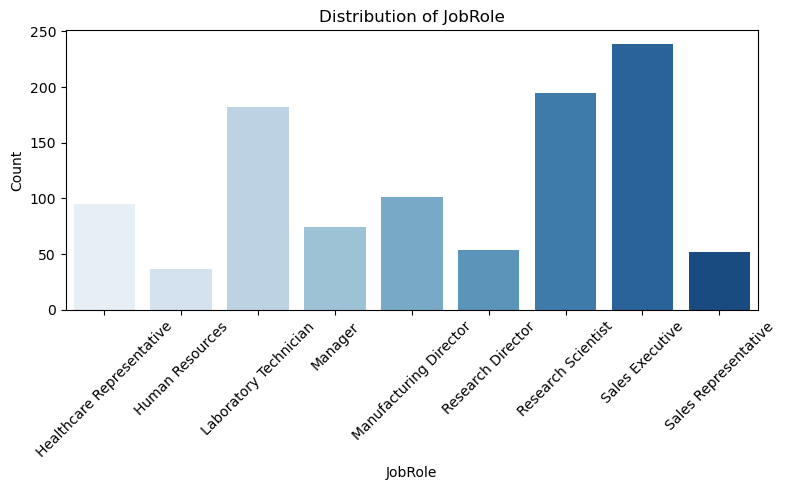

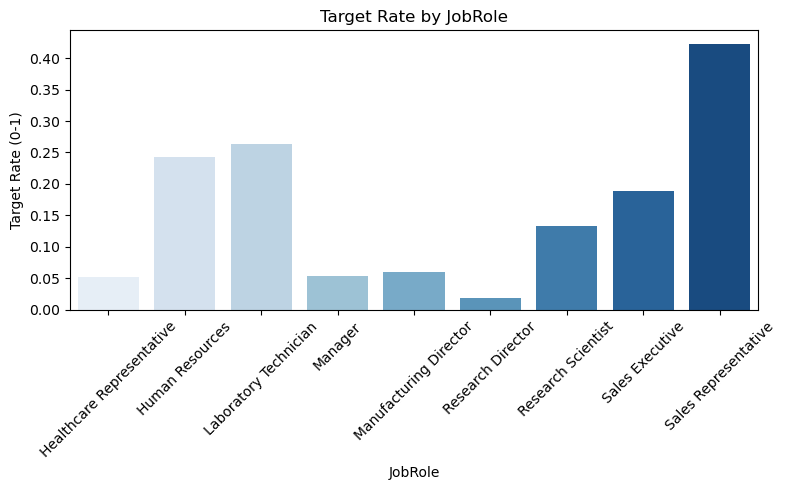

In [198]:
# Jobrole
analyze_categorical_train(X_train, y_train, 'JobRole')

Count       %
BusinessTravel                  
Non-Travel           112  10.88%
Travel_Frequently    185  17.98%
Travel_Rarely        732  71.14%

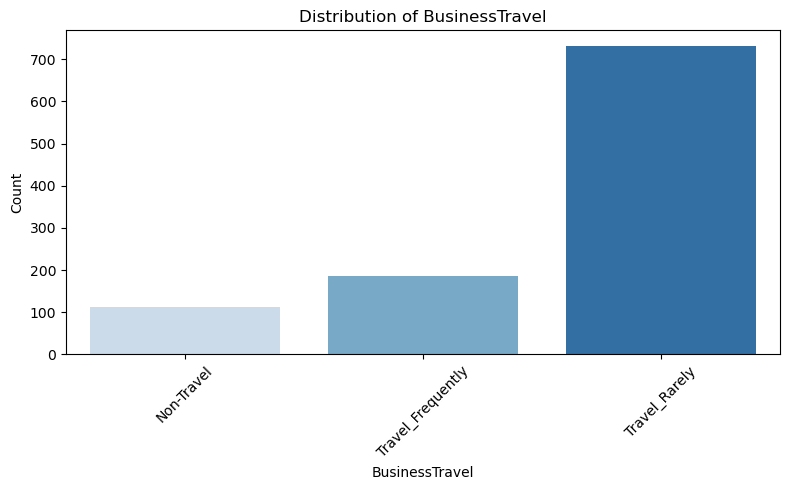

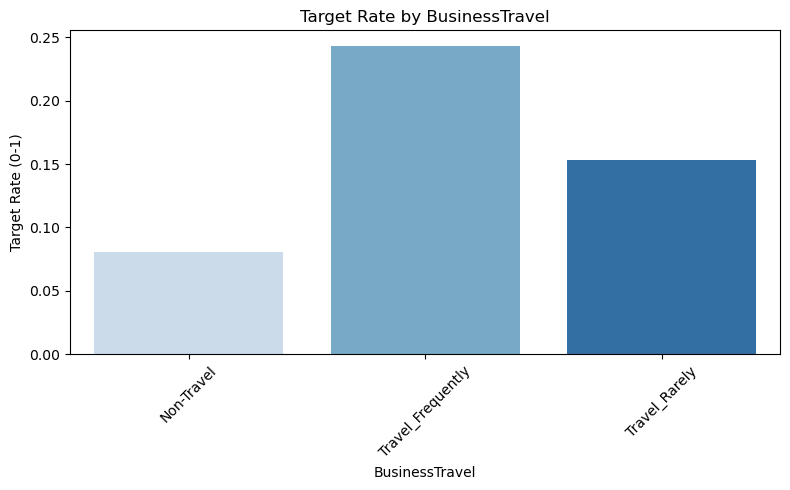

In [199]:
# BusinessTravel
analyze_categorical_train(X_train, y_train, 'BusinessTravel')

Count       %
OverTime               
No          727  70.65%
Yes         302  29.35%

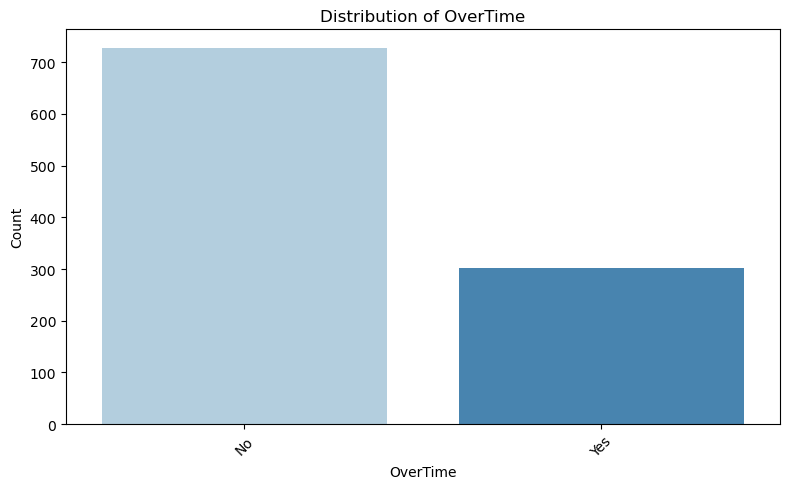

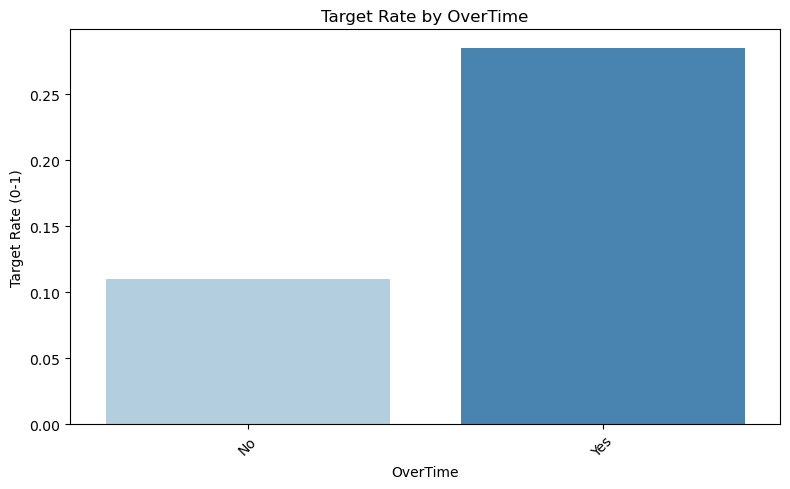

In [200]:
# OverTime
analyze_categorical_train(X_train, y_train, 'OverTime')

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.3 Numerical Variables** </font></a>

In [201]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    print(col)

Age
DailyRate
DistanceFromHome
Education
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [202]:
def analyze_numerical_train(X_train, y_train, feature, bins=10):
    df = X_train.copy()
    df['Target'] = y_train
    
    # Summary statistics 
    display(df[feature].describe().to_frame().T)
    
    # Histogram 
    plt.figure(figsize=(8,5))
    if pd.api.types.is_integer_dtype(df[feature]):
        sns.histplot(df[feature], kde=False, discrete=True, color='skyblue')
    else:
        sns.histplot(df[feature], kde=False, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Target rate 
    # Convert target to numeric 
    if df['Target'].dtype == 'O':
        df['_target_numeric'] = df['Target'].map({'No':0, 'Yes':1})
    else:
        df['_target_numeric'] = df['Target']
    
    # Bin the numeric feature for plotting target rate
    df['bin'] = pd.qcut(df[feature], q=bins, duplicates='drop')
    rate = df.groupby('bin')['_target_numeric'].mean().reset_index()
    
    plt.figure(figsize=(8,5))
    sns.barplot(x='bin', y='_target_numeric', data=rate, color='steelblue')
    plt.xticks(rotation=45)
    plt.ylabel('Target Rate (0-1)')
    plt.title(f'Target Rate by {feature}')
    plt.tight_layout()
    plt.show()



count       mean       std   min   25%   50%   75%   max
Age  1029.0  36.945578  9.165414  18.0  30.0  36.0  43.0  60.0

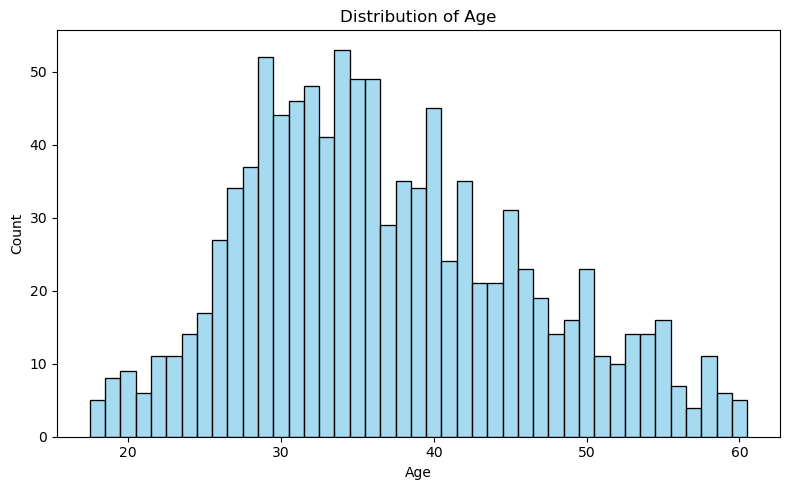

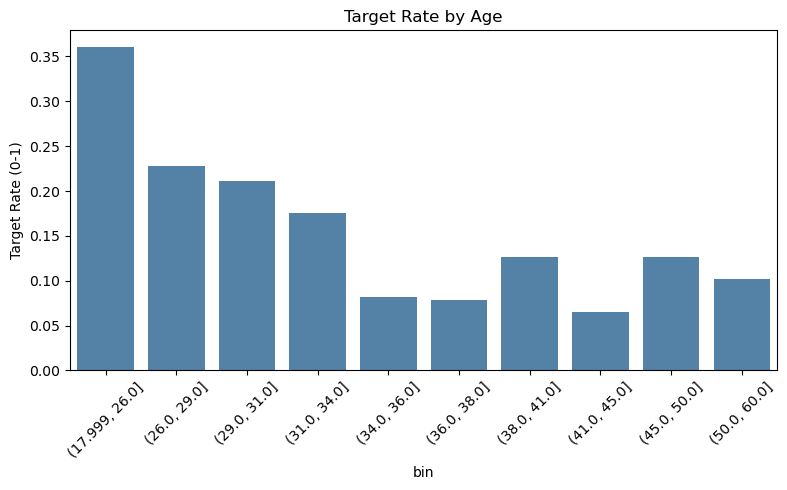

In [203]:
#Age
analyze_numerical_train(X_train, y_train, 'Age')


count        mean        std    min    25%    50%     75%     max
DailyRate  1029.0  809.543246  397.66673  103.0  479.0  805.0  1157.0  1499.0

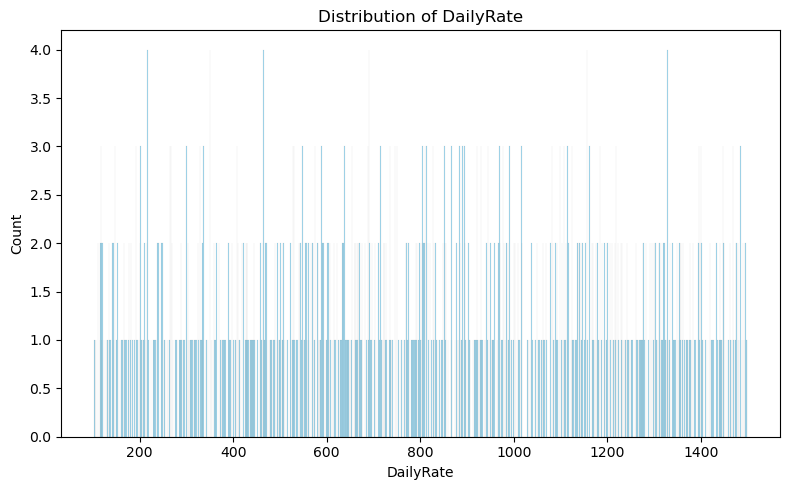

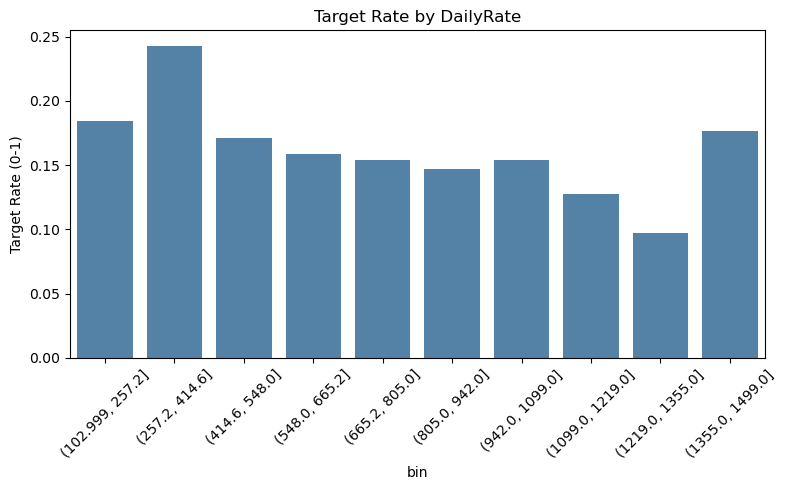

In [204]:
#DailyRate
analyze_numerical_train(X_train, y_train, 'DailyRate')

count      mean       std  min  25%  50%   75%   max
DistanceFromHome  1029.0  9.298348  8.160561  1.0  2.0  7.0  14.0  29.0

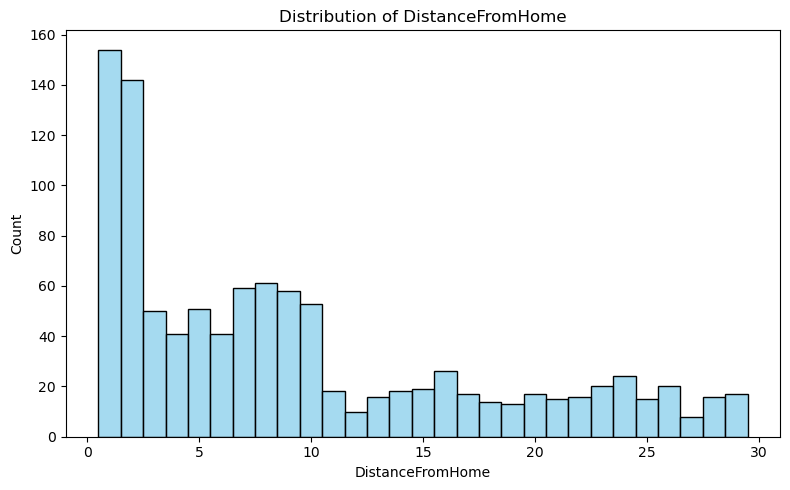

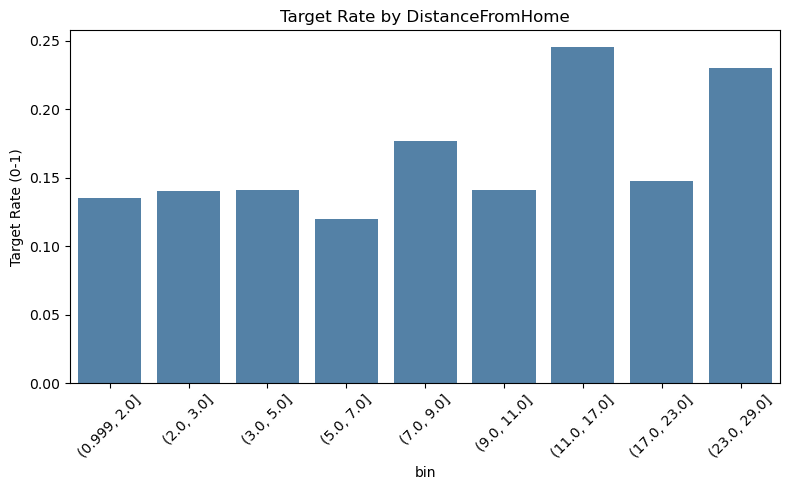

In [205]:
#DistanceFromHome
analyze_numerical_train(X_train, y_train, 'DistanceFromHome')

count    mean       std  min  25%  50%  75%  max
Education  1029.0  2.8931  1.031715  1.0  2.0  3.0  4.0  5.0

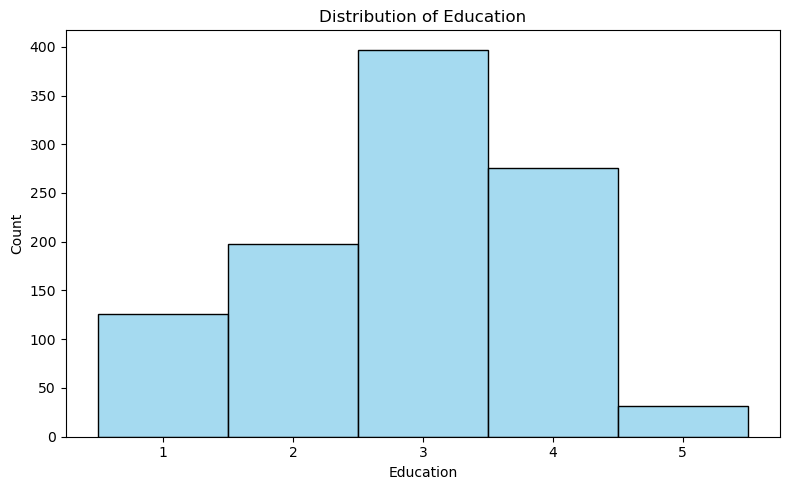

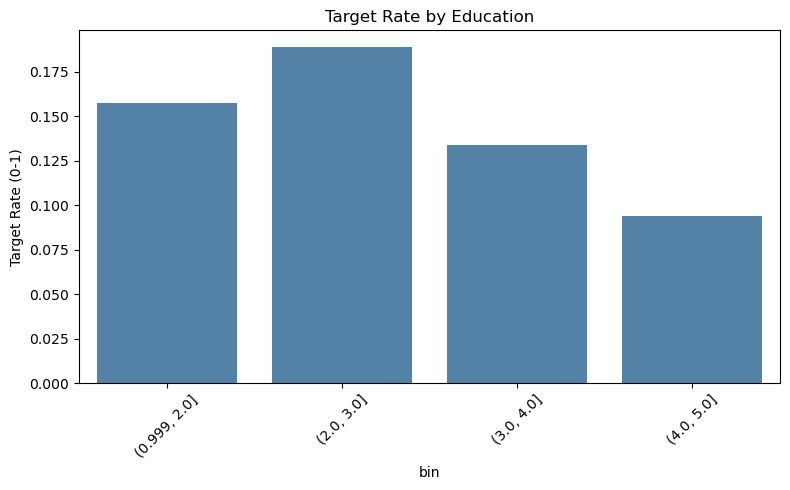

In [206]:
#Education
analyze_numerical_train(X_train, y_train, 'Education')

count      mean       std  min  25%  50%  75%  max
EnvironmentSatisfaction  1029.0  2.706511  1.085528  1.0  2.0  3.0  4.0  4.0

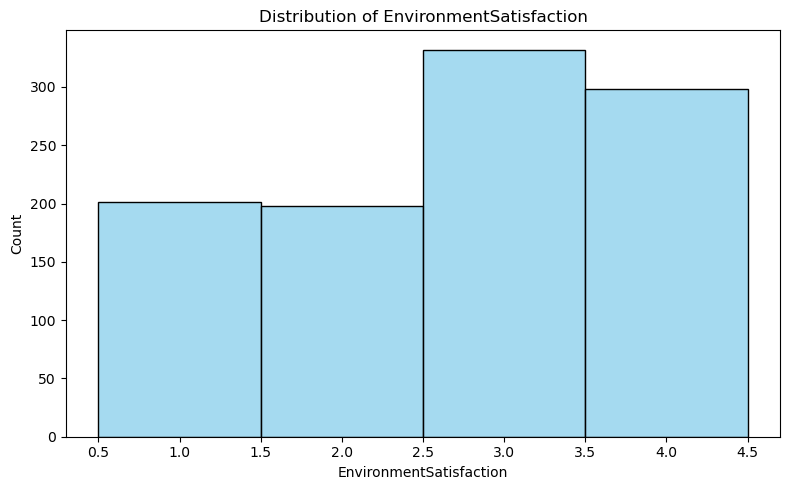

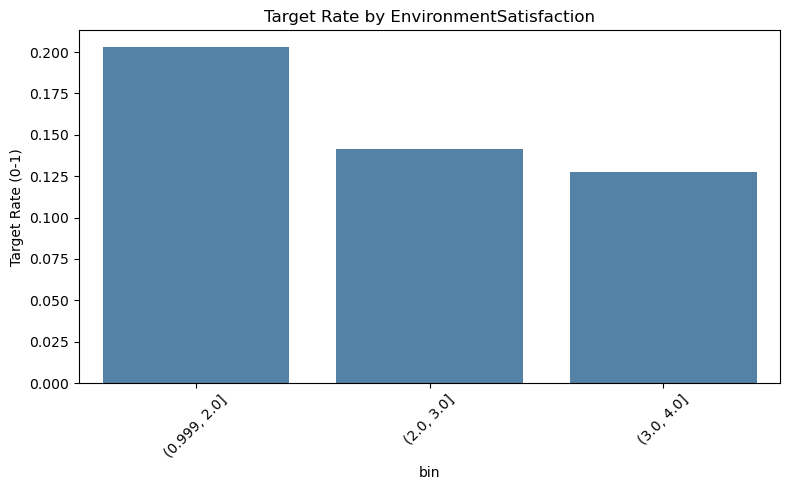

In [207]:
#EnvironmentSatisfaction
analyze_numerical_train(X_train, y_train, 'EnvironmentSatisfaction')


count       mean        std   min   25%   50%   75%    max
HourlyRate  1029.0  65.141885  20.345204  30.0  47.0  65.0  82.0  100.0

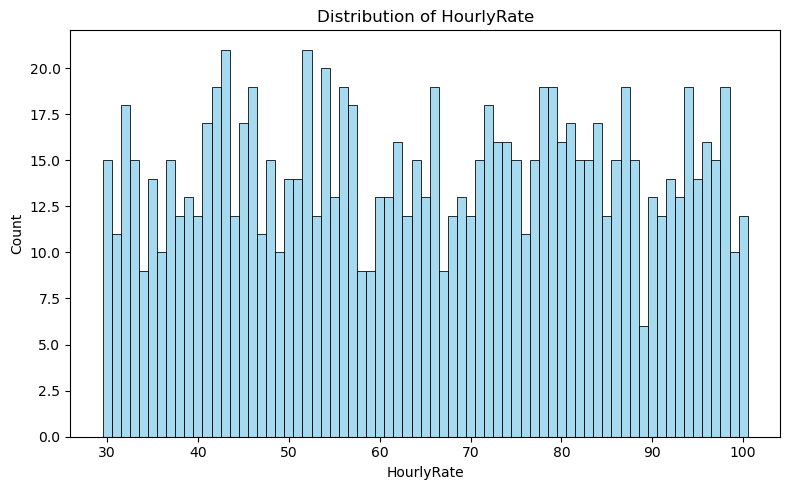

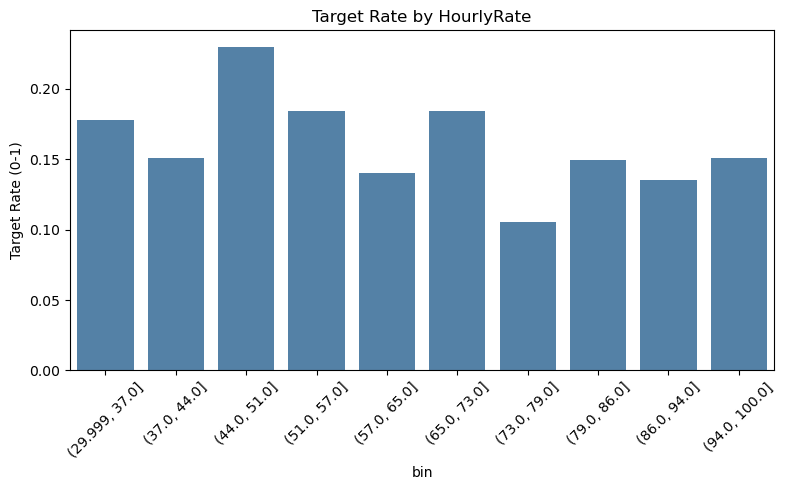

In [208]:
#HourlyRate
analyze_numerical_train(X_train, y_train, 'HourlyRate')


count      mean       std  min  25%  50%  75%  max
JobInvolvement  1029.0  2.731778  0.709833  1.0  2.0  3.0  3.0  4.0

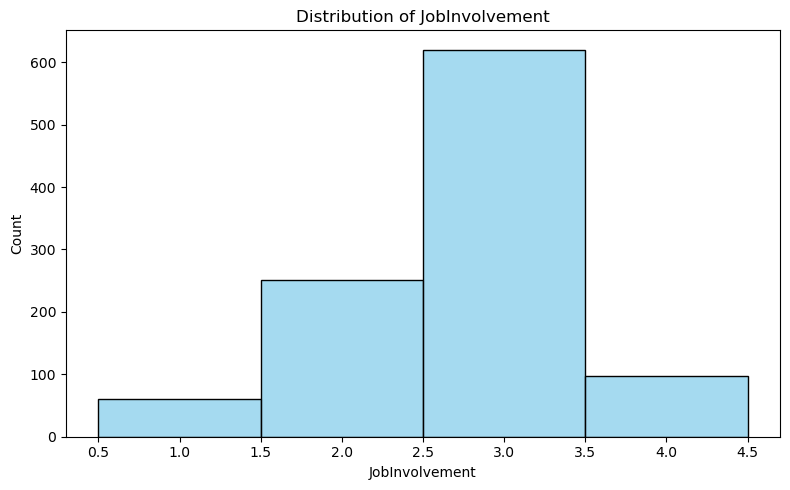

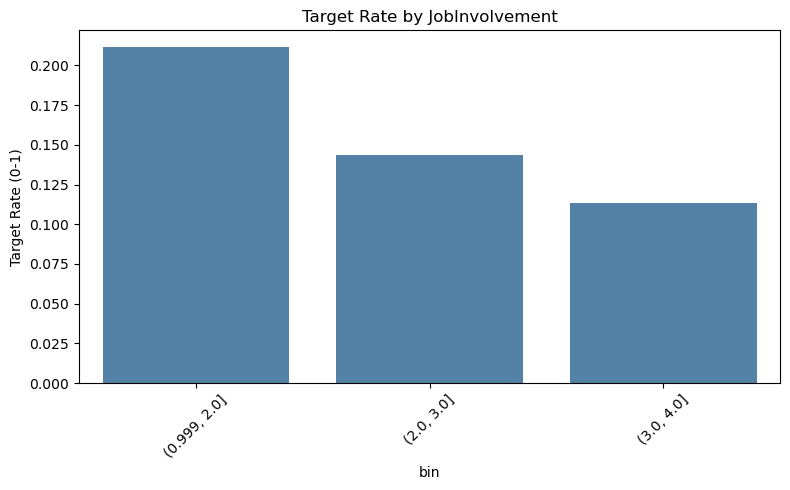

In [209]:
#JobInvolvement
analyze_numerical_train(X_train, y_train, 'JobInvolvement')


count      mean       std  min  25%  50%  75%  max
JobLevel  1029.0  2.082604  1.084906  1.0  1.0  2.0  3.0  5.0

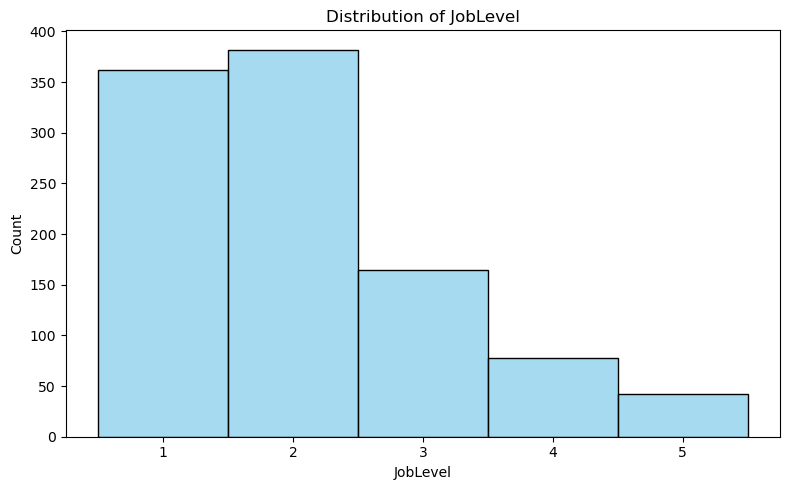

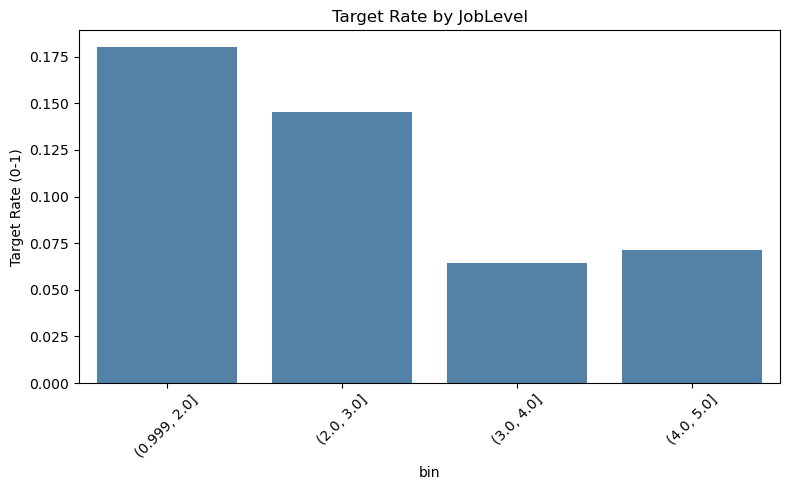

In [210]:
#JobLevel
analyze_numerical_train(X_train, y_train, 'JobLevel')

count      mean       std  min  25%  50%  75%  max
JobLevel  1029.0  2.082604  1.084906  1.0  1.0  2.0  3.0  5.0

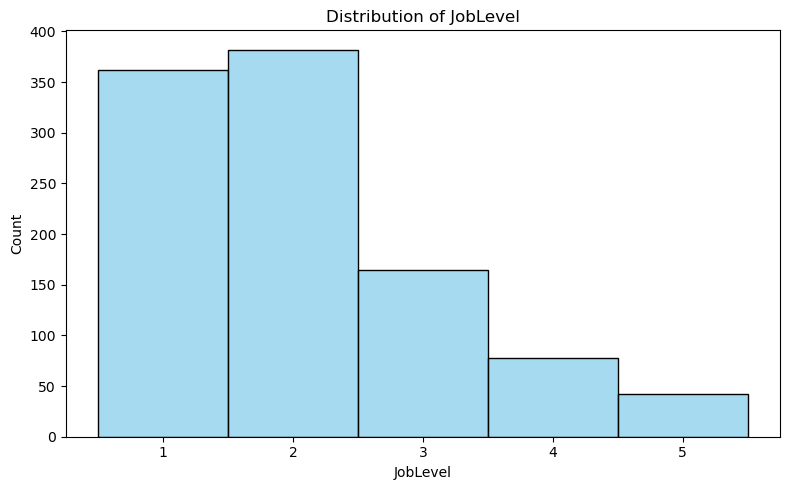

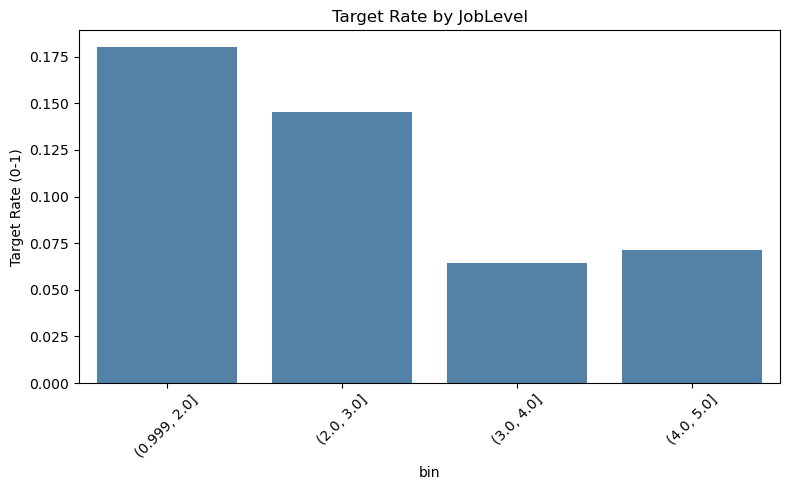

In [211]:
#JobLevel
analyze_numerical_train(X_train, y_train, 'JobLevel')

count      mean      std  min  25%  50%  75%  max
JobSatisfaction  1029.0  2.706511  1.10946  1.0  2.0  3.0  4.0  4.0

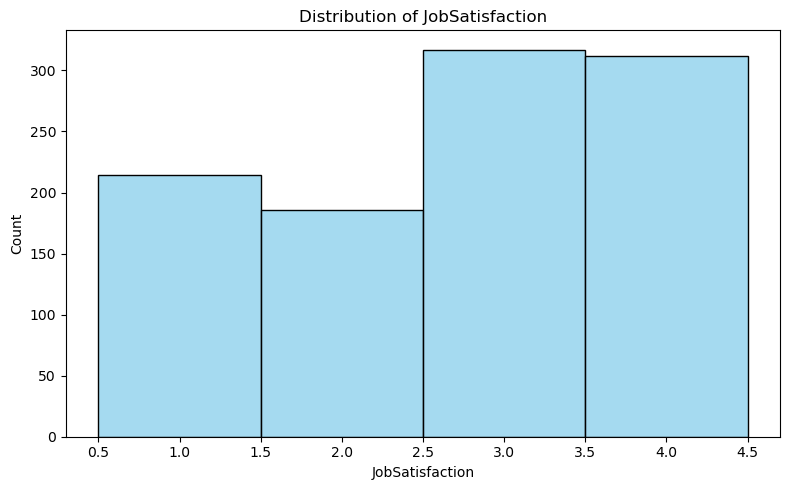

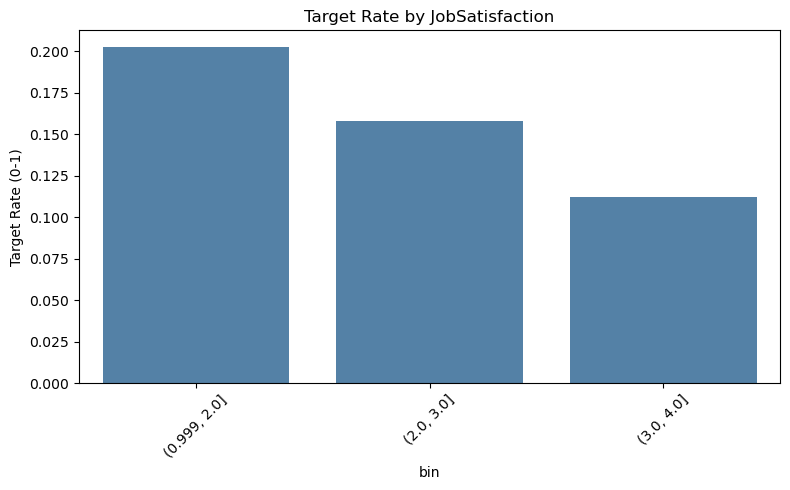

In [212]:
#JobSatisfaction
analyze_numerical_train(X_train, y_train, 'JobSatisfaction')


count         mean         std     min     25%     50%  \
MonthlyIncome  1029.0  6548.270165  4611.45961  1009.0  2994.0  5063.0   

                  75%      max  
MonthlyIncome  8446.0  19973.0

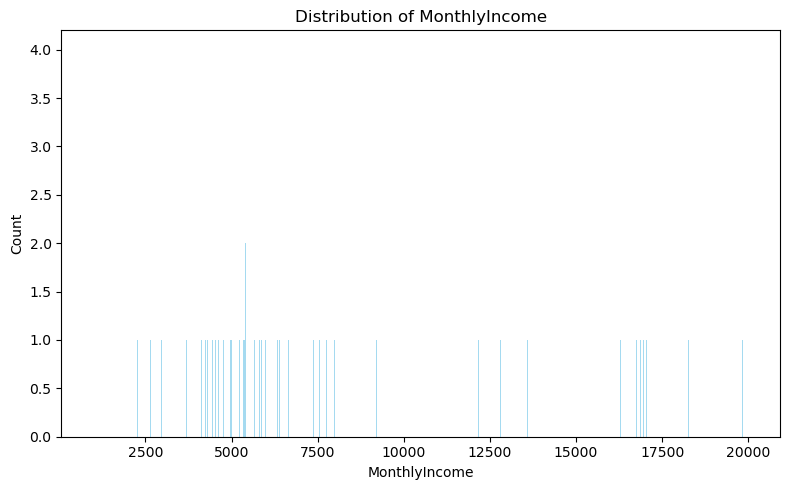

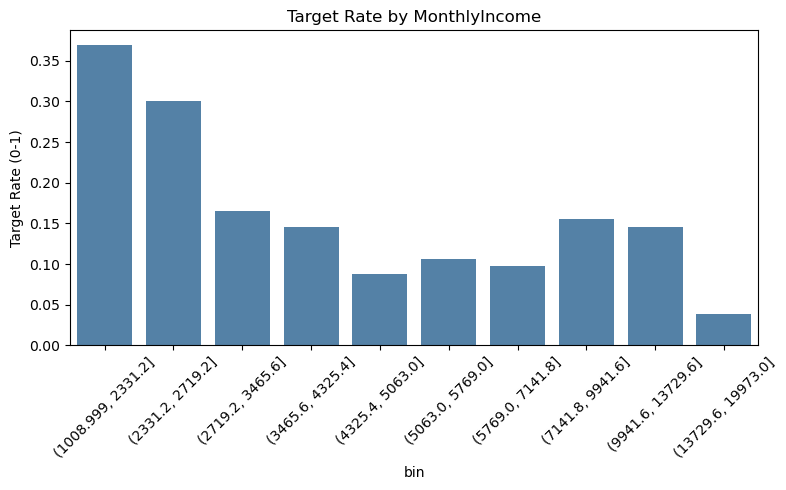

In [213]:
#MonthlyIncome
analyze_numerical_train(X_train, y_train, 'MonthlyIncome')


count          mean          std     min     25%      50%  \
MonthlyRate  1029.0  14465.365403  7231.472741  2094.0  8053.0  14506.0   

                 75%      max  
MonthlyRate  21016.0  26999.0

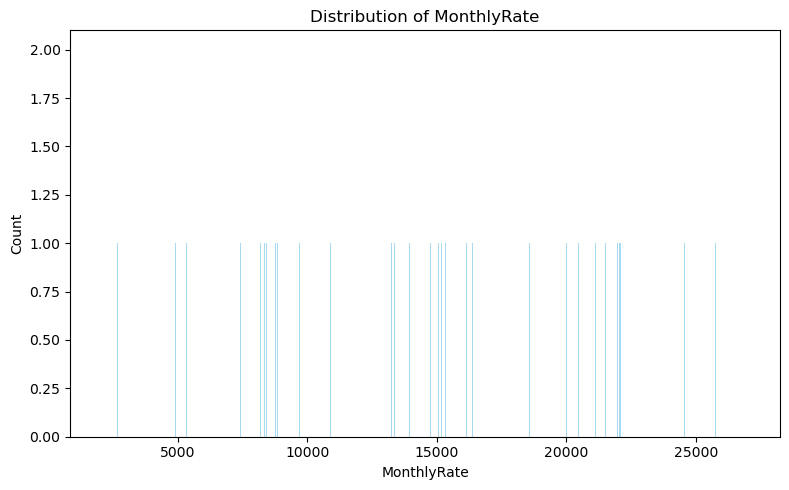

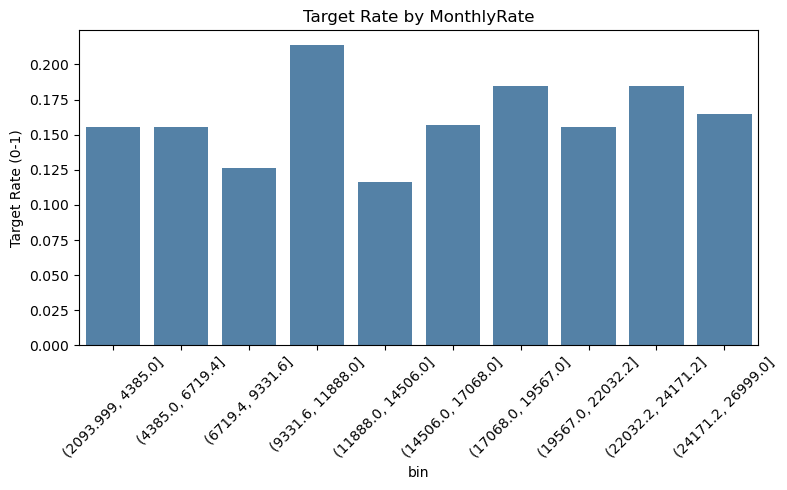

In [214]:
#MonthlyRate
analyze_numerical_train(X_train, y_train, 'MonthlyRate')

count      mean       std  min  25%  50%  75%  max
NumCompaniesWorked  1029.0  2.720117  2.497351  0.0  1.0  2.0  4.0  9.0

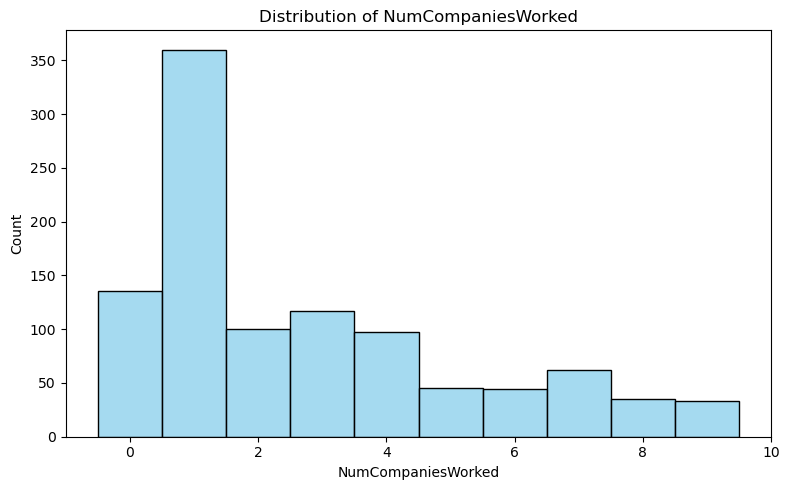

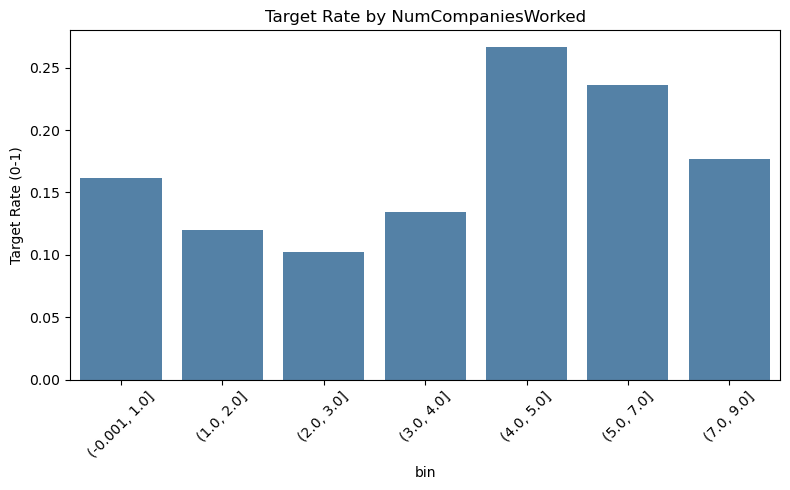

In [215]:
#NumCompaniesWorked
analyze_numerical_train(X_train, y_train, 'NumCompaniesWorked')

count       mean       std   min   25%   50%   75%   max
PercentSalaryHike  1029.0  15.196307  3.644241  11.0  12.0  14.0  18.0  25.0

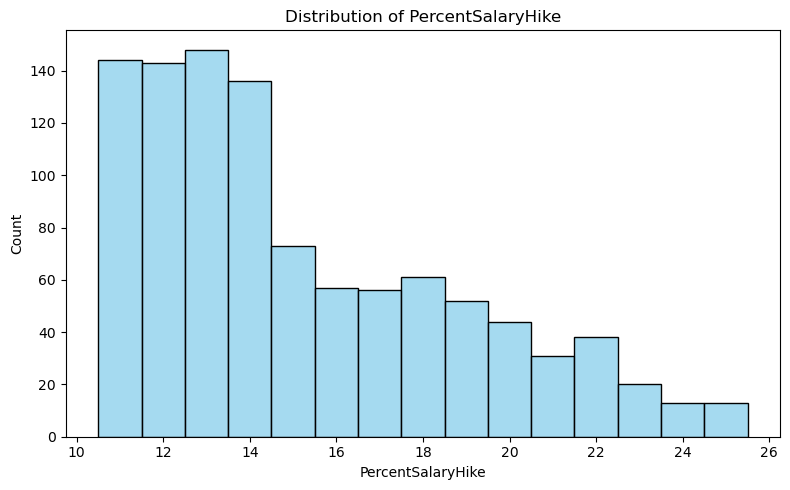

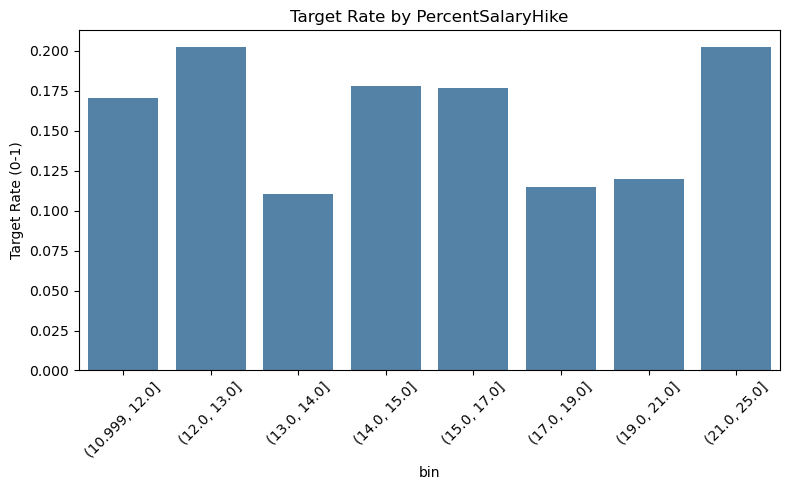

In [216]:
#PercentSalaryHike
analyze_numerical_train(X_train, y_train, 'PercentSalaryHike')

count      mean       std  min  25%  50%  75%  max
PerformanceRating  1029.0  3.154519  0.361621  3.0  3.0  3.0  3.0  4.0

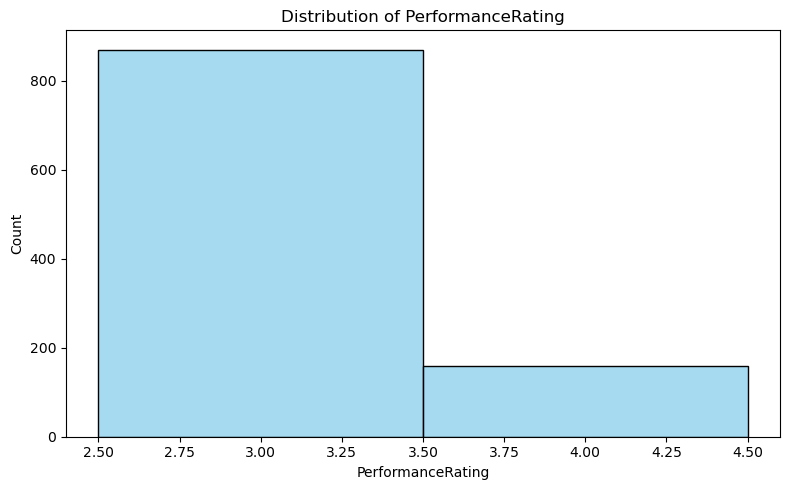

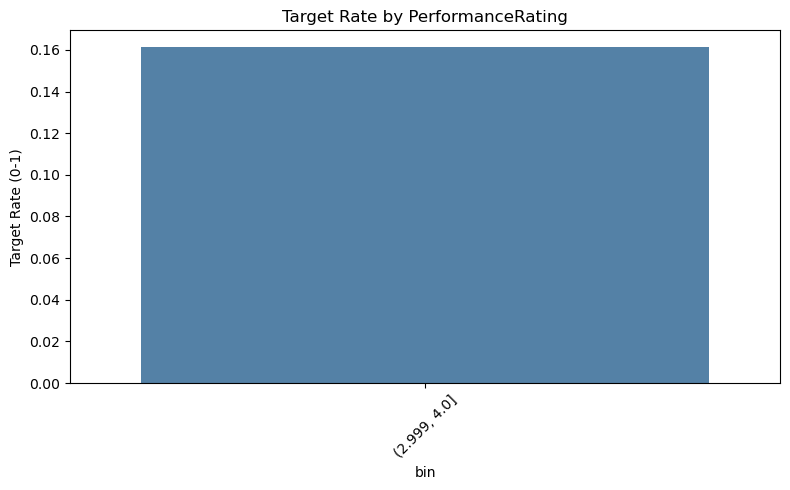

In [217]:
#PerformanceRating
analyze_numerical_train(X_train, y_train, 'PerformanceRating')

count      mean       std  min  25%  50%  75%  max
RelationshipSatisfaction  1029.0  2.744412  1.088398  1.0  2.0  3.0  4.0  4.0

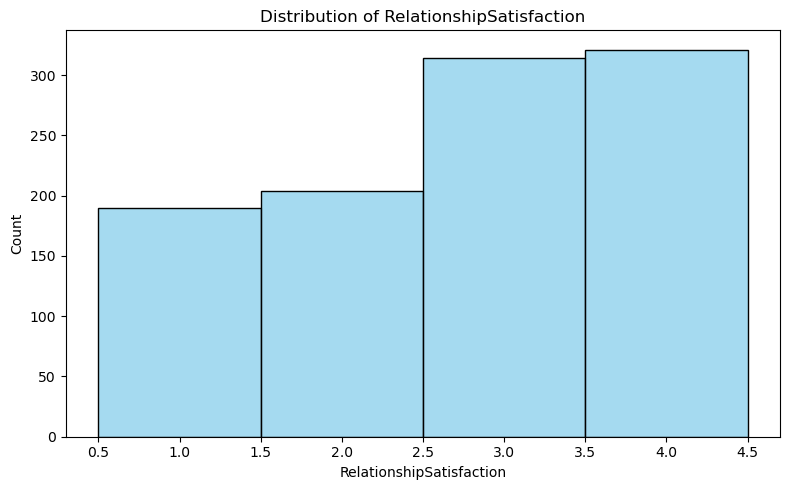

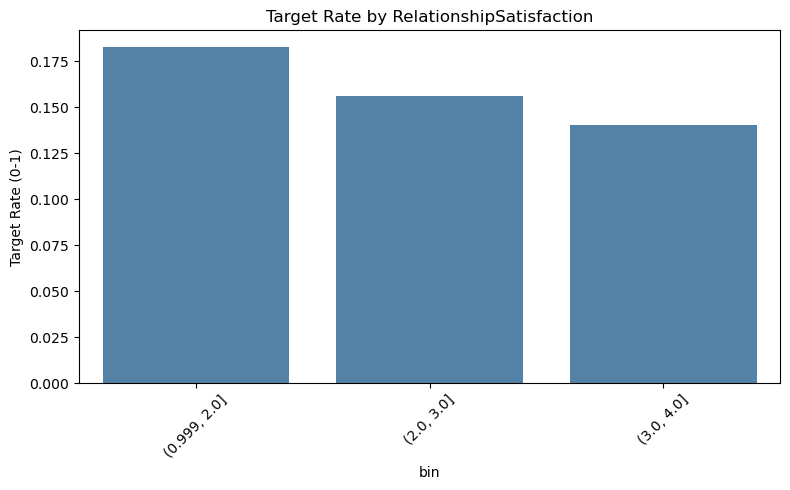

In [218]:
#RelationshipSatisfaction
analyze_numerical_train(X_train, y_train, 'RelationshipSatisfaction')

count      mean       std  min  25%  50%  75%  max
StockOptionLevel  1029.0  0.791059  0.846185  0.0  0.0  1.0  1.0  3.0

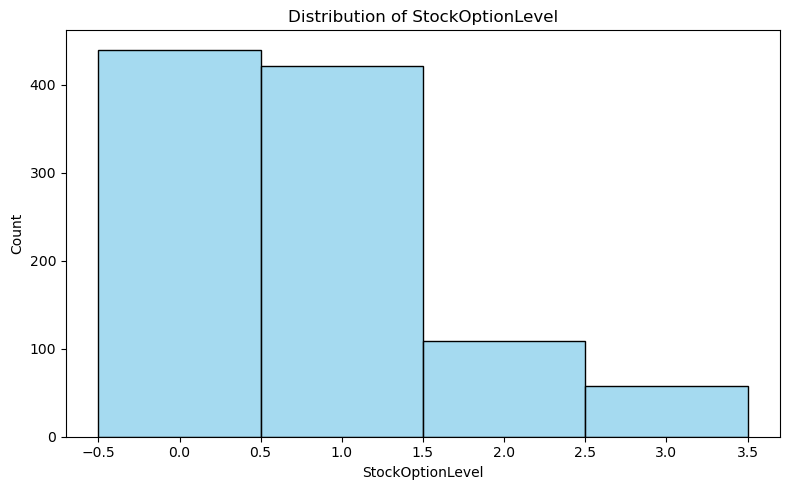

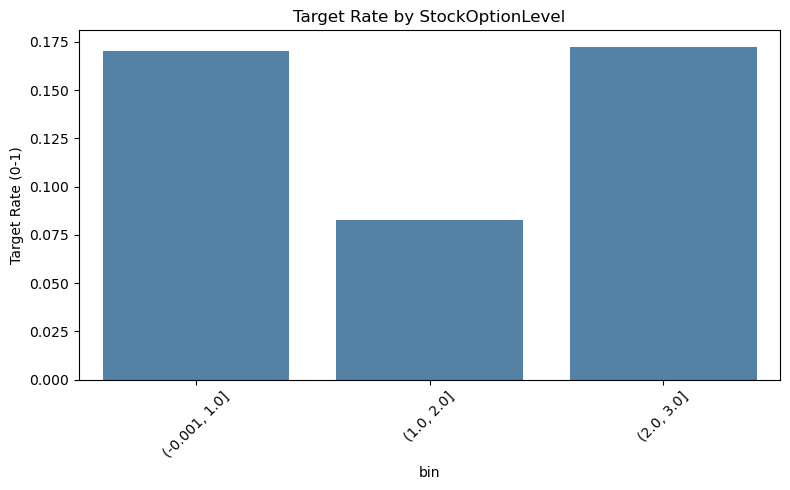

In [219]:
#StockOptionLevel
analyze_numerical_train(X_train, y_train, 'StockOptionLevel')

count       mean       std  min  25%   50%   75%   max
TotalWorkingYears  1029.0  11.323615  7.688945  0.0  6.0  10.0  15.0  40.0

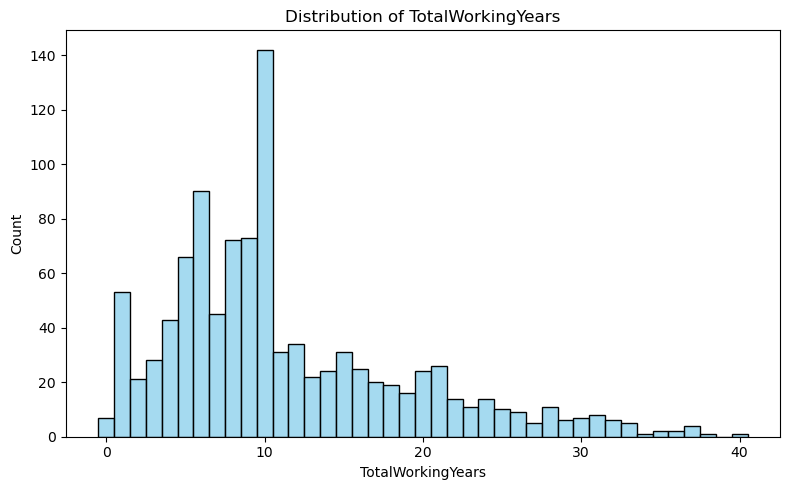

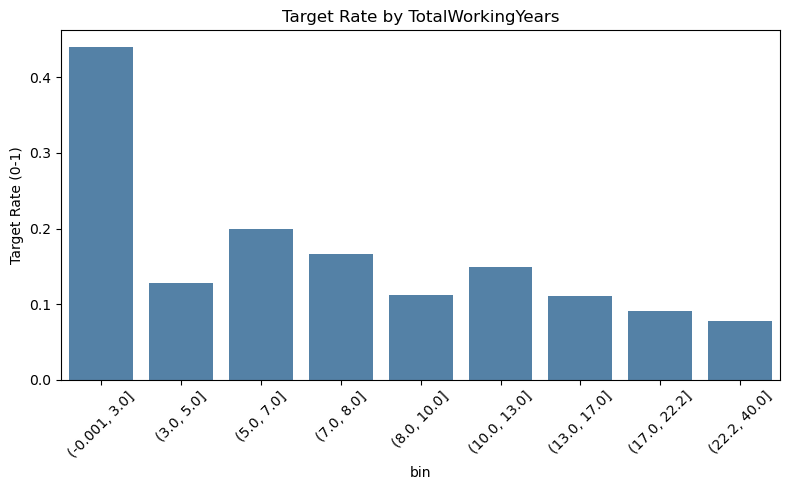

In [220]:
#TotalWorkingYears
analyze_numerical_train(X_train, y_train, 'TotalWorkingYears')


count      mean      std  min  25%  50%  75%  max
TrainingTimesLastYear  1029.0  2.741497  1.24023  0.0  2.0  3.0  3.0  6.0

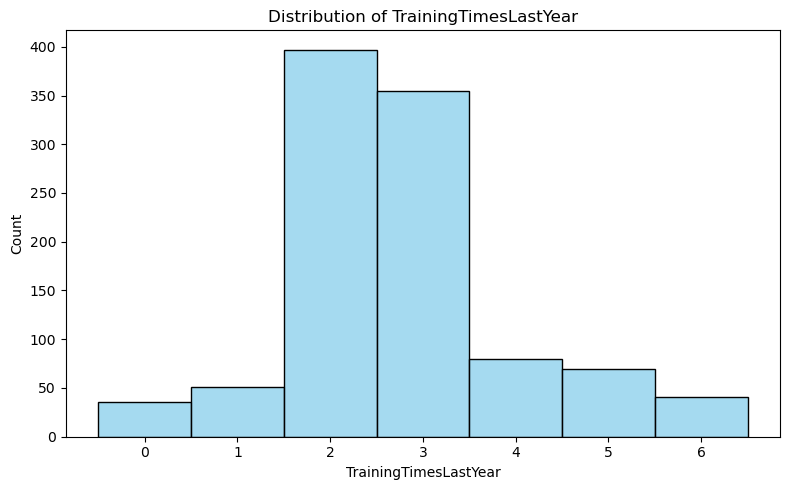

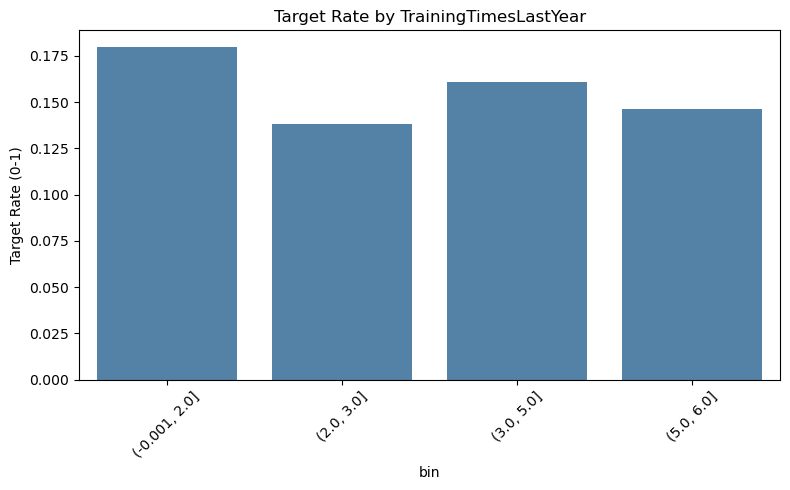

In [221]:
#TrainingTimesLastYear
analyze_numerical_train(X_train, y_train, 'TrainingTimesLastYear')

count      mean       std  min  25%  50%  75%  max
WorkLifeBalance  1029.0  2.759961  0.715116  1.0  2.0  3.0  3.0  4.0

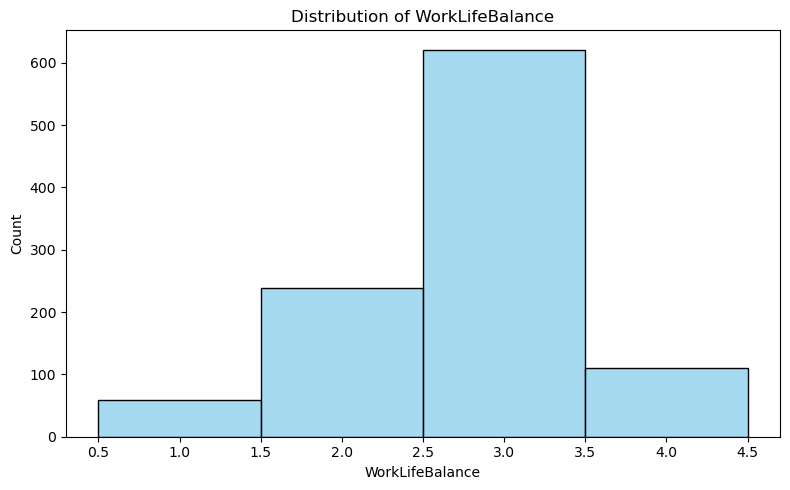

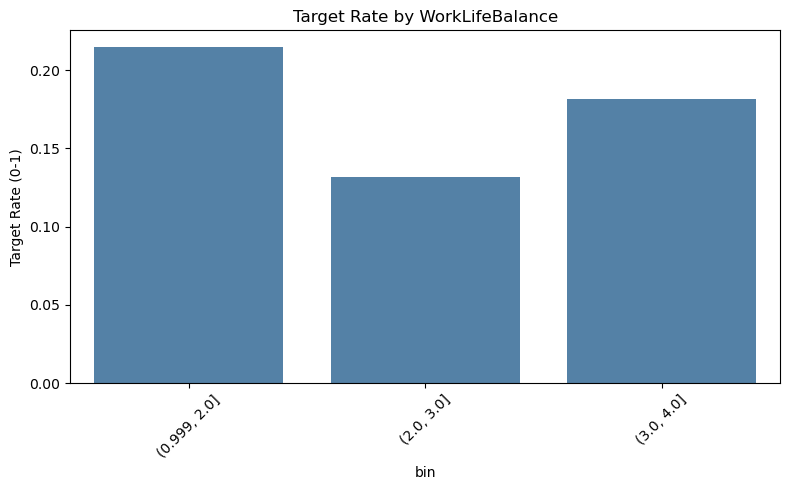

In [222]:
#WorkLifeBalance
analyze_numerical_train(X_train, y_train, 'WorkLifeBalance')

count      mean      std  min  25%  50%   75%   max
YearsAtCompany  1029.0  6.938776  5.95093  0.0  3.0  5.0  10.0  37.0

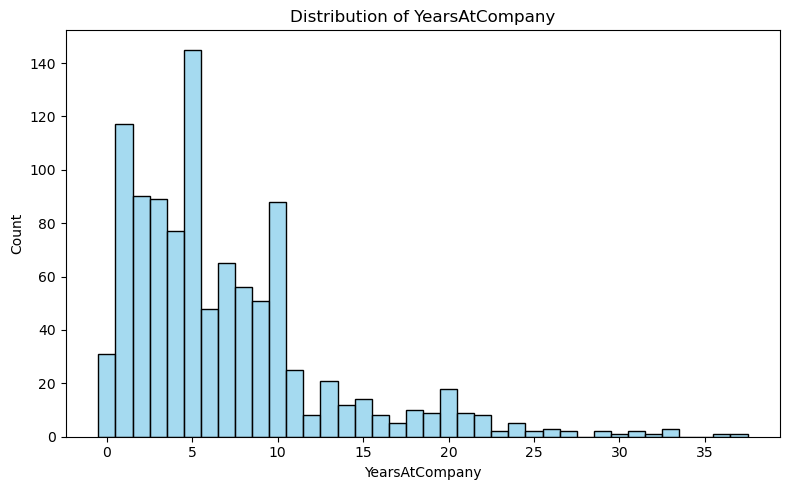

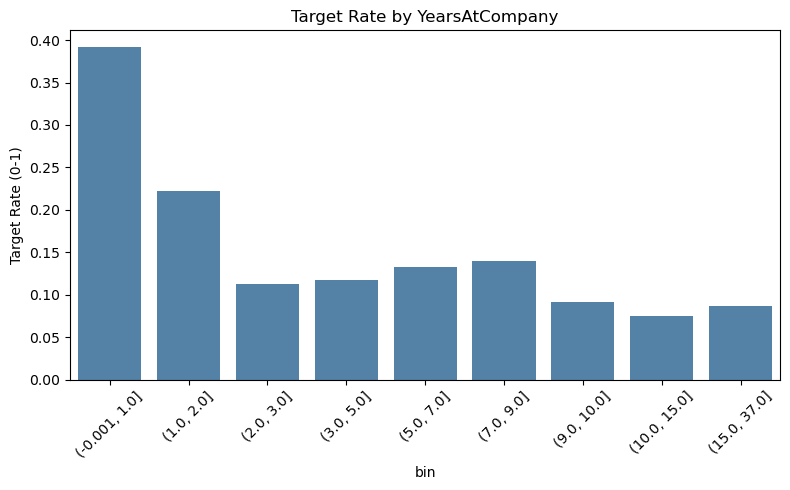

In [223]:
#YearsAtCompany
analyze_numerical_train(X_train, y_train, 'YearsAtCompany')


count      mean       std  min  25%  50%  75%   max
YearsInCurrentRole  1029.0  4.233236  3.583634  0.0  2.0  3.0  7.0  17.0

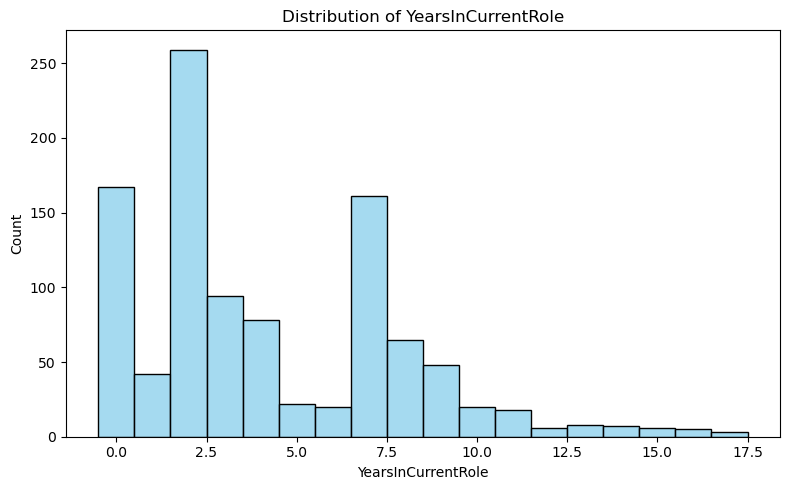

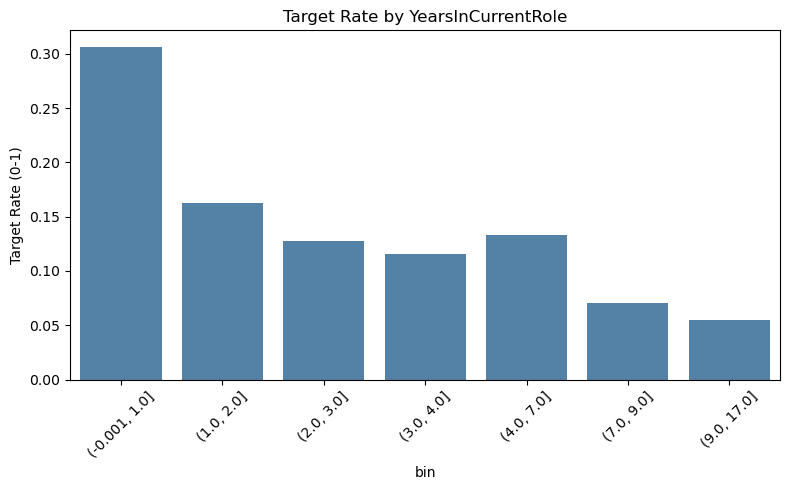

In [224]:
#YearsinCurrentRole
analyze_numerical_train(X_train, y_train, 'YearsInCurrentRole')

count      mean       std  min  25%  50%  75%   max
YearsSinceLastPromotion  1029.0  2.189504  3.222919  0.0  0.0  1.0  3.0  15.0

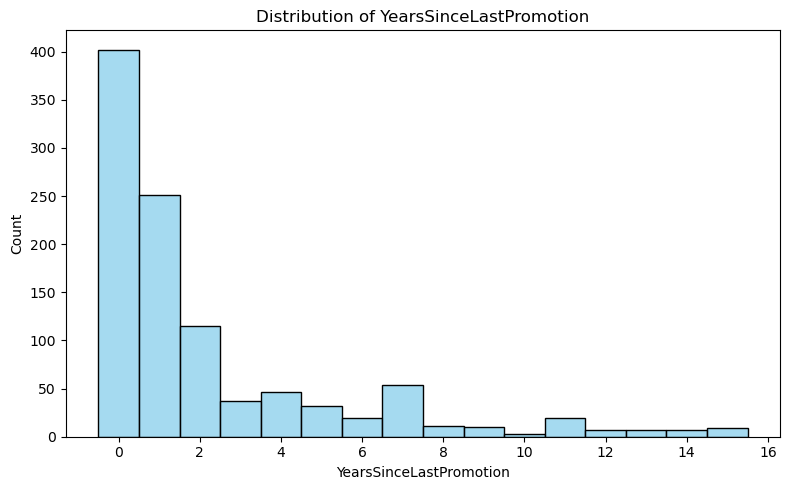

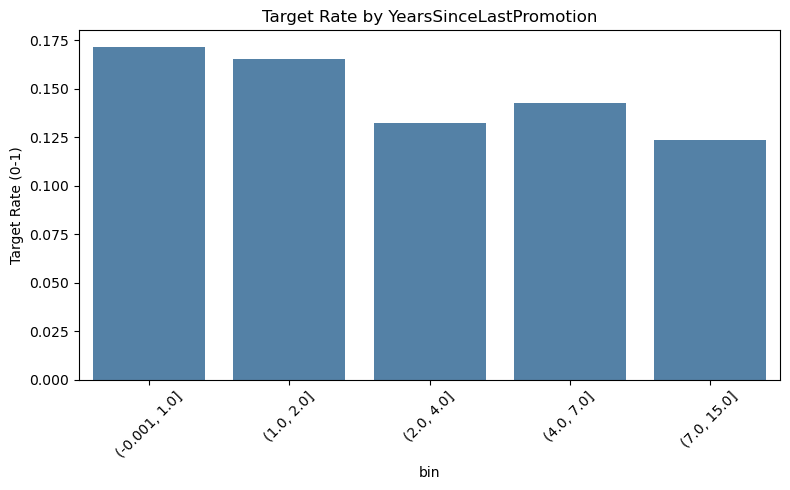

In [225]:
#YearsSinceLastPromotion
analyze_numerical_train(X_train, y_train, 'YearsSinceLastPromotion')

count      mean       std  min  25%  50%  75%   max
YearsWithCurrManager  1029.0  4.130224  3.535334  0.0  2.0  3.0  7.0  17.0

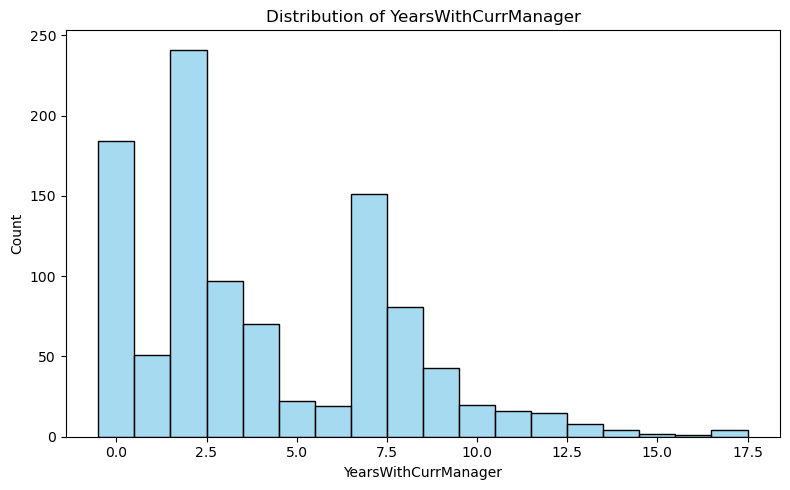

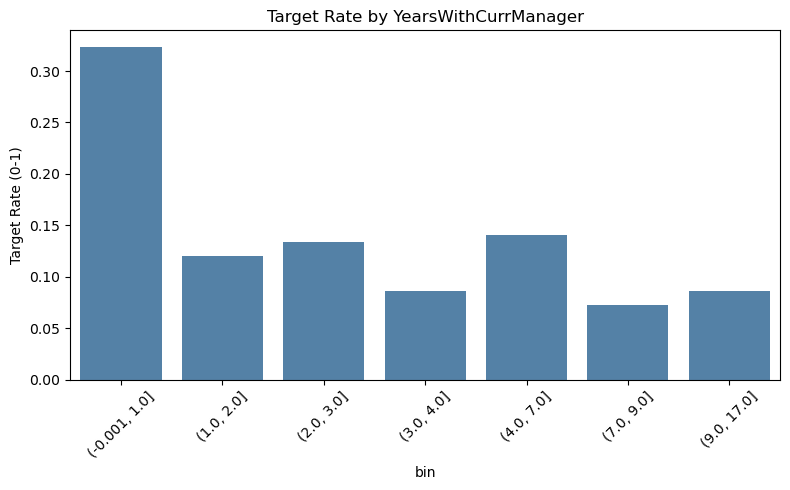

In [226]:
#YearsWithCurrManager
analyze_numerical_train(X_train, y_train, 'YearsWithCurrManager')

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.4 Correlation between Variables: Heatmap** </font></a>

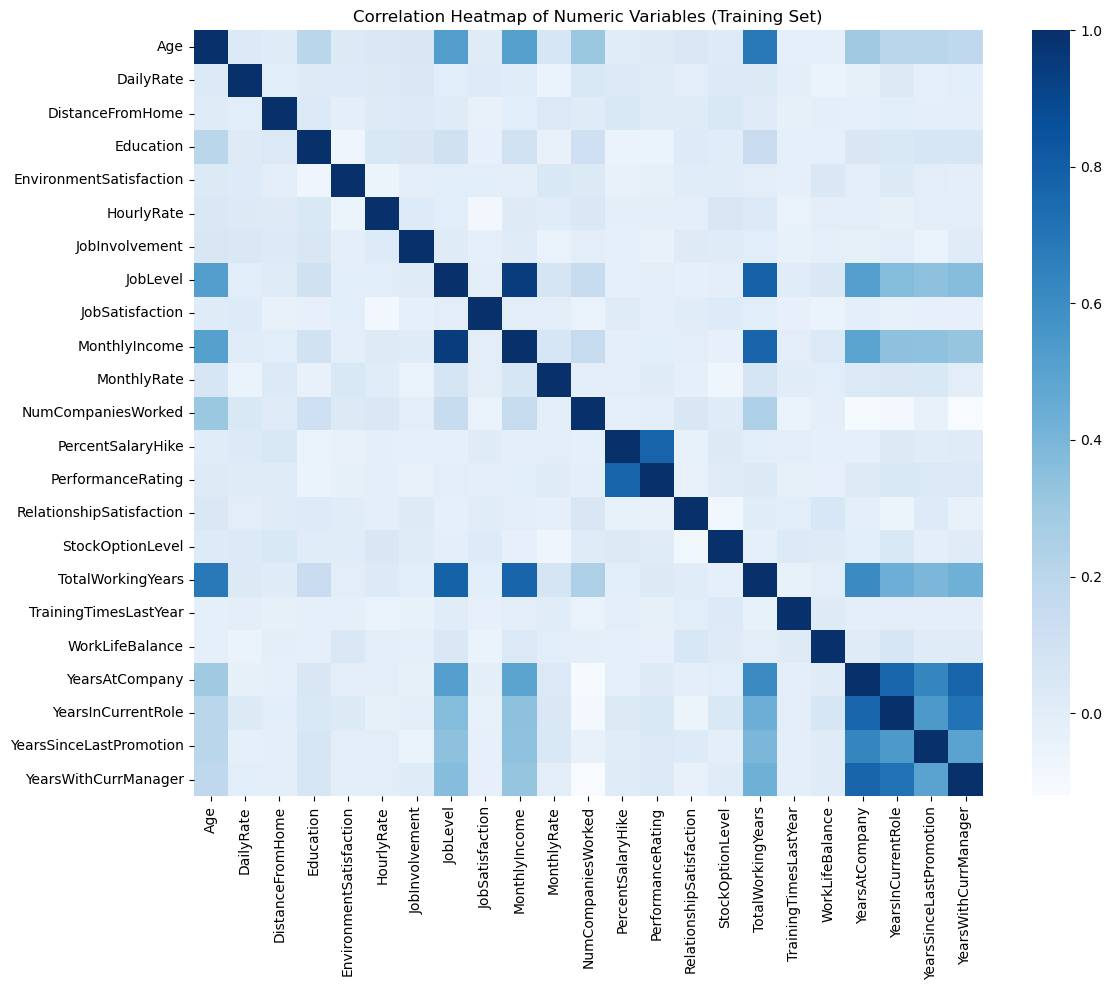

In [227]:
# Pearson Correlation

# Select numeric columns from training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
sns.heatmap(
    X_train[numeric_cols].corr(),  # only training data
    cmap="Blues",
    annot=False
)
plt.title("Correlation Heatmap of Numeric Variables (Training Set)")
plt.tight_layout()
plt.show()


In [228]:
# Compute correlation matrix on numeric columns of training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
corr = X_train[numeric_cols].corr().abs()  # absolute values

# Only keep correlations above threshold but below 1 
threshold = 0.5
strong_corr = corr.where((corr > threshold) & (corr < 1.0)).stack().reset_index()
strong_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

print(strong_corr)




                 Variable 1               Variable 2  Correlation
0                       Age                 JobLevel     0.524321
1                       Age            MonthlyIncome     0.509772
2                       Age        TotalWorkingYears     0.687911
3                  JobLevel                      Age     0.524321
4                  JobLevel            MonthlyIncome     0.945943
5                  JobLevel        TotalWorkingYears     0.781716
6                  JobLevel           YearsAtCompany     0.514572
7             MonthlyIncome                      Age     0.509772
8             MonthlyIncome                 JobLevel     0.945943
9             MonthlyIncome        TotalWorkingYears     0.769714
10        PercentSalaryHike        PerformanceRating     0.773426
11        PerformanceRating        PercentSalaryHike     0.773426
12        TotalWorkingYears                      Age     0.687911
13        TotalWorkingYears                 JobLevel     0.781716
14        

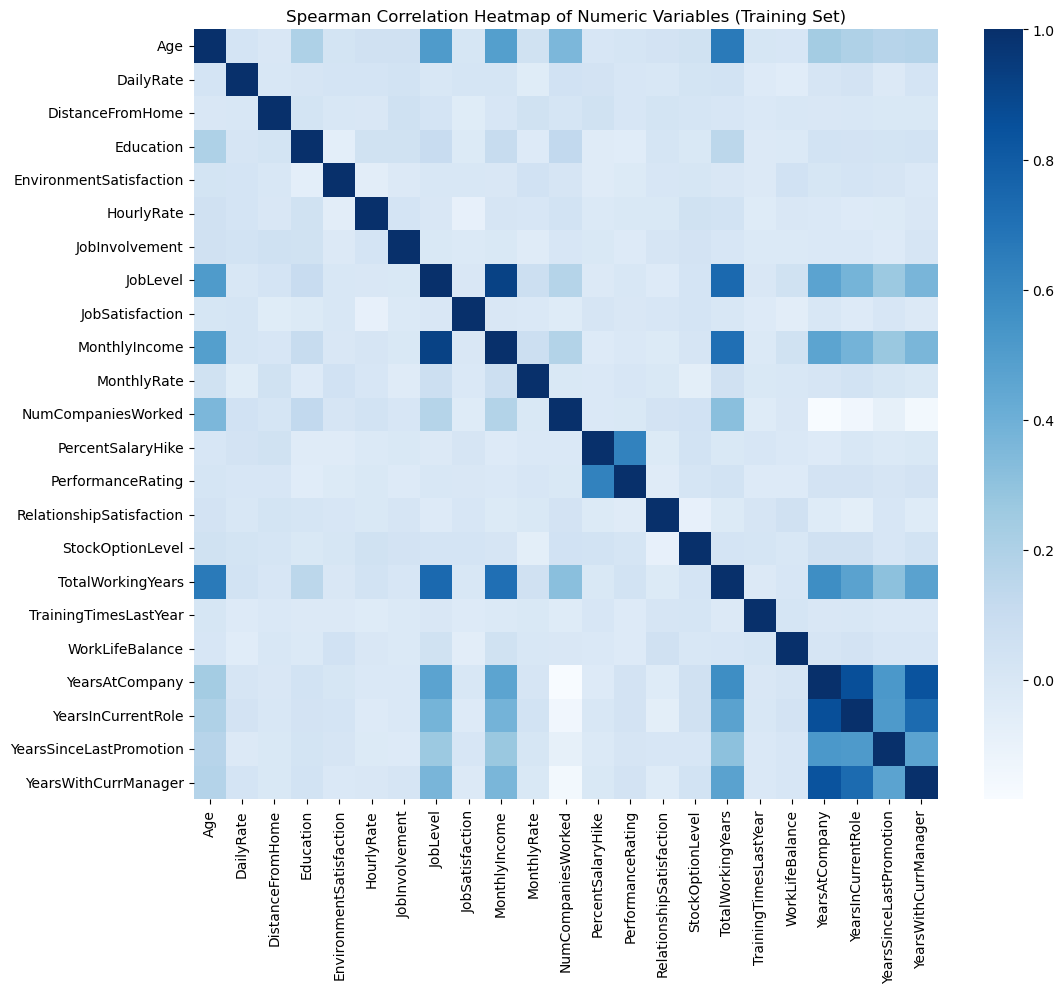

In [229]:
# Spearman correlation on numeric columns of training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
spearman_corr = X_train[numeric_cols].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, cmap="Blues", annot=False)
plt.title("Spearman Correlation Heatmap of Numeric Variables (Training Set)")
plt.show()


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.5. Outliers** </font></a>

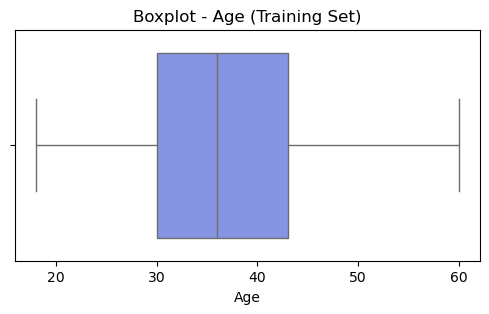

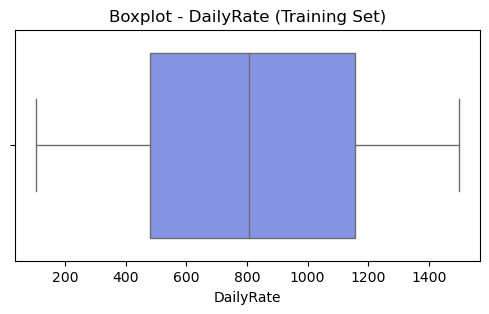

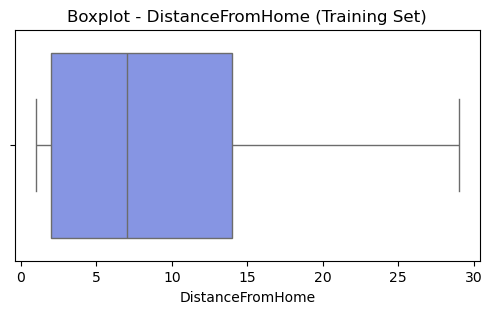

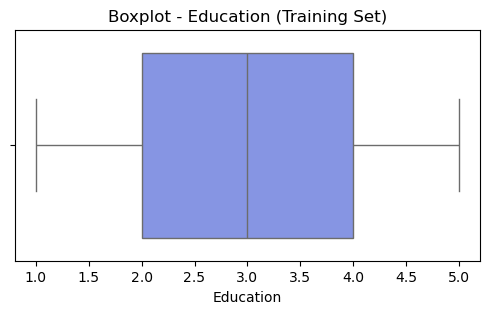

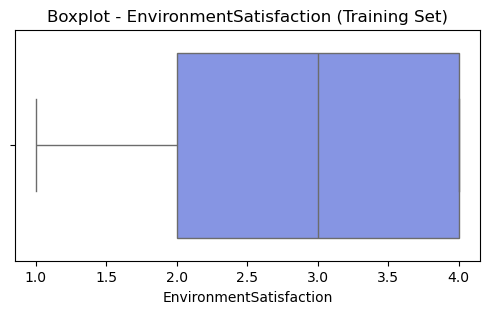

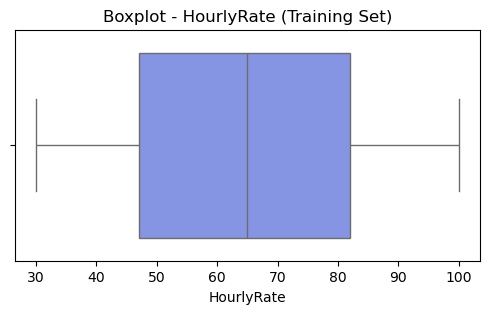

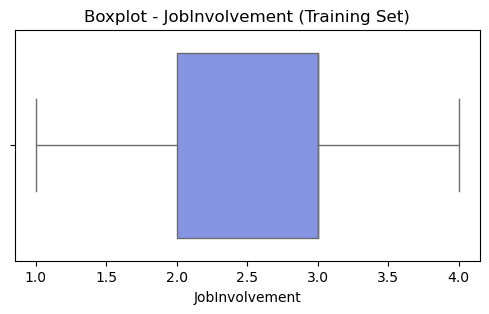

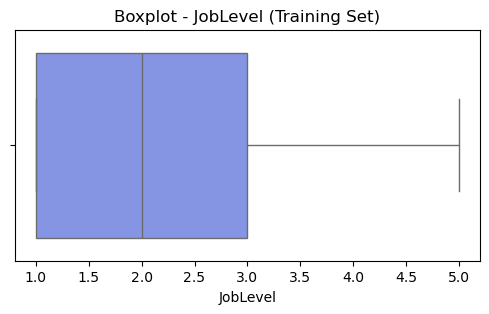

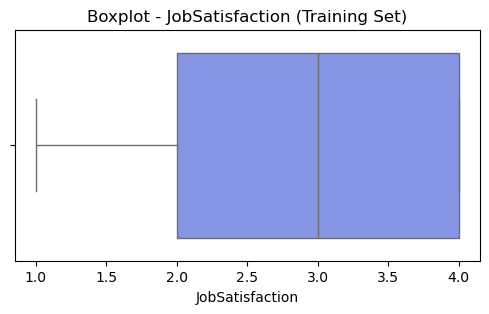

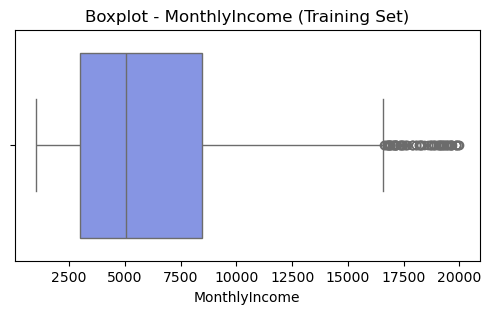

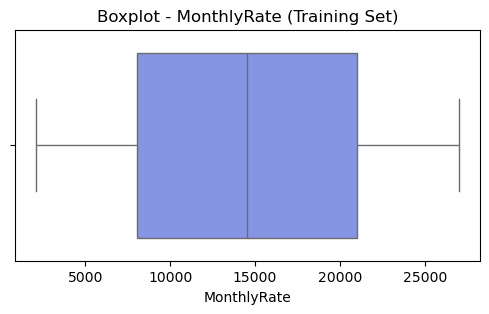

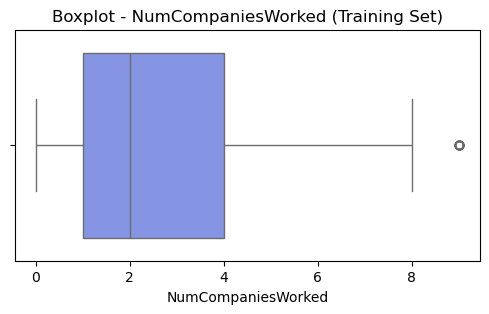

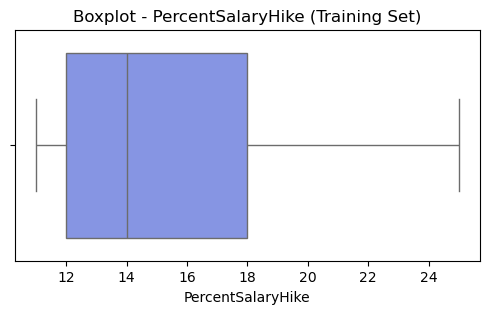

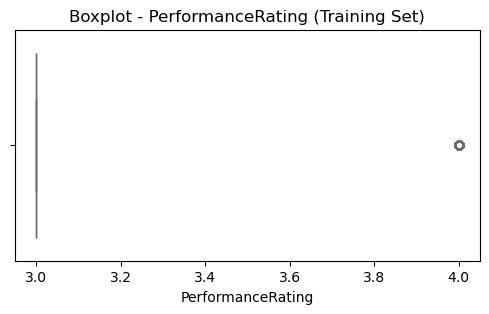

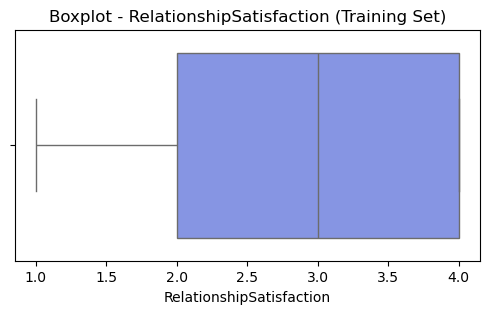

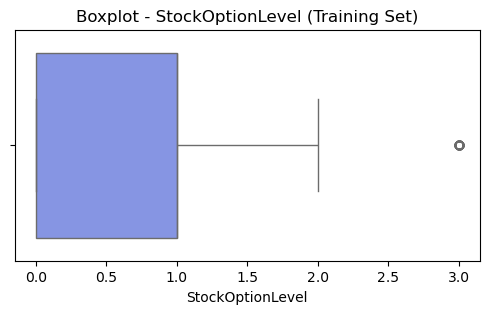

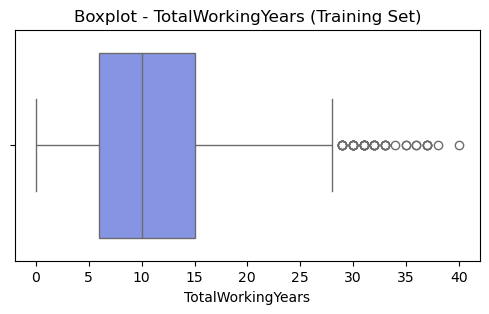

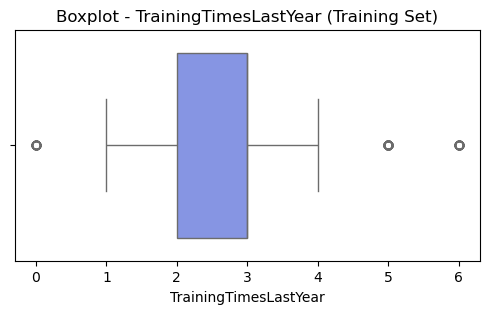

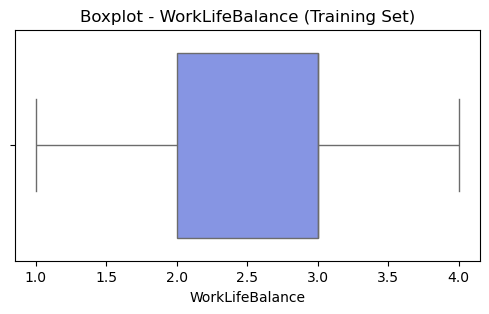

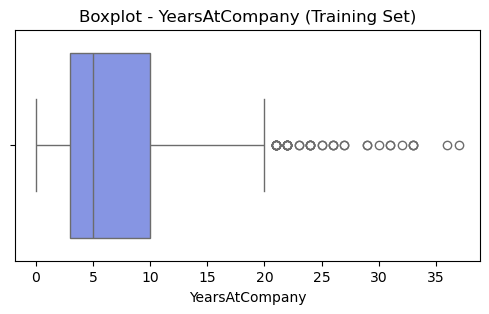

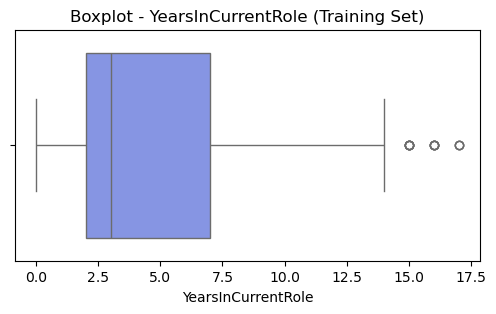

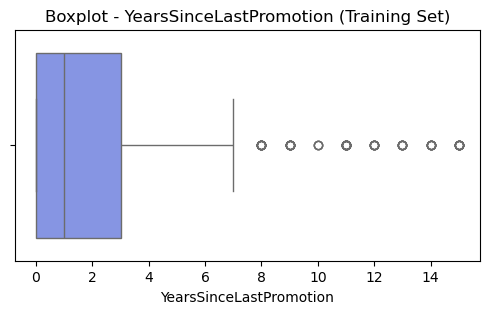

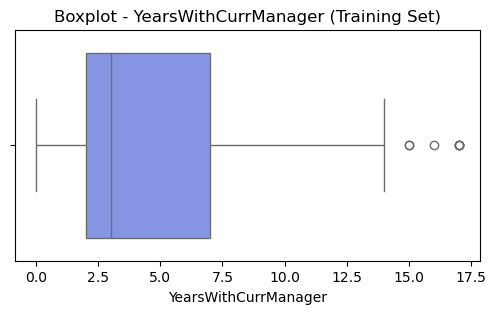

In [230]:
# Outlier detection on training set only
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=X_train[col], color="#778bf2ff")
    plt.title(f'Boxplot - {col} (Training Set)')
    plt.xlabel(col)
    plt.show()



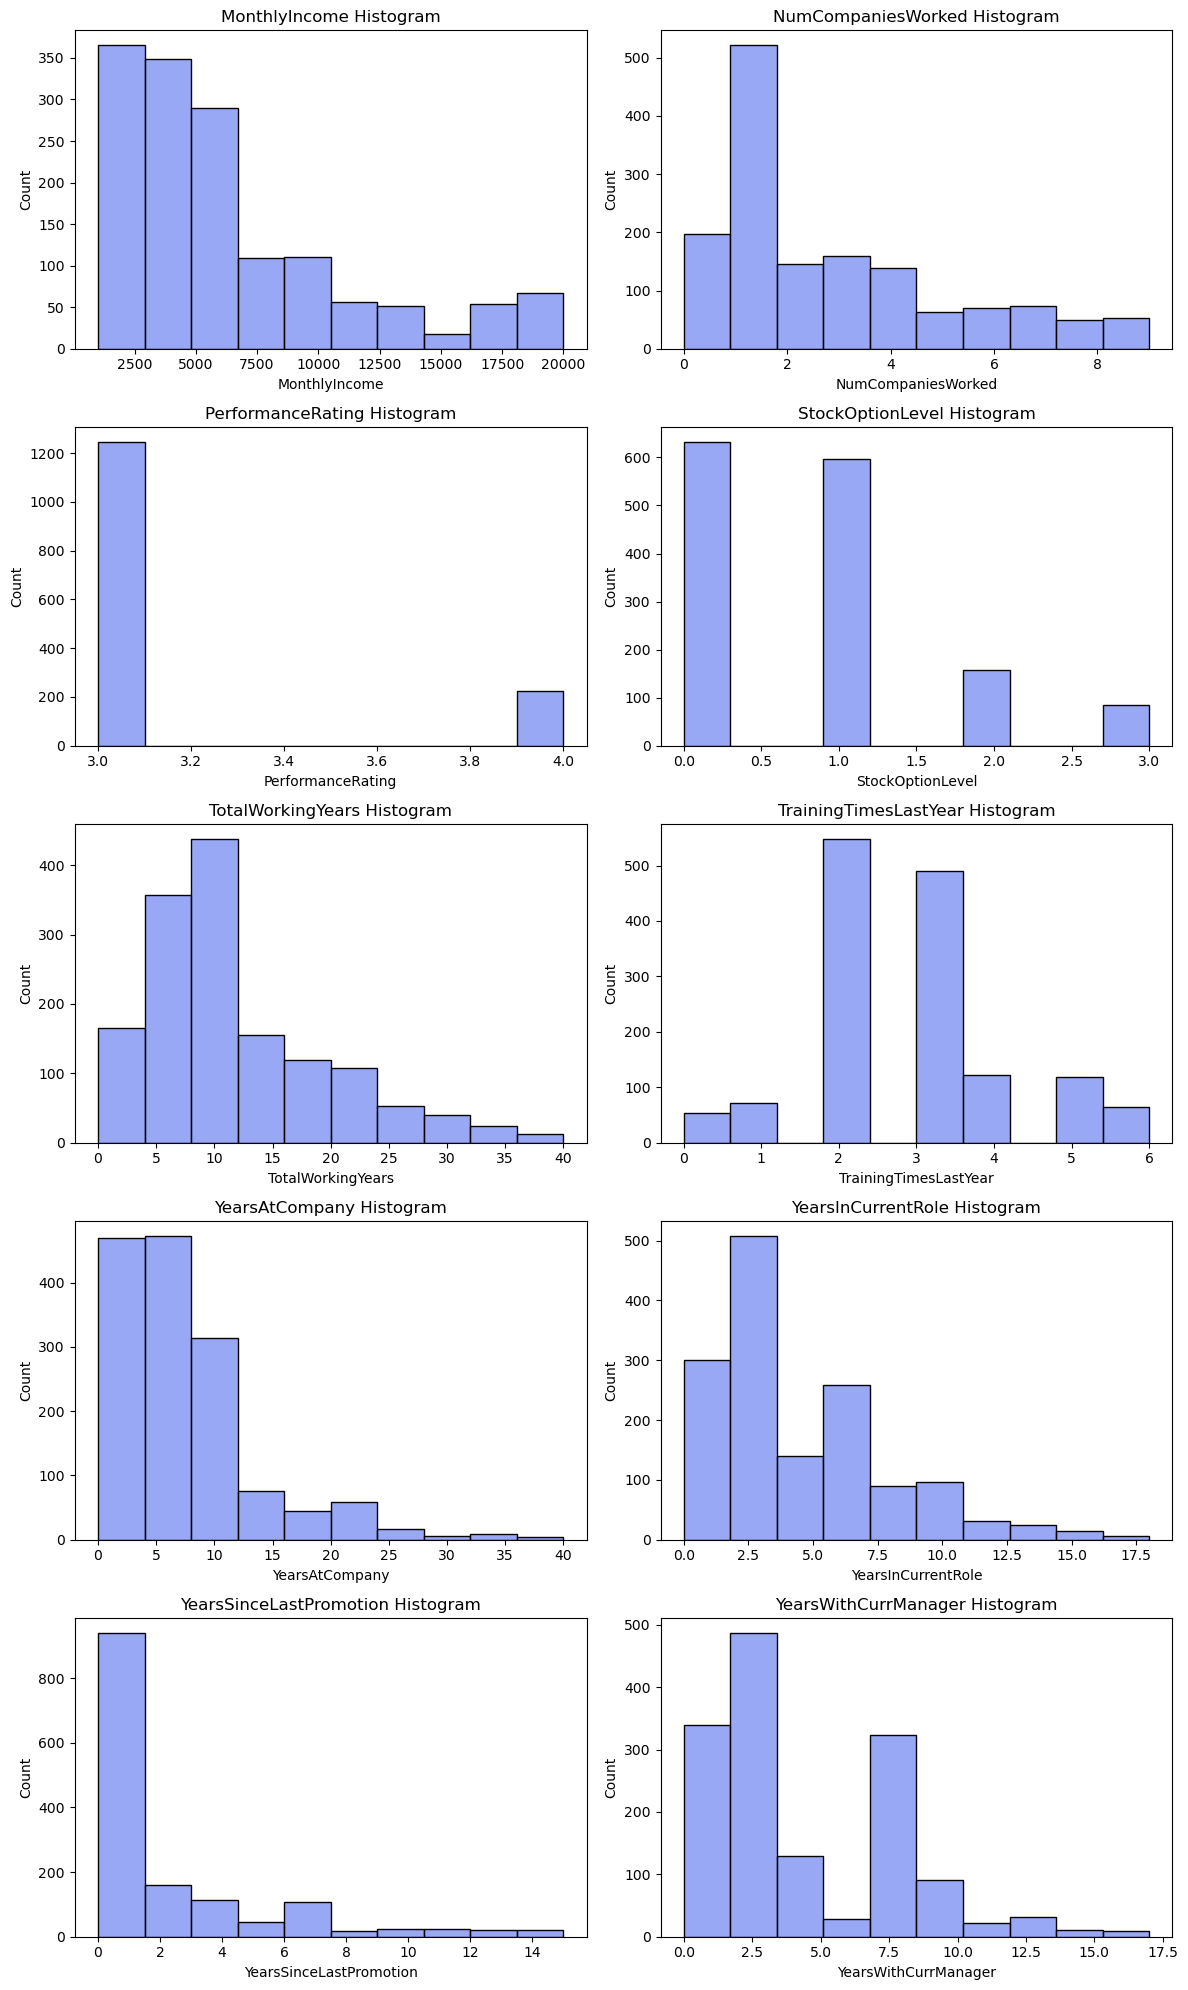

In [231]:
cols_outliers = [
    'MonthlyIncome', 'NumCompaniesWorked',
    'PerformanceRating', 'StockOptionLevel',
    'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

n_cols = 2
n_rows = len(cols_outliers) // n_cols + (len(cols_outliers) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

axes = axes.flatten()

for ax, col in zip(axes, cols_outliers):
    sns.histplot(df[col], bins=10, ax=ax, color="#778bf2ff")
    ax.set_title(f"{col} Histogram")

# Hide any unused axes
for i in range(len(cols_outliers), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()




In [232]:
# Filter high performers in training set
high_perf_train = X_train[X_train['PerformanceRating'] > 3.8].copy()
high_perf_train['Attrition'] = y_train.loc[high_perf_train.index]

# Remaining employees in training set
rest_train = X_train.drop(high_perf_train.index).copy()
rest_train['Attrition'] = y_train.loc[rest_train.index]

# Columns to compare
cols_compare = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 
                'YearsSinceLastPromotion', 'OverTime']

# Function to summarize statistics
def summarize_stats(data, cols):
    summary = {}
    for col in cols:
        if col != 'OverTime':
            summary[col] = {
                'mean': data[col].mean(),
                'max': data[col].max(),
                'min': data[col].min()
            }
        else:
            # For OverTime, show proportion of 'Yes'
            summary[col] = {
                'OverTime_Yes (%)': (data[col] == 'Yes').mean() * 100
            }
    return pd.DataFrame(summary).T

print("High Performers (PerformanceRating > 3.8) - Training Set:")
display(summarize_stats(high_perf_train, cols_compare))

print("Other Employees - Training Set:")
display(summarize_stats(rest_train, cols_compare))


High Performers (PerformanceRating > 3.8) - Training Set:


mean      max     min  OverTime_Yes (%)
MonthlyIncome            6580.113208  19973.0  1102.0               NaN
TotalWorkingYears          11.817610     37.0     1.0               NaN
YearsAtCompany              7.194969     29.0     0.0               NaN
YearsSinceLastPromotion     2.471698     15.0     0.0               NaN
OverTime                         NaN      NaN     NaN         30.188679

Other Employees - Training Set:


mean      max     min  OverTime_Yes (%)
MonthlyIncome            6542.450575  19943.0  1009.0               NaN
TotalWorkingYears          11.233333     40.0     0.0               NaN
YearsAtCompany              6.891954     37.0     0.0               NaN
YearsSinceLastPromotion     2.137931     15.0     0.0               NaN
OverTime                         NaN      NaN     NaN         29.195402

In [233]:
# Select the original rows from df that correspond to X_train
df_train_original = df.loc[X_train.index].copy()

print("Employee with YearsAtCompany = 40 (Training Set):")
display(
    df_train_original[df_train_original['YearsAtCompany'] == 40][[
        'JobRole', 'Department', 'TotalWorkingYears',
        'YearsInCurrentRole', 'PerformanceRating', 'StockOptionLevel', 'Attrition'
    ]]
)

print("Employee with TotalWorkingYears = 40 (Training Set):")
display(
    df_train_original[df_train_original['TotalWorkingYears'] == 40][[
        'JobRole', 'Department', 'YearsAtCompany',
        'YearsInCurrentRole', 'PerformanceRating', 'StockOptionLevel', 'Attrition'
    ]]
)

print("Employee with YearsInCurrentRole = 18 (Training Set):")
display(
    df_train_original[df_train_original['YearsInCurrentRole'] == 18][[
        'JobRole', 'Department', 'YearsAtCompany',
        'TotalWorkingYears', 'PerformanceRating', 'StockOptionLevel', 'Attrition'
    ]]
)





Employee with YearsAtCompany = 40 (Training Set):


Empty DataFrame
Columns: [JobRole, Department, TotalWorkingYears, YearsInCurrentRole, PerformanceRating, StockOptionLevel, Attrition]
Index: []

Employee with TotalWorkingYears = 40 (Training Set):


JobRole              Department  YearsAtCompany  \
EmployeeNumber                                                              
825             Research Director  Research & Development              31   

                YearsInCurrentRole  PerformanceRating  StockOptionLevel  \
EmployeeNumber                                                            
825                             15                  3                 0   

               Attrition  
EmployeeNumber            
825                  Yes

Employee with YearsInCurrentRole = 18 (Training Set):


Empty DataFrame
Columns: [JobRole, Department, YearsAtCompany, TotalWorkingYears, PerformanceRating, StockOptionLevel, Attrition]
Index: []

### Outlier Analysis — Summary & Conclusions

We analyzed several numeric variables that initially showed potential outliers in the boxplots compared with the target variable (`Attrition`):  
`MonthlyIncome`, `PerformanceRating`, `StockOptionLevel`, `TotalWorkingYears`, `TrainingTimesLastYear`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, and `YearsWithCurrManager`.

#### Phase 1 — General Variable Exploration
After re-examining these variables individually, two stood out: **PerformanceRating** and **StockOptionLevel**.  
Histograms of `PerformanceRating` revealed two distinct employee groups:
1. **Others:** 3.0 < `PerformanceRating` < 3.2  
2. **High Performers (h_perf):** 3.8 < `PerformanceRating` < 4.0  

For the 226 high performers (out of 1,470 employees), we compared several factors (`Attrition`, `MonthlyIncome`, `TotalWorkingYears`, `YearsAtCompany`, `YearsSinceLastPromotion`, `OverTime`, `JobRole`, and `Department`) against the rest of the population (1,244 employees).  
Key insights:
- **Attrition:** similar distribution between groups.  
- **MonthlyIncome:** very close across groups, suggesting performance is not linked to income levels.  
- **TotalWorkingYears** and **YearsSinceLastPromotion:** similar mean, min, and max values.  
- **OverTime:** comparable share (~28%) in both groups.  
- Most high performers belong to **Research & Development (156)**, followed by **Sales (61)** and **HR (9)**.  

**Conclusion (PerformanceRating):**  
No significant correlations were found between high performance (>3.8) and other variables — consistent with the heatmap, where `PerformanceRating` showed no strong associations across the dataset.

---

#### Phase 2 — Specific Employee Cases
A few employees showed extreme but contextually valid values:
1. **YearsAtCompany = 40:** single employee, `Attrition = Yes` (likely retirement).  
2. **TotalWorkingYears = 40:** two employees (one same as above), both with `Attrition = Yes` — probable retirements.  
3. **YearsInCurrentRole = 18:** two employees with long tenure (20 and 33 years), both still active.  
_All four are from the **Research & Development** department and have a `PerformanceRating = 3`._

**Conclusion (Tenure-related variables):**  
Long tenure in the company, role, or overall career does not indicate data errors — these represent valid senior employees, possibly close to or at retirement age.

---

### General Conclusions
1. Although some extreme values were detected, **none were considered true outliers** in the business context.  
2. The extreme cases (high tenure or high performance) are **consistent with realistic employee profiles** rather than data entry errors.  
3. Removing these values would risk losing meaningful information about experienced or high-performing staff.  
4. Therefore, **no outlier removal or transformation** is recommended at this stage.



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **4. Feature Selection** </font></a>

In this step, we will apply feature selection methods to remove irrelevant features or those that may represent noise for the algorithms we will develop later in this notebook. We will apply the following:
Chi-squared (Filter Method)
Variance (Filter Method)
Spearman Correlation (Filter Method)
Decision Trees (Embedded Method)
Recursive Feature Elimination (Wrapper Method)
Lasso Regression (Embedded Method)

In [ ]:
# Confirm initial types of the various features to be analyzed
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 1193 to 1812
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1029 non-null   float64
 1   DailyRate                          1029 non-null   float64
 2   DistanceFromHome                   1029 non-null   float64
 3   Education                          1029 non-null   float64
 4   EnvironmentSatisfaction            1029 non-null   float64
 5   HourlyRate                         1029 non-null   float64
 6   JobInvolvement                     1029 non-null   float64
 7   JobLevel                           1029 non-null   float64
 8   JobSatisfaction                    1029 non-null   float64
 9   MonthlyIncome                      1029 non-null   float64
 10  MonthlyRate                        1029 non-null   float64
 11  NumCompaniesWorked                 1029 non-null   float64

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **4.1 Categorical Features** </font></a>

The most applicable filter method for categorical variables is the Chi-squared method, so we will proceed to apply it to the categorical variables.

In [63]:
#Applying chi-square


def apply_chisquare(X, y, alpha=0.05):
    
    print("Chi-Square Feature Selection...\n")

    # 1. Select only categorical OHE columns (they contain '_')
    chi2_cols = [col for col in X.columns if "_" in col]

    if len(chi2_cols) == 0:
        print("No categorical one-hot columns found! Chi-square skipped.")
        return None

    # 2. Extract those columns
    X_cat = X[chi2_cols].copy()

    # Chi-square requires strictly non-negative values 
    if (X_cat < 0).any().any():
        raise ValueError("Chi-square variables must be non-negative!")

    # 3. Compute chi-square
    chi_vals, p_vals = chi2(X_cat, y)

    results = pd.DataFrame({
        "Feature": chi2_cols,
        "Chi2": chi_vals,
        "p-value": p_vals,
        "Important?": ["YES" if p < alpha else "NO" for p in p_vals]
    }).sort_values(by="p-value")

    return results


In [64]:
# Applying chi-square

chi2_results = apply_chisquare(X_train, y_train)
display(chi2_results)



Chi-Square Feature Selection...

No categorical one-hot columns found! Chi-square skipped.


None

**Strongest drivers of attrition (categorical)**:

    Job Role → especially Sales Representative

    Marital Status → Single employees leave significantly more

    Business Travel → Travel Frequently roles have high churn

    Department (Sales)

    Laboratory Technicians and Managers also at higher risk

**Weak or no effect**
    Gender (Male/Female) → Not predictive

    Education Field (most categories) → Weak correlation

    HR Department → No signal

    BusinessTravel_Rarely → No signal



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **4.2 Numerical Features** </font></a>

In [65]:
def get_numeric_features(X):
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # remove binary 0/1 columns (categorical)
    binary_cols = [col for col in numeric_cols if X[col].nunique() == 2]
    
    # remove OHE columns
    ohe_cols = [col for col in numeric_cols if "_" in col]
    
    # final numeric columns
    numeric_cols = [col for col in numeric_cols 
                    if col not in binary_cols and col not in ohe_cols]

    return numeric_cols

numeric_cols = get_numeric_features(X_train)
print("Numeric features:", numeric_cols)


Numeric features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **4.2.1 Variance** </font></a>

The variance is used to check if the numerical and ordinal variables are constant.

In [66]:
def apply_variance(X, numeric_cols, threshold=0.01):
    print("\nVariance Analysis \n")
    
    variances = X[numeric_cols].var()
    results = variances.sort_values(ascending=True).to_frame(name='variance')

    # Label features
    results['importance'] = np.where(results['variance'] < threshold,
                                     "Low variance → candidate for removal",
                                     "OK")

    return results

In [67]:
variance_results = apply_variance(X_train, numeric_cols)
display(variance_results)


Variance Analysis 



variance importance
JobInvolvement            5.038627e-01         OK
WorkLifeBalance           5.113914e-01         OK
StockOptionLevel          7.160289e-01         OK
Education                 1.064437e+00         OK
JobLevel                  1.177022e+00         OK
EnvironmentSatisfaction   1.178372e+00         OK
RelationshipSatisfaction  1.184611e+00         OK
JobSatisfaction           1.230901e+00         OK
TrainingTimesLastYear     1.538169e+00         OK
NumCompaniesWorked        6.236764e+00         OK
YearsSinceLastPromotion   1.038720e+01         OK
YearsWithCurrManager      1.249859e+01         OK
YearsInCurrentRole        1.284244e+01         OK
PercentSalaryHike         1.328049e+01         OK
YearsAtCompany            3.541356e+01         OK
TotalWorkingYears         5.911988e+01         OK
DistanceFromHome          6.659475e+01         OK
Age                       8.400482e+01         OK
HourlyRate                4.139273e+02         OK
DailyRate                 1.581388e+05         OK
MonthlyIncome             2.126556e+07         OK
MonthlyRate               5.229420e+07         OK

Every single feature passes the variance test.
No near-zero variance → nothing to drop.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **4.2.2 Spearman Correlation** </font></a>

Spearman Correlation is used to identify redundant variables, that can be removed due to their high levels of correlation.

In [68]:
spearman_cols = get_numeric_features(X_train)
spearman_corr = X_train[spearman_cols].corr(method='spearman')



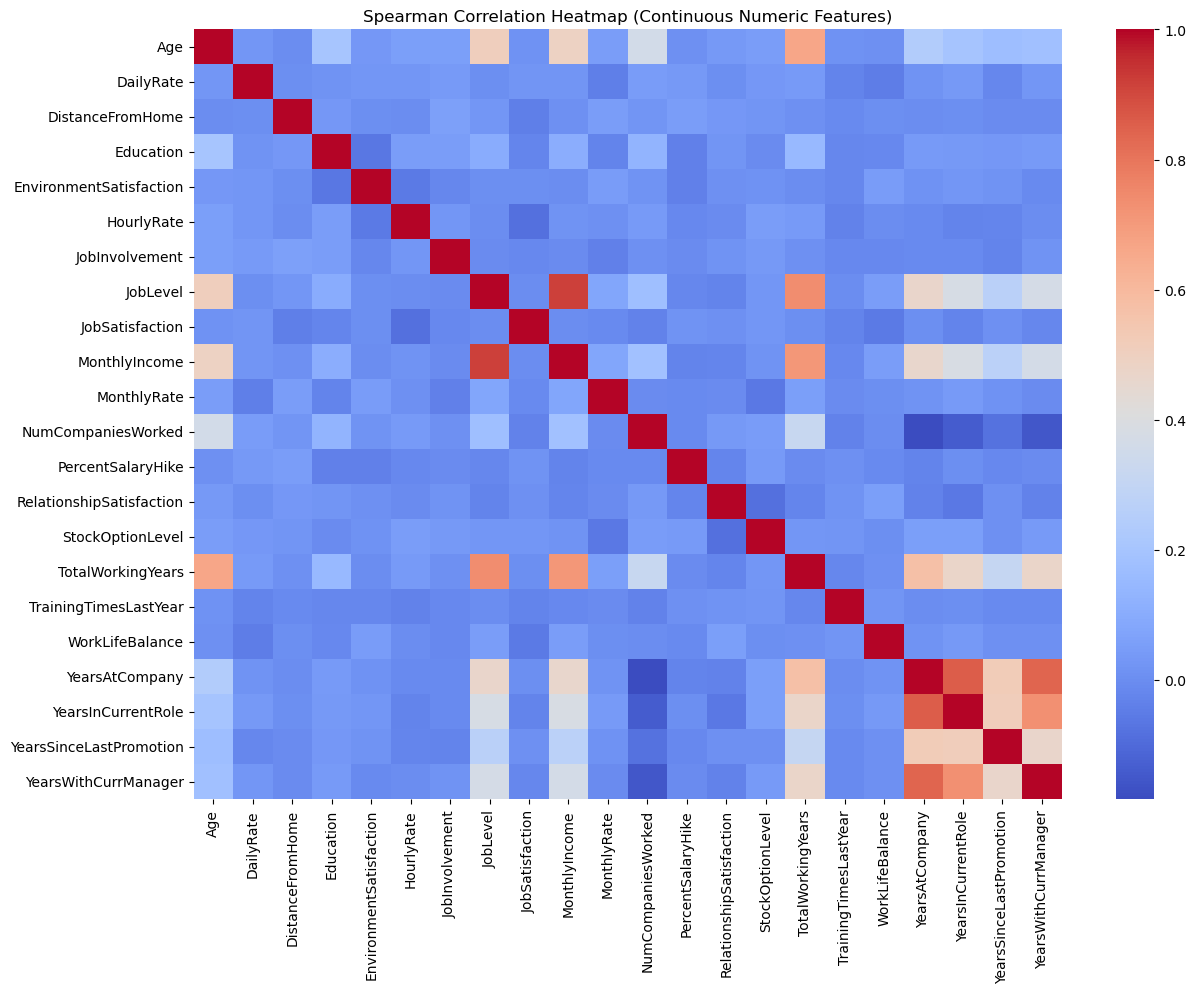

In [69]:
def apply_spearman_correlation(X, cols):
    corr = X[cols].corr(method='spearman')

    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, cmap='coolwarm', annot=False)
    plt.title("Spearman Correlation Heatmap (Continuous Numeric Features)")
    plt.show()

    return corr

spearman_corr = apply_spearman_correlation(X_train, spearman_cols)

In [70]:
#Extract high correlated pais
def get_high_corr_pairs(corr, threshold=0.70):
    high_corr = (
        corr.where(~np.eye(corr.shape[0], dtype=bool))   # remove diagonal
            .stack()
            .reset_index()
    )
    high_corr.columns = ['Feature 1', 'Feature 2', 'Spearman']

    # Keep absolute correlations ≥ threshold
    high_corr = high_corr[high_corr['Spearman'].abs() >= threshold]

    return high_corr.sort_values(by='Spearman', ascending=False)

high_corr_pairs = get_high_corr_pairs(spearman_corr)
display(high_corr_pairs)


Feature 1             Feature 2  Spearman
155              JobLevel         MonthlyIncome  0.921149
196         MonthlyIncome              JobLevel  0.921149
396        YearsAtCompany    YearsInCurrentRole  0.857090
417    YearsInCurrentRole        YearsAtCompany  0.857090
398        YearsAtCompany  YearsWithCurrManager  0.842564
459  YearsWithCurrManager        YearsAtCompany  0.842564
161              JobLevel     TotalWorkingYears  0.738674
322     TotalWorkingYears              JobLevel  0.738674
419    YearsInCurrentRole  YearsWithCurrManager  0.731566
460  YearsWithCurrManager    YearsInCurrentRole  0.731566
203         MonthlyIncome     TotalWorkingYears  0.713065
324     TotalWorkingYears         MonthlyIncome  0.713065

| Feature                  | Keep?    | Reason                          |
| ------------------------ | -------- | ------------------------------- |
| **MonthlyIncome**        | KEEP   | best salary indicator           |
| **JobLevel**             | REMOVE | redundant with income           |
| **YearsAtCompany**       | KEEP   | best tenure indicator           |
| **YearsInCurrentRole**   | REMOVE | redundant with YearsAtCompany   |
| **YearsWithCurrManager** | REMOVE | redundant with tenure structure |
| **TotalWorkingYears**    | KEEP   | independent enough              |
| **MonthlyRate**          | Keep  | not correlated strongly         |
| **DailyRate**            | Keep  | independent                     |


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **4.2.3 Decision Tree (Embedded Method)** </font></a>

In [71]:
def get_dt_features(X):
    # 1. start with your continuous numeric features
    continuous = get_numeric_features(X)

    # 2. add binary (0/1) features for decision trees
    binary = [col for col in X.columns 
              if X[col].dtype in ['int64', 'float64'] and X[col].nunique() == 2]

    # 3. final feature list for decision tree
    return continuous + binary


In [72]:
def apply_dt_importance(X, y, features):
    dt = DecisionTreeClassifier(
        random_state=42,
        max_depth=None,
        min_samples_split=10
    )

    dt.fit(X[features], y)

    importance = pd.Series(dt.feature_importances_, index=features)
    importance = importance.sort_values(ascending=False)

    return importance

dt_features = get_dt_features(X_train)

In [73]:
# Compute feature importance
dt_importance = apply_dt_importance(X_train, y_train, dt_features)
display(dt_importance)

TotalWorkingYears           0.129685
DistanceFromHome            0.102652
HourlyRate                  0.093537
MonthlyIncome               0.090617
Age                         0.076612
DailyRate                   0.070320
MonthlyRate                 0.047675
NumCompaniesWorked          0.046446
PercentSalaryHike           0.046137
TrainingTimesLastYear       0.045356
JobInvolvement              0.040671
StockOptionLevel            0.036337
EnvironmentSatisfaction     0.030833
YearsSinceLastPromotion     0.025773
YearsWithCurrManager        0.025003
Education                   0.022298
WorkLifeBalance             0.019484
YearsAtCompany              0.015039
RelationshipSatisfaction    0.013324
JobSatisfaction             0.010380
PerformanceRating           0.008650
YearsInCurrentRole          0.003170
JobLevel                    0.000000
dtype: float64

**Most Important Predictors (Strong):**

        TotalWorkingYears

        DistanceFromHome

        HourlyRate

        MonthlyIncome

        Age

        DailyRate


**Moderately Important Predictors:**

        NumCompaniesWorked

        PercentSalaryHike

        TrainingTimesLastYear

        JobInvolvement

        StockOptionLevel

        EnvironmentSatisfaction

        YearsSinceLastPromotion

        YearsWithCurrManager

**Weak Predictors:**

        Education

        WorkLifeBalance

        YearsAtCompany

        RelationshipSatisfaction

        JobSatisfaction

        PerformanceRating

        YearsInCurrentRole

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.3 Recursive Feature Elimintaion RFE (Wrapper Method)** </font></a>

In [74]:
rfe_features = get_dt_features(X_train)
rfe_features


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [75]:
def apply_rfe(X, y, features, k=10):
    # Scale copy of the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X[features])

    # Logistic Regression model
    model = LogisticRegression(
        max_iter=2000,
        solver='lbfgs'
    )

    rfe = RFE(estimator=model, n_features_to_select=k)
    rfe.fit(X_scaled, y)

    # Extract selected features
    selected = pd.Series(rfe.support_, index=features)
    selected_features = selected[selected == True].index.tolist()

    return selected_features, selected

# Run RFE selecting the top 10 features
rfe_selected, rfe_full = apply_rfe(X_train, y_train, rfe_features, k=10)

print("Selected features by RFE:")
print(rfe_selected)

Selected features by RFE:
['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


**Selected Features**

Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **4.2.5 Lasso - For continuous and ordinal data** </font></a>

In [76]:
lasso_features = get_dt_features(X_train)
print("LASSO features:", lasso_features)


LASSO features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


In [77]:
scaler = StandardScaler()
X_lasso = scaler.fit_transform(X_train[lasso_features])

In [78]:

lasso_clf = LogisticRegressionCV(
    Cs=[0.01, 0.1, 1, 10, 100],
    penalty='l1',
    solver='liblinear',
    cv=5,
    random_state=0,
    max_iter=5000
)

lasso_clf.fit(X_lasso, y_train)


LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], cv=5, max_iter=5000,
                     penalty='l1', random_state=0, solver='liblinear')

In [79]:
coeffs = lasso_clf.coef_[0]

selected_indices = [i for i, c in enumerate(coeffs) if c != 0]
selected_features_lasso = [lasso_features[i] for i in selected_indices]

print("Best C from LASSO:", lasso_clf.C_[0])
print("\nSelected Features by LASSO:")
print(selected_features_lasso)


Best C from LASSO: 1.0

Selected Features by LASSO:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


**Selected Features**

'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **4.3 Best Features** </font></a>

| Feature                      | Chi-Square | Variance | Spearman          | DT           | RFE | LASSO | Votes | Final Recommendation |
| ---------------------------- | ---------- | -------- | ----------------- | ------------ | --- | ----- | ----- | -------------------- |
| **Age**                      | –          | OK       | Keep              | Strong       | ✔   | ✔     | 4/5   | **KEEP**             |
| **MonthlyIncome**            | –          | OK       | Keep              | Strong       | ✔   | ✔     | 5/5   | **KEEP**             |
| **DistanceFromHome**         | –          | OK       | Keep              | Strong       | –   | ✔     | 4/5   | **KEEP**             |
| **NumCompaniesWorked**       | –          | OK       | Keep              | Strong       | ✔   | ✔     | 5/5   | **KEEP**             |
| **StockOptionLevel**         | –          | OK       | Keep              | Strong       | ✔   | ✔     | 5/5   | **KEEP**             |
| **JobInvolvement**           | –          | OK       | Keep              | Strong       | ✔   | ✔     | 5/5   | **KEEP**             |
| **EnvironmentSatisfaction**  | –          | OK       | Keep              | Moderate     | ✔   | ✔     | 5/5   | **KEEP**             |
| **JobSatisfaction**          | –          | OK       | Keep              | Moderate     | ✔   | ✔     | 5/5   | **KEEP**             |
| **YearsSinceLastPromotion**  | –          | OK       | Keep              | Moderate     | ✔   | ✔     | 5/5   | **KEEP**             |
| **YearsInCurrentRole**       | –          | OK       | Keep (correlated) | Weak         | ✔   | ✔     | 4/5   | **KEEP (choose 1)**  |
| **YearsWithCurrManager**     | –          | OK       | Keep (correlated) | Weak         | ✔   | ✔     | 4/5   | **KEEP (choose 1)**  |
| **TotalWorkingYears**        | –          | OK       | Redundant         | Strong       | –   | ✔     | 3/5   | **OPTIONAL**         |
| **DailyRate**                | –          | OK       | Keep              | Strong       | –   | –     | 2/5   | **OPTIONAL**         |
| **HourlyRate**               | –          | OK       | Keep              | Strong       | –   | ✔     | 3/5   | **OPTIONAL**         |
| **PercentSalaryHike**        | –          | OK       | Weak              | Moderate     | –   | ✔     | 3/5   | **KEEP**             |
| **TrainingTimesLastYear**    | –          | OK       | Weak              | Moderate     | –   | ✔     | 3/5   | **KEEP**             |
| **WorkLifeBalance**          | –          | OK       | Weak              | Weak         | –   | ✔     | 2/5   | **OPTIONAL**         |
| **PerformanceRating**        | –          | OK       | Weak              | Weak         | –   | ✔     | 2/5   | **OPTIONAL**         |
| **JobLevel**                 | –          | OK       | Redundant         | 0 importance | –   | ✔     | 1/5   | **REMOVE**           |
| **Education**                | –          | OK       | Weak              | Weak         | –   | ✔     | 2/5   | **OPTIONAL**         |
| **RelationshipSatisfaction** | –          | OK       | Weak              | Weak         | –   | ✔     | 2/5   | **OPTIONAL**         |
| **YearsAtCompany**           | –          | OK       | Redundant         | Moderate     | –   | –     | 1/5   | **REMOVE**           |
| **Gender**                   |  No       | OK       | Weak              | Weak         | –   | –     | 0/5   | **REMOVE**           |


**Keep confidently (strong consensus):**

    Age

    MonthlyIncome

    DistanceFromHome

    NumCompaniesWorked

    StockOptionLevel

    PercentSalaryHike

    TrainingTimesLastYear

    YearsSinceLastPromotion

    YearsInCurrentRole 

    EnvironmentSatisfaction

    JobInvolvement

    JobSatisfaction

    BusinessTravel

    Department

    EducationField

    JobRole

    MaritalStatus

    OverTime      






**Keep cautiosly (optional)**

    TotalWorkingYears

    DailyRate

    HourlyRate

    MonthlyRate

    Education

    RelationshipSatisfaction

    WorkLifeBalance

    PerformanceRating

    YearsWithCurrManager   

    YearsAtCompany          


In [80]:
# Strong consensus features (keep confidently)
strong_features_raw = [
    # Strong numeric predictors
    'Age',
    'MonthlyIncome',
    'DistanceFromHome',
    'NumCompaniesWorked',
    'StockOptionLevel',
    'PercentSalaryHike',
    'TrainingTimesLastYear',
    'YearsSinceLastPromotion',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'YearsInCurrentRole',     
    'BusinessTravel',
    'Department',
    'EducationField',
    'JobRole',
    'MaritalStatus',
    'OverTime'
]


# Mixed / review features (keep with caution)
review_features_raw = [
    'DailyRate',
    'HourlyRate',
    'MonthlyRate',
    'Education',
    'RelationshipSatisfaction',
    'WorkLifeBalance',
    'PerformanceRating',
    'TotalWorkingYears',       
    'YearsWithCurrManager',    
    'YearsAtCompany'
]

# Remove (redundant or weak signal)
remove_features_raw = [
    'Gender',
    'EmployeeNumber',  
    'JobLevel' 
]



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **5. Data Transformation** </font></a>

In [249]:

# 1. Boolean Mapping for target and OverTime

bool_map = {'Yes': 1, 'No': 0, True: 1, False: 0}

y_train = y_train.map(bool_map).astype(int)
y_val = y_val.map(bool_map).astype(int)
y_test = y_test.map(bool_map).astype(int)

# OverTime is binary → safe to map
for dataset in [X_train, X_val, X_test]:
    if 'OverTime' in dataset.columns:
        dataset['OverTime'] = dataset['OverTime'].map(bool_map)


# 2. Proper Categorical Encoding

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify nominal (non-ordinal) categorical features
nominal_cols = ['BusinessTravel', 'Department', 'EducationField',
                'Gender', 'JobRole', 'MaritalStatus']

# Initialize OHE
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit only on TRAIN data
ohe.fit(X_train[nominal_cols])

# Transform train/val/test
train_encoded = ohe.transform(X_train[nominal_cols])
val_encoded   = ohe.transform(X_val[nominal_cols])
test_encoded  = ohe.transform(X_test[nominal_cols])

# Convert to DataFrames (same columns for all splits)
ohe_cols = ohe.get_feature_names_out(nominal_cols)

train_encoded_df = pd.DataFrame(train_encoded, columns=ohe_cols, index=X_train.index)
val_encoded_df   = pd.DataFrame(val_encoded,   columns=ohe_cols, index=X_val.index)
test_encoded_df  = pd.DataFrame(test_encoded,  columns=ohe_cols, index=X_test.index)

# Drop the original categorical columns
X_train = X_train.drop(columns=nominal_cols)
X_val   = X_val.drop(columns=nominal_cols)
X_test  = X_test.drop(columns=nominal_cols)

# Concatenate encoded columns
X_train = pd.concat([X_train, train_encoded_df], axis=1)
X_val   = pd.concat([X_val,   val_encoded_df],   axis=1)
X_test  = pd.concat([X_test,  test_encoded_df],  axis=1)

# Final check
print("Encoded training set shape:", X_train.shape)
print("Encoded validation set shape:", X_val.shape)
print("Encoded test set shape:", X_test.shape)



Encoded training set shape: (1029, 50)
Encoded validation set shape: (220, 50)
Encoded test set shape: (221, 50)


In [82]:

# Detect numeric columns by dtype
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude known binary/categorical numeric columns (already mapped)
binary_exclusions = ['OverTime']  
numeric_cols = [c for c in numeric_cols if c not in binary_exclusions]

# Remove one-hot encoded columns (heuristic: OHE cols contain "_")
numeric_cols = [c for c in numeric_cols if "_" not in c]

print("Numeric columns to scale:", numeric_cols)

# Scale only numeric columns (fit on train only)
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols]   = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])


print(f"\nScaled columns: {len(numeric_cols)}")
print("Range after scaling (train):")
print(X_train[numeric_cols].describe().T[['min', 'max']].head())

Numeric columns to scale: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Scaled columns: 23
Range after scaling (train):
                              min       max
Age                     -2.068078  2.516595
DailyRate               -1.777586  1.734598
DistanceFromHome        -1.017379  2.415426
Education               -1.835797  2.043126
EnvironmentSatisfaction -1.572820  1.192155


In [83]:
#create expansion function
def expand_features(feature_list, X):
    expanded = []
    for feat in feature_list:
        if feat in X.columns:
            expanded.append(feat)
        else:
            # Expand OHE columns
            matches = [col for col in X.columns if col.startswith(feat + "_")]
            expanded.extend(matches)
    return expanded


In [84]:
strong_features = expand_features(strong_features_raw, X_train)
review_features = expand_features(review_features_raw, X_train)

extended_features = strong_features + review_features


In [85]:
X_train_strong = X_train[strong_features]
X_val_strong   = X_val[strong_features]
X_test_strong  = X_test[strong_features]

X_train_extended = X_train[extended_features]
X_val_extended   = X_val[extended_features]
X_test_extended  = X_test[extended_features]


In [234]:
X_train_strong


Age  MonthlyIncome  DistanceFromHome  NumCompaniesWorked  \
EmployeeNumber                                                                  
1193           -1.958919      -0.867017         -0.036578           -0.689111   
582            -0.430695       1.532088          0.699024            1.714602   
813             1.643324      -0.737494          0.208623            2.115221   
1648           -1.085648      -0.860942         -0.894779           -0.288492   
216            -0.321536      -0.936660         -0.894779            1.313983   
...                  ...            ...               ...                 ...   
487             0.988370      -0.279933         -0.281778           -0.288492   
1355            0.115099       0.074791         -0.894779            0.112127   
1019           -1.631442      -0.888930         -0.159178           -0.689111   
1847           -0.103218       0.089761         -0.894779            0.512746   
1812            0.224258      -0.525310          1.312025           -0.288492   

                StockOptionLevel  PercentSalaryHike  TrainingTimesLastYear  \
EmployeeNumber                                                               
1193                   -0.935308           2.691496               1.015228   
582                    -0.935308          -0.877511              -0.598161   
813                     0.247041           1.318801               0.208533   
1648                   -0.935308          -0.602972              -2.211550   
216                     0.247041           0.769723               0.208533   
...                          ...                ...                    ...   
487                    -0.935308          -0.328433              -0.598161   
1355                    0.247041          -0.053894               0.208533   
1019                    0.247041          -0.053894               0.208533   
1847                    0.247041           1.867879              -0.598161   
1812                    0.247041           0.769723               2.628617   

                YearsSinceLastPromotion  EnvironmentSatisfaction  \
EmployeeNumber                                                     
1193                          -0.679685                 0.270496   
582                            1.493316                -0.651162   
813                           -0.369256                 1.192155   
1648                          -0.369256                 1.192155   
216                           -0.369256                 0.270496   
...                                 ...                      ...   
487                           -0.679685                 0.270496   
1355                          -0.369256                -0.651162   
1019                          -0.369256                -0.651162   
1847                          -0.679685                 1.192155   
1812                          -0.058828                 0.270496   

                JobInvolvement  ...  JobRole_Manager  \
EmployeeNumber                  ...                    
1193                  0.378050  ...              0.0   
582                   0.378050  ...              1.0   
813                   0.378050  ...              0.0   
1648                  0.378050  ...              0.0   
216                   0.378050  ...              0.0   
...                        ...  ...              ...   
487                   0.378050  ...              0.0   
1355                  0.378050  ...              0.0   
1019                 -2.440885  ...              0.0   
1847                  0.378050  ...              0.0   
1812                  0.378050  ...              0.0   

                JobRole_Manufacturing Director  JobRole_Research Director  \
EmployeeNumber                                                              
1193                                       0.0                        0.0   
582                                        0.0                        0.0   
813                           

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6. Modeling (Algorithms)** </font></a>

In [86]:
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=99),
    "Neural Net": MLPClassifier(max_iter=2000, random_state=99),
    "Random Forest": RandomForestClassifier(random_state=99),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=99),
    "Gradient Boosting": GradientBoostingClassifier(random_state=99),
    "Bagging": BaggingClassifier(random_state=99)
}


The models are going to be analyzed according to the F1-score metrics, as well as the confusion matrix.

|              | **Predicted 0**     | **Predicted 1**     |
| ------------ | ------------------- | ------------------- |
| **Actual 0** | True Negative (TN)  | False Positive (FP) |
| **Actual 1** | False Negative (FN) | True Positive (TP)  |


In [87]:
def evaluate_holdout_model(X_train, y_train, X_val, y_val, model):
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    # Metrics (binary F1 is correct for attrition)
    f1_train = round(f1_score(y_train, y_pred_train, average='binary'), 3)
    f1_val = round(f1_score(y_val, y_pred_val, average='binary'), 3)
    acc_train = round(accuracy_score(y_train, y_pred_train), 3)
    acc_val = round(accuracy_score(y_val, y_pred_val), 3)

    # Confusion matrices
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_val = confusion_matrix(y_val, y_pred_val)

    return {
        "f1_train": f1_train,
        "f1_val": f1_val,
        "acc_train": acc_train,
        "acc_val": acc_val,
        "cm_train": cm_train,
        "cm_val": cm_val
    }



In [88]:
# Function to evaluate all models in a dictionary
def show_holdout_results_from_dict(X_train, y_train, X_val, y_val, models_dict):
    results_list = []

    for name, model in models_dict.items():
        print(f"\nEvaluating model: {name}")
        results = evaluate_holdout_model(X_train, y_train, X_val, y_val, model)

        results_list.append({
            "Model": name,
            "F1 Train": results['f1_train'],
            "F1 Validation": results['f1_val'],
            "Accuracy Train": results['acc_train'],
            "Accuracy Validation": results['acc_val']
        })

        print("Confusion Matrix (Train):")
        print(results['cm_train'])
        print("Confusion Matrix (Validation):")
        print(results['cm_val'])

    return pd.DataFrame(results_list)


In [89]:
# Run evaluation on selected strong features
results_strong = show_holdout_results_from_dict(
    X_train_strong, y_train,
    X_val_strong, y_val,
    models
)

display(results_strong.sort_values(by="F1 Validation", ascending=False))



Evaluating model: KNN
Confusion Matrix (Train):
[[849  14]
 [121  45]]
Confusion Matrix (Validation):
[[182   3]
 [ 32   3]]

Evaluating model: Decision Tree
Confusion Matrix (Train):
[[847  16]
 [120  46]]
Confusion Matrix (Validation):
[[179   6]
 [ 33   2]]

Evaluating model: Neural Net
Confusion Matrix (Train):
[[863   0]
 [  0 166]]
Confusion Matrix (Validation):
[[173  12]
 [ 22  13]]

Evaluating model: Random Forest
Confusion Matrix (Train):
[[863   0]
 [  0 166]]
Confusion Matrix (Validation):
[[179   6]
 [ 31   4]]

Evaluating model: Logistic Regression
Confusion Matrix (Train):
[[843  20]
 [ 86  80]]
Confusion Matrix (Validation):
[[180   5]
 [ 23  12]]

Evaluating model: Gradient Boosting
Confusion Matrix (Train):
[[862   1]
 [ 46 120]]
Confusion Matrix (Validation):
[[175  10]
 [ 30   5]]

Evaluating model: Bagging
Confusion Matrix (Train):
[[863   0]
 [ 21 145]]
Confusion Matrix (Validation):
[[176   9]
 [ 29   6]]


Model  F1 Train  F1 Validation  Accuracy Train  \
4  Logistic Regression     0.602          0.462           0.897   
2           Neural Net     1.000          0.433           1.000   
6              Bagging     0.932          0.240           0.980   
5    Gradient Boosting     0.836          0.200           0.954   
3        Random Forest     1.000          0.178           1.000   
0                  KNN     0.400          0.146           0.869   
1        Decision Tree     0.404          0.093           0.868   

   Accuracy Validation  
4                0.873  
2                0.845  
6                0.827  
5                0.818  
3                0.832  
0                0.841  
1                0.823


**Logistic Regression performs the best**

Highest validation F1-score (0.462)

High validation accuracy (0.873)

Low overfitting (train F1 = 0.602)

This makes Logistic Regression the most stable and reliable model at this stage.

**Tree-based models heavily overfit**

Random Forest, Gradient Boosting, Bagging, and Decision Trees all achieve very high training performance but very low validation F1-scores.

➝ These models memorize the training data and fail to generalize.

**Neural Networks also overfit**

The model reaches perfect training performance but does not generalize well (validation F1 = 0.433).


In [90]:
# Run evaluation on selected extended features
results_extended = show_holdout_results_from_dict(
    X_train_extended, y_train,
    X_val_extended, y_val,
    models
)

display(results_extended.sort_values(by="F1 Validation", ascending=False))



Evaluating model: KNN
Confusion Matrix (Train):
[[859   4]
 [113  53]]
Confusion Matrix (Validation):
[[183   2]
 [ 33   2]]

Evaluating model: Decision Tree
Confusion Matrix (Train):
[[846  17]
 [116  50]]
Confusion Matrix (Validation):
[[176   9]
 [ 28   7]]

Evaluating model: Neural Net
Confusion Matrix (Train):
[[863   0]
 [  0 166]]
Confusion Matrix (Validation):
[[175  10]
 [ 23  12]]

Evaluating model: Random Forest
Confusion Matrix (Train):
[[863   0]
 [  0 166]]
Confusion Matrix (Validation):
[[179   6]
 [ 32   3]]

Evaluating model: Logistic Regression
Confusion Matrix (Train):
[[846  17]
 [ 88  78]]
Confusion Matrix (Validation):
[[181   4]
 [ 21  14]]

Evaluating model: Gradient Boosting
Confusion Matrix (Train):
[[863   0]
 [ 34 132]]
Confusion Matrix (Validation):
[[173  12]
 [ 29   6]]

Evaluating model: Bagging
Confusion Matrix (Train):
[[863   0]
 [ 22 144]]
Confusion Matrix (Validation):
[[175  10]
 [ 32   3]]


Model  F1 Train  F1 Validation  Accuracy Train  \
4  Logistic Regression     0.598          0.528           0.898   
2           Neural Net     1.000          0.421           1.000   
1        Decision Tree     0.429          0.275           0.871   
5    Gradient Boosting     0.886          0.226           0.967   
3        Random Forest     1.000          0.136           1.000   
6              Bagging     0.929          0.125           0.979   
0                  KNN     0.475          0.103           0.886   

   Accuracy Validation  
4                0.886  
2                0.850  
1                0.832  
5                0.814  
3                0.827  
6                0.809  
0                0.841

**Logistic Regression remains the best model**

Highest validation F1-score (0.528)

Highest validation accuracy (0.886)

Stable training performance (train F1 = 0.598)

This confirms that Logistic Regression generalizes well even with more features.

**Complex models still overfit**

Random Forest, Gradient Boosting, and Bagging show:

Very high training F1 (up to 1.000)

Very low validation F1 (0.12–0.22)
                        
These models continue to memorize the training data rather than generalize.

**Neural Network overfits**

Train F1 = 1.000

Validation F1 = 0.421

Better than trees, but still worse than Logistic Regression.

**KNN performs poorly**

The extended feature space increases dimensionality, which harms distance-based models.

**Conclusion**

Using extended features improves Logistic Regression even further, making it the strongest and most reliable model.

All other models continue to overfit or perform poorly, reinforcing LR as the best baseline before tuning.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6.1 Reusable Pipeline** </font></a>

In [91]:
def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model


In [92]:
#Predict labels + probabilities
def get_predictions(model, X_train, X_val):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Probabilities or decision scores
    try:
        y_proba_val = model.predict_proba(X_val)[:, 1]
    except:
        y_proba_val = model.decision_function(X_val)
        # scale decision_function output to [0,1]
        y_proba_val = (y_proba_val - y_proba_val.min()) / (y_proba_val.max() - y_proba_val.min())

    return y_pred_train, y_pred_val, y_proba_val


In [93]:
#compute metrics
def compute_metrics(y_train, y_pred_train, y_val, y_pred_val, y_proba_val):
    metrics = {
        "f1_train": f1_score(y_train, y_pred_train),
        "f1_val":   f1_score(y_val, y_pred_val),
        "accuracy": accuracy_score(y_val, y_pred_val),
        "roc_auc":  roc_auc_score(y_val, y_proba_val)
    }
    return metrics


In [94]:
#Plot confusion matrix
def plot_confusion(y_val, y_pred_val, title="Confusion Matrix"):
    cm = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.show()


In [95]:
#Plot ROC curve
def plot_roc_curve(y_val, y_proba_val, name, auc):
    fpr, tpr, _ = roc_curve(y_val, y_proba_val)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.grid(True)
    plt.legend()
    plt.show()


In [96]:
def evaluate_model_metrics_only(X_train, y_train, X_val, y_val, model):
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    # Probabilities (safe fallback for models without predict_proba)
    try:
        y_proba_val = model.predict_proba(X_val)[:, 1]
    except:
        y_proba_val = model.decision_function(X_val)
        y_proba_val = (y_proba_val - y_proba_val.min()) / (y_proba_val.max() - y_proba_val.min())

    # Store metrics
    metrics = {
        "f1_train":  f1_score(y_train, y_pred_train),
        "f1_val":    f1_score(y_val, y_pred_val),
        "acc_val":   accuracy_score(y_val, y_pred_val),
        "roc_auc":   roc_auc_score(y_val, y_proba_val),
        "y_pred_val": y_pred_val,
        "y_proba_val": y_proba_val
    }

    return metrics



In [97]:
def evaluate_model(X_train, y_train, X_val, y_val, model, name="Model"):
    """Train model, return metrics AND generate plots."""
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    try:
        y_proba_val = model.predict_proba(X_val)[:, 1]
    except:
        y_proba_val = model.decision_function(X_val)
        y_proba_val = (y_proba_val - y_proba_val.min()) / (y_proba_val.max() - y_proba_val.min())

    metrics = {
        "f1_train": f1_score(y_train, y_pred_train),
        "f1_val":   f1_score(y_val, y_pred_val),
        "acc_val":  accuracy_score(y_val, y_pred_val),
        "roc_auc":  roc_auc_score(y_val, y_proba_val),
        "y_pred_val": y_pred_val,
        "y_proba_val": y_proba_val
      }

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6.2 Logistic Regression Optimization** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **6.2.1 Logistic Regression Optimization (Manual)** </font></a>

In [242]:
from sklearn.model_selection import cross_val_score

# FIX: Convert y_train to numeric (0/1)
y_train_numeric = y_train.map({'No': 0, 'Yes': 1})

# Range of C values to test
C_values = [0.001, 0.01, 0.1, 1, 5, 10]

logreg_results_C = []
logreg_models = {}      # store trained models + metrics to use in plots later

for C in C_values:
    model = LogisticRegression(
        C=C,
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        max_iter=2000
    )
    
    # Use cross-validation on TRAINING data only
    cv_scores = cross_val_score(
        model, 
        X_train_extended, 
        y_train_numeric,  # ← CHANGED: use y_train_numeric, not y_train
        cv=5, 
        scoring='f1'
    )
    
    # Store results
    logreg_results_C.append([C, cv_scores.mean(), cv_scores.std()])
    logreg_models[C] = {'mean_f1': cv_scores.mean(), 'std_f1': cv_scores.std()}

df_logreg_results = pd.DataFrame(
    logreg_results_C, 
    columns=['C', 'CV_F1_Mean', 'CV_F1_Std']
)

display(df_logreg_results.sort_values("CV_F1_Mean", ascending=False))

C  CV_F1_Mean  CV_F1_Std
3   1.000    0.500515   0.051973
2   0.100    0.499042   0.054675
4   5.000    0.494903   0.049111
5  10.000    0.494787   0.048657
1   0.010    0.473456   0.050642
0   0.001    0.403668   0.021272

In [247]:
df_logreg_results = pd.DataFrame(
    logreg_results_C, 
    columns=['C', 'CV_F1_Mean', 'CV_ROC_AUC_Mean']
)

display(df_logreg_results.sort_values("CV_F1_Mean", ascending=False))

C  CV_F1_Mean  CV_ROC_AUC_Mean
3   1.000    0.500515         0.817636
2   0.100    0.499042         0.822227
4   5.000    0.494903         0.814984
5  10.000    0.494787         0.815024
1   0.010    0.473456         0.811144
0   0.001    0.403668         0.772475

C = 0.1 is the best C value

In [100]:
final_C = 0.1  # best C from tuning

final_logreg = LogisticRegression(
    C=final_C,
    penalty='l2',
    solver='liblinear',
    class_weight='balanced',
    max_iter=2000
)

final_logreg.fit(X_train_extended, y_train)


LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000,
                   solver='liblinear')

In [252]:
#Evaluate on validation set
evaluate_model(
    X_train_extended, y_train,
    X_val_extended, y_val,
    final_logreg,
    name=f"Final Logistic Regression (C={final_C})"
)

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **6.2.2 Logistic Regression Optimization (Automatic)** </font></a>

In [102]:

logreg_param_grid = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.5],
    'penalty': ['l2'],     # 'l1' usually worse with many correlated vars
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

logreg_grid = GridSearchCV(
    LogisticRegression(max_iter=5000),
    logreg_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

logreg_grid.fit(X_train_extended, y_train)

print("Best Logistic Regression Params:", logreg_grid.best_params_)
print("Best Cross-Val F1:", logreg_grid.best_score_)


Best Logistic Regression Params: {'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Val F1: 0.5020997727073621


Manual tuning suggested C ≈ 0.1 as the best value.

Automatic tuning (GridSearchCV) found a slightly better setting:

Best Hyperparameters

    C = 0.2
    penalty = 'l2'
    solver = 'liblinear'
    class_weight = 'balanced'
    Cross-validated F1 Score: ~ 0.50

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6.3 K-Nearest Neighbor Optimization** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **6.3.1 K-Nearest Neighbor Optimization (Manual)** </font></a>

In [103]:
# define k-values to test
k_values = [1, 3, 5, 7, 9, 11, 13, 15]


In [257]:
# Run KNN
knn_results = {
    "k": [],
    "f1_train": [],
    "f1_val": []
}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)

    # Use cross-validation on TRAINING data only
    cv_scores = cross_val_score(
        model, 
        X_train_extended, 
        y_train,
        cv=5, 
        scoring='f1'
    )

    knn_results["k"].append(k)
    knn_results["f1_train"].append(cv_scores.mean())
    knn_results["f1_val"].append(cv_scores.std())


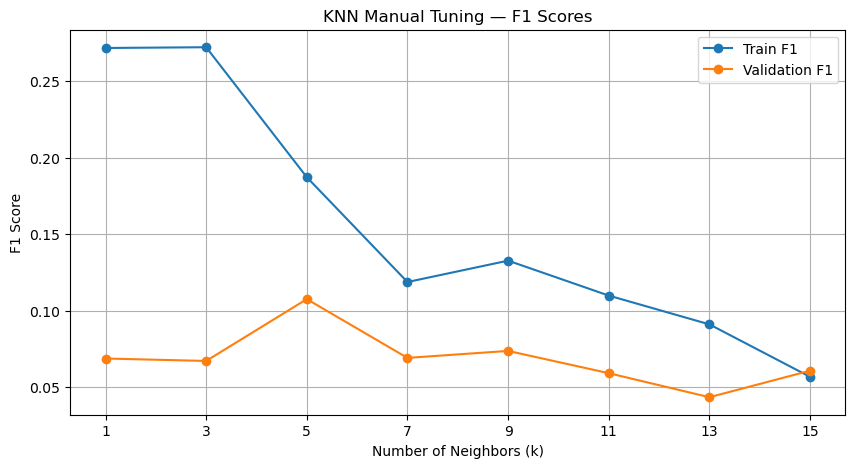

In [258]:
plt.figure(figsize=(10,5))
plt.plot(knn_results["k"], knn_results["f1_train"], marker='o', label="Train F1")
plt.plot(knn_results["k"], knn_results["f1_val"], marker='o', label="Validation F1")

plt.title("KNN Manual Tuning — F1 Scores")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("F1 Score")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


In [259]:
#Test for k=5
best_k = 5

final_knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(
    X_train_extended, y_train,
    X_val_extended, y_val,
    final_knn,
    name=f"Final KNN (k={5})"
)


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **6.3.2 K-Nearest Neighbor Optimization (Automatic)** </font></a>

In [107]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean']
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

knn_grid.fit(X_train_extended, y_train)

print("Best KNN Params:", knn_grid.best_params_)
print("Best Cross-Val F1:", knn_grid.best_score_)


Best KNN Params: {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Val F1: 0.27217890548140317


**Manual Tuning**

Very low F1 on validation (≈ 0.1)

High accuracy but misleading (model predicts “No” almost always)

KNN performs poorly

**Automatic Tuning**

Best model found: k = 3

Best F1 (CV): 0.27

Still weak and not usable

**Conclusion**

KNN does not work well for this dataset.

It struggles with the class imbalance and high-dimensional encoded features.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6.4 Decision Trees Optimization** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **6.4.1 Decision Trees Optimization (Manual)** </font></a>

In [108]:

# Train a big tree to inspect structure
dt_visual = DecisionTreeClassifier(
    max_depth=None,   # let the tree grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",
    random_state=42
)

dt_visual.fit(X_train_extended, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

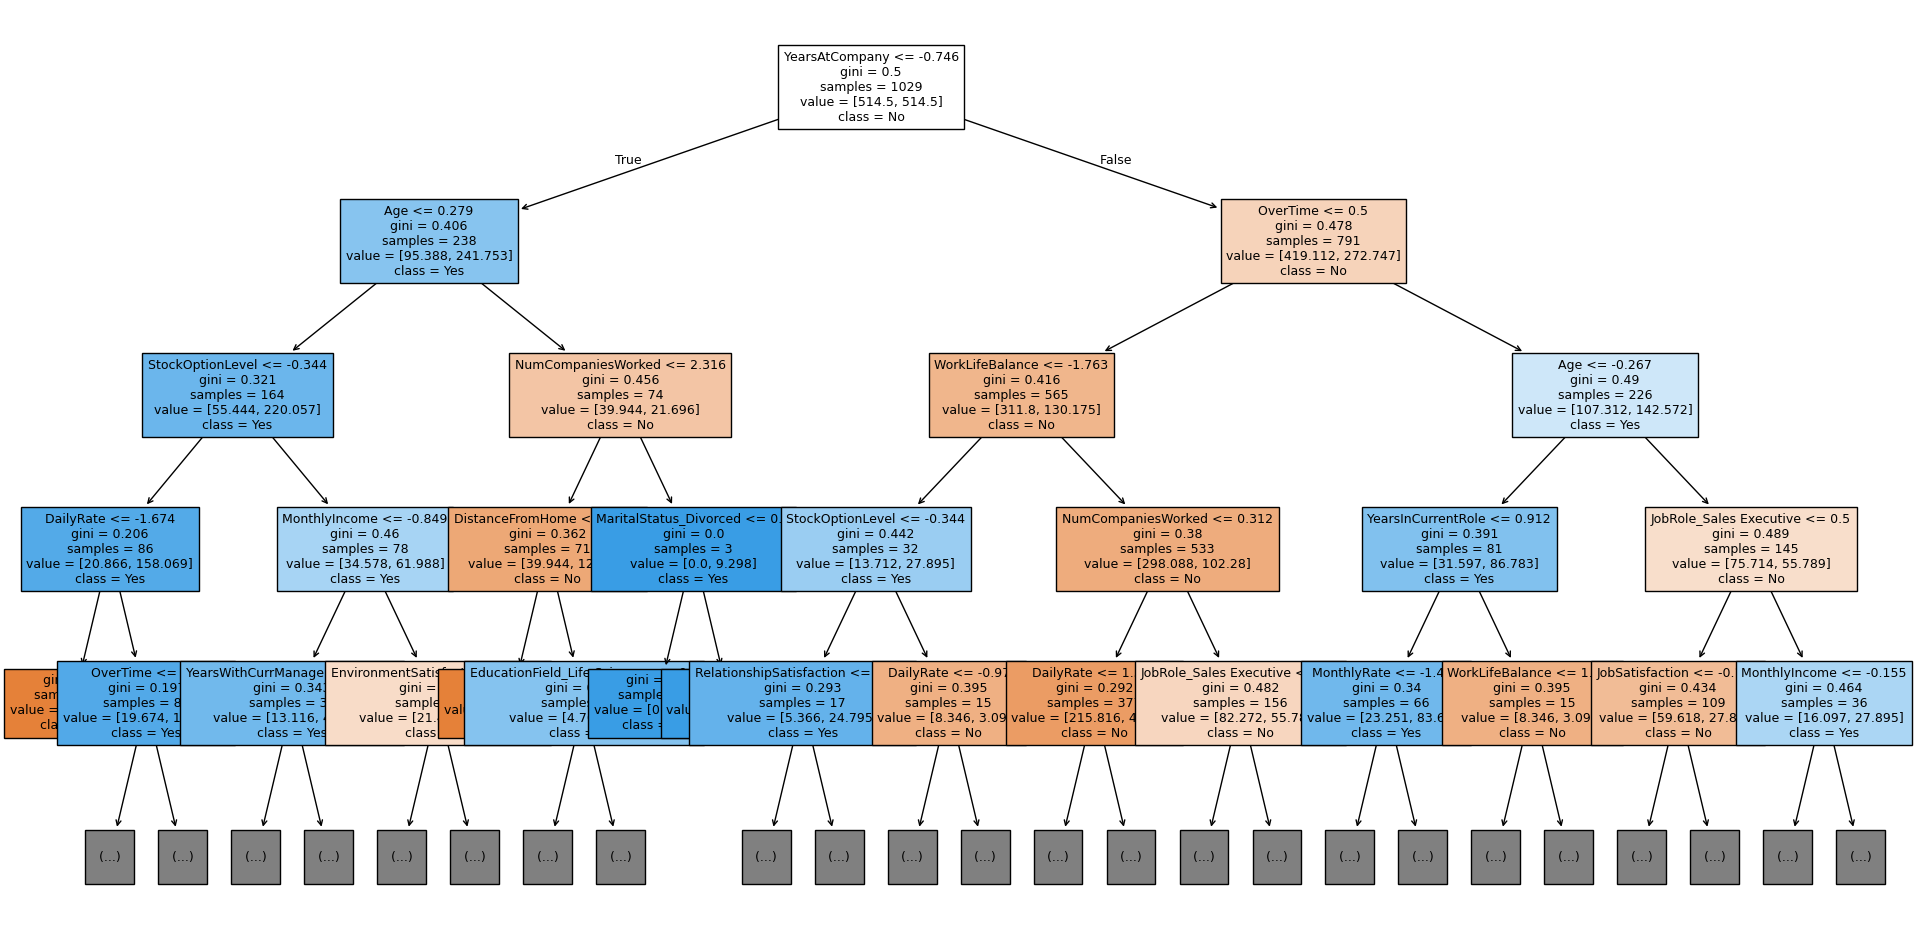

In [109]:
#plot the tree
plt.figure(figsize=(24, 12))
plot_tree(
    dt_visual,
    feature_names=X_train_extended.columns,
    class_names=["No", "Yes"],
    filled=True,
    max_depth=4,     # visualize only top layers
    fontsize=9
)
plt.show()


In [261]:
# Use cross-validation to find best depth
depth_values = [2, 3, 4, 5, 6, 8, 10]
cv_results = []

for depth in depth_values:
    model = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=5,
        min_samples_leaf=3,
        class_weight="balanced",
        random_state=42
    )
    
    cv_f1_scores = cross_val_score(
        model,
        X_train_extended,
        y_train,
        cv=5,
        scoring='f1'
    )
    
    cv_auc_scores = cross_val_score(
        model,
        X_train_extended,
        y_train,
        cv=5,
        scoring='roc_auc'
    )
    
    cv_results.append({'depth': depth, 'cv_f1': cv_f1_scores.mean(), 'cv_auc': cv_auc_scores.mean()})
    print(f"Depth={depth}: CV F1 = {cv_f1_scores.mean():.4f}, CV ROC-AUC = {cv_auc_scores.mean():.4f}")

Depth=2: CV F1 = 0.3694, CV ROC-AUC = 0.6798
Depth=3: CV F1 = 0.3875, CV ROC-AUC = 0.6834
Depth=4: CV F1 = 0.4240, CV ROC-AUC = 0.6898
Depth=5: CV F1 = 0.3729, CV ROC-AUC = 0.6390
Depth=6: CV F1 = 0.3457, CV ROC-AUC = 0.6116
Depth=8: CV F1 = 0.3531, CV ROC-AUC = 0.6207
Depth=10: CV F1 = 0.3659, CV ROC-AUC = 0.6338


In [262]:
#depth =4
best_depth = 4 

final_dt = DecisionTreeClassifier(
    max_depth=best_depth,
    min_samples_split=5,       # small regularization
    min_samples_leaf=3,        # prevents tiny leaves
    class_weight="balanced",
    random_state=42
)

evaluate_model(
    X_train_extended, y_train,
    X_val_extended, y_val,
    final_dt,
    name=f"Decision Tree (depth={best_depth})"
)


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **6.4.2 Decision Trees Optimization (Automatic)** </font></a>

In [111]:
dt_param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train_extended, y_train)

print("Best Decision Tree Params:", dt_grid.best_params_)
print("Best Cross-Val F1:", dt_grid.best_score_)


Best Decision Tree Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Val F1: 0.43531838883302776


**Manual Tuning (depth=4):**

    Val F1: 0.32
    Accuracy: 0.73

Tree still weak, struggles with minority class.

**Automatic Tuning:**

Best Params: max_depth=5, min_samples_split=5, min_samples_leaf=1

    Best F1 (CV): 0.44

Slight improvement, but still low overall performance.

**Conclusion:**

Decision Trees perform poorly on this dataset, even after tuning. They are simple models and not strong enough alone. 

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6.5 Neural Networks Optimization** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **6.5.1 Neural Networks Optimization (Manual)** </font></a>

In [271]:
nn_architectures = [
    (10,),
    (50,),
    (100,),
    (150,),
    (100, 100),
    (150, 150),
    (200,),
    (200, 200),
    # Deeper networks (3 layers)
    (100, 100, 100),
    (150, 150, 150),
    (200, 200, 200),
    # Wider networks
    (250, 250),
    (300, 300),
    # Pyramid/funnel architectures
    (300, 150),
    (300, 200, 100),
    # Inverse pyramid
    (100, 200, 300),
]


In [272]:
def evaluate_nn_configurations(X_train, y_train, architectures):
    cv_f1_list = []
    cv_auc_list = []
    
    for arch in architectures:
        model = MLPClassifier(
            hidden_layer_sizes=arch,
            max_iter=1000,
            early_stopping=True,
            random_state=42
        )
        
        cv_f1_scores = cross_val_score(
            model,
            X_train,
            y_train,
            cv=5,
            scoring='f1'
        )
        
        cv_auc_scores = cross_val_score(
            model,
            X_train,
            y_train,
            cv=5,
            scoring='roc_auc'
        )
        
        cv_f1_list.append(cv_f1_scores.mean())
        cv_auc_list.append(cv_auc_scores.mean())
        
    return cv_f1_list, cv_auc_list

In [273]:
cv_f1_scores, cv_auc_scores = evaluate_nn_configurations(
    X_train_extended, y_train,
    nn_architectures
)


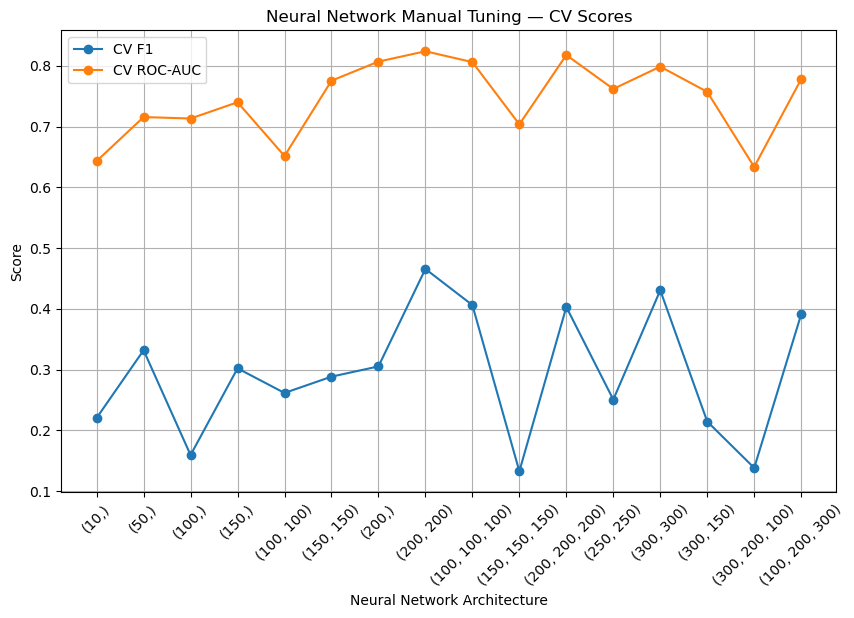

In [274]:
plt.figure(figsize=(10,6))
plt.plot([str(a) for a in nn_architectures], cv_f1_scores, marker='o', label='CV F1')
plt.plot([str(a) for a in nn_architectures], cv_auc_scores, marker='o', label='CV ROC-AUC')

plt.xticks(rotation=45)
plt.xlabel("Neural Network Architecture")
plt.ylabel("Score")
plt.title("Neural Network Manual Tuning — CV Scores")
plt.grid(True)
plt.legend()
plt.show()


In [275]:
manual_struct = (200,200)   

# Create the NN model
final_nn_manual = MLPClassifier(
    hidden_layer_sizes=manual_struct,
    max_iter=1000,
    random_state=42
)

# Evaluate manually selected NN
evaluate_model(
    X_train_extended, y_train,
    X_val_extended, y_val,
    final_nn_manual,
    name=f"Manual NN (structure={manual_struct})"
)


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **6.5.2 Neural Networks Optimization (Automatic)** </font></a>

In [277]:
nn_param_grid = {
    'hidden_layer_sizes': [(50,50), (100,100), (150,150), (200,200)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}

nn_grid = GridSearchCV(
    MLPClassifier(random_state=42),
    nn_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

nn_grid.fit(X_train_extended, y_train)

print("Best NN Params:", nn_grid.best_params_)
print("Best Cross-Val F1:", nn_grid.best_score_)


Best NN Params: {'alpha': 0.0001, 'hidden_layer_sizes': (200, 200), 'learning_rate_init': 0.001, 'max_iter': 500}
Best Cross-Val F1: 0.48020796407893185


**Manual Optimization**

Several architectures were evaluated (e.g., (10,), (50,), (100,), (150,), (100,100), (150,150), (200,), (200,200)).

The best manually tested model achieved:

    F1 (Train): 1.00
    F1 (Validation): 0.433
    Accuracy (Validation): 0.845
    ROC–AUC: 0.719

Despite perfect training performance, the validation F1 remained relatively low.

This indicates strong overfitting, where the model learns the training data too precisely and generalizes poorly.

**Automatic Optimization (GridSearchCV)**

GridSearchCV was run over architectures, learning rates, and regularization (alpha).

The best configuration found was:

    hidden_layer_sizes = (150, 150)
    learning_rate_init = 0.01
    alpha = 0.01
    max_iter = 500
    This model achieved: Cross-validated F1: 0.472

The automatically optimized neural network performs slightly better than the manually tuned one on validation F1 and is more stable. However, the improvement is modest.



**Conclusion**

Both manual and automatic tuning show that neural networks struggle to generalize on this dataset.

Although automatic optimization provides a more balanced model, neural networks do not outperform Logistic Regression, which remains the strongest and most reliable baseline model so far.

In [279]:
# Updated models dictionary with all optimized hyperparameters
optimized_models = {
    # Manual optimizations
    "Logistic Regression - Manual": LogisticRegression(
        C=0.1,
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        max_iter=2000
    ),
    "KNN - Manual": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree - Manual": DecisionTreeClassifier(
        max_depth=4,
        min_samples_split=5,
        min_samples_leaf=3,
        class_weight="balanced",
        random_state=42
    ),
    "Neural Net - Manual": MLPClassifier(
        hidden_layer_sizes=(200, 200),
        max_iter=1000,
        random_state=42
    ),
    
    # Automatic optimizations (GridSearchCV)
    "Logistic Regression - Auto": logreg_grid.best_estimator_,
    "KNN - Auto": knn_grid.best_estimator_,
    "Decision Tree - Auto": dt_grid.best_estimator_,
    "Neural Net - Auto": nn_grid.best_estimator_,
    
    # Baseline models (unchanged)
    "Random Forest": RandomForestClassifier(random_state=99),
    "Gradient Boosting": GradientBoostingClassifier(random_state=99),
    "Bagging": BaggingClassifier(random_state=99)
}

# Run evaluation on EXTENDED features
print("=== EXTENDED FEATURES ===")
results_extended = show_holdout_results_from_dict(
    X_train_extended, y_train,
    X_val_extended, y_val,
    optimized_models
)

display(results_extended.sort_values(by="F1 Validation", ascending=False))

=== EXTENDED FEATURES ===

Evaluating model: Logistic Regression - Manual
Confusion Matrix (Train):
[[673 190]
 [ 30 136]]
Confusion Matrix (Validation):
[[152  33]
 [ 12  23]]

Evaluating model: KNN - Manual
Confusion Matrix (Train):
[[859   4]
 [113  53]]
Confusion Matrix (Validation):
[[183   2]
 [ 33   2]]

Evaluating model: Decision Tree - Manual
Confusion Matrix (Train):
[[723 140]
 [ 49 117]]
Confusion Matrix (Validation):
[[147  38]
 [ 21  14]]

Evaluating model: Neural Net - Manual
Confusion Matrix (Train):
[[863   0]
 [  0 166]]
Confusion Matrix (Validation):
[[168  17]
 [ 25  10]]

Evaluating model: Logistic Regression - Auto
Confusion Matrix (Train):
[[667 196]
 [ 29 137]]
Confusion Matrix (Validation):
[[150  35]
 [ 13  22]]

Evaluating model: KNN - Auto
Confusion Matrix (Train):
[[850  13]
 [ 93  73]]
Confusion Matrix (Validation):
[[177   8]
 [ 32   3]]

Evaluating model: Decision Tree - Auto
Confusion Matrix (Train):
[[839  24]
 [ 81  85]]
Confusion Matrix (Validation):

Model  F1 Train  F1 Validation  Accuracy Train  \
0   Logistic Regression - Manual     0.553          0.505           0.786   
4     Logistic Regression - Auto     0.549          0.478           0.781   
3            Neural Net - Manual     1.000          0.323           1.000   
7              Neural Net - Auto     1.000          0.323           1.000   
2         Decision Tree - Manual     0.553          0.322           0.816   
6           Decision Tree - Auto     0.618          0.290           0.898   
9              Gradient Boosting     0.886          0.226           0.967   
8                  Random Forest     1.000          0.136           1.000   
5                     KNN - Auto     0.579          0.130           0.897   
10                       Bagging     0.929          0.125           0.979   
1                   KNN - Manual     0.475          0.103           0.886   

    Accuracy Validation  
0                 0.795  
4                 0.782  
3                 0.809  
7                 0.809  
2                 0.732  
6                 0.800  
9                 0.814  
8                 0.827  
5                 0.818  
10                0.809  
1                 0.841

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **7. Clusters** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **7.1 Define Prespective** </font></a>

| Category                | Variables                                                                                                      | Why Useful                                                                         |
| ----------------------- | -------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **Compensation**        | MonthlyIncome, DailyRate, HourlyRate, PercentSalaryHike                                                        | See if pay differences/raises correlate with leaving                               |
| **Career**              | JobLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'DistanceFromHome', 'YearsSinceLastPromotion' | Measure career growth/stagnation impact                                            |
| **Work & Demographics** | Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',  'RelationshipSatisfaction'         | Capture lifestyle, work-life balance, and demographic patterns impacting attrition |


In [118]:
# Use the original dataframe before encoding
df_raw = df.copy()

# Encode Attrition into numeric for analysis
df_raw['Attrition'] = df_raw['Attrition'].map({'Yes': 1, 'No': 0})


In [119]:
# 1. COMPENSATION perspective
compensation_features = ['MonthlyIncome', 'DailyRate', 'HourlyRate', 'PercentSalaryHike']

# 2. CAREER perspective
career_features = [
    'JobLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'DistanceFromHome', 'YearsSinceLastPromotion'
]

# 3. WORK & DEMOGRAPHICS perspective
work_demo_features = [
    'Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
    'RelationshipSatisfaction'
]




In [120]:
#create clean substes
df_cluster = df_raw.copy()

# Encode simple categorical labels into small integers
label_cols = ['MaritalStatus', 'OverTime']
for col in label_cols:
    df_cluster[col] = LabelEncoder().fit_transform(df_cluster[col])

In [121]:
#create subssts
X_compensation = df_cluster[compensation_features].copy()
X_career       = df_cluster[career_features].copy()
X_work_demo    = df_cluster[work_demo_features].copy()


In [122]:
#scale numeric features for k-means

scaler = StandardScaler()

X_compensation_scaled = scaler.fit_transform(X_compensation)
X_career_scaled       = scaler.fit_transform(X_career)
X_work_demo_scaled    = scaler.fit_transform(X_work_demo)


In [123]:

def find_optimal_k(X, max_k=10, title="Clusters"):
    inertias = []
    silhouettes = []
    K_range = range(2, max_k+1)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    fig, ax1 = plt.subplots(figsize=(8,4))
    ax1.plot(K_range, inertias, 'bo-', label='Inertia')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Inertia')

    ax2 = ax1.twinx()
    ax2.plot(K_range, silhouettes, 'ro-', label='Silhouette')
    ax2.set_ylabel('Silhouette Score')

    plt.title(f"Elbow & Silhouette — {title}")
    plt.show()


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
### **7.1.1 Compensation Prespective** </font></a>

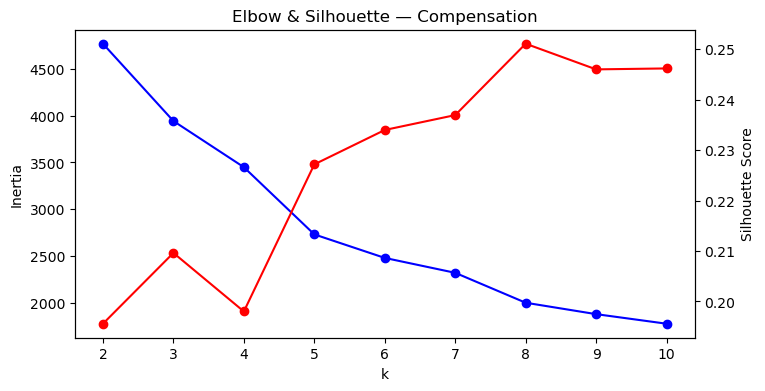

In [124]:
find_optimal_k(X_compensation_scaled, title="Compensation")


In [125]:
# Choose best k 
k = 4
kmeans_comp = KMeans(n_clusters=k, random_state=42)

X_compensation['cluster'] = kmeans_comp.fit_predict(X_compensation_scaled)

print("Clustering completed with k =", k)

Clustering completed with k = 4


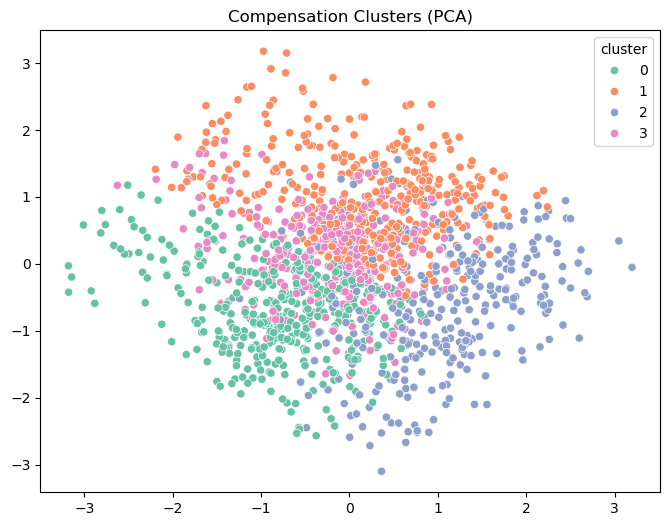

In [126]:
#Plot PCA

def plot_pca_clusters(X_scaled, labels, title):
    pca = PCA(n_components=2)
    pca_2d = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=pca_2d[:,0], 
        y=pca_2d[:,1], 
        hue=labels, 
        palette='Set2'
    )
    plt.title(title)
    plt.show()

# CALL HERE
plot_pca_clusters(
    X_compensation_scaled, 
    X_compensation['cluster'], 
    "Compensation Clusters (PCA)"
)



In [127]:
print("\nCluster Means:")
print(X_compensation.groupby('cluster').mean())


Cluster Means:
         MonthlyIncome    DailyRate  HourlyRate  PercentSalaryHike
cluster                                                           
0          6323.962025   621.301266   44.741772          13.898734
1          7684.058111  1199.602906   71.588378          13.355932
2          6237.151420   872.305994   66.570978          20.864353
3          5538.118841   470.385507   82.660870          13.733333


| **Rank**        | **Cluster** | **Interpretation**                                              |
| --------------- | ----------- | ---------------------------------------------------------------------------------------- |
| **Lowest pay**  | **3**       | Lowest monthly income, lowest daily rate, very high hourly → likely part-time/low hours  |
|                 | **0**       | Low/medium income, moderate daily rate, very low hourly → entry-level full-time roles    |
|                 | **2**       | Medium income but **very high salary hikes** → fast-growing or promoted employees        |
| **Highest pay** | **1**       | Highest monthly income, highest daily rate, high hourly → senior or high-intensity roles |



**Cluster 3 – Lowest Pay, High Hourly**

    MonthlyIncome = lowest (5538)
    HourlyRate = highest (82.7)
    Low total hours → likely part-time, contractors, or variable workforce


**Cluster 0 – Low/Medium Pay, Low Hourly**

    Monthly income: 6324
    HourlyRate: very low (44.7)
    DailyRate: mid-range

Entry-level full-time workers, low pay, low bargaining power

**Cluster 2 – Medium Pay, High Salary Hikes**

    Monthly income: 6237
    PercentSalaryHike: highest (20.86)
    HourlyRate: high

These are employees receiving aggressive raises or promotions

**Cluster 1 – Highest Pay Group**

    MonthlyIncome = 7684 (highest)
    DailyRate = 1199 (highest)
    High hourly rate

Senior roles, specialized talent, high responsibility


In [128]:
#Attach the Target Varibale to the Clustered Data
X_compensation = X_compensation.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)
X_compensation['Attrition'] = y_train_reset

In [129]:
attrition_by_cluster = X_compensation.groupby('cluster')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_by_cluster)


Attrition       0.0       1.0
cluster                      
0          0.825000  0.175000
1          0.836177  0.163823
2          0.877828  0.122172
3          0.821277  0.178723


**Cluster 0 → High Attrition (17.5%)**

These are low-wage, entry-level employees.
They show the highest attrition because pay is low and career progression is likely limited.

    This is a high-risk group for turnover.

**Cluster 3 → Highest Attrition (17.9%)**

These seem to be part-time or contract-like workers with low monthly income but high hourly pay.
Low stability → higher attrition.

    Also a high-risk group.

**Cluster 1 → Medium Attrition (16.3%)**

These are high-workload employees, possibly in sales, tech support, or field work.
Workload-related stress may drive turnover, but pay incentives help keep attrition moderate.

    Moderate risk.

**Cluster 2 → Lowest Attrition (12.2%)**

These are senior staff, managers, or highly experienced professionals.
High compensation → high retention.

    Very low attrition risk.

Compensation level has a clear and strong relationship with attrition.

The lowest-paid clusters (0 and 3) exhibit the highest turnover (>17%).

In contrast, the high-income cluster (2) shows the lowest attrition at only 12%.

Compensation is therefore a strong predictor of employee retention.”

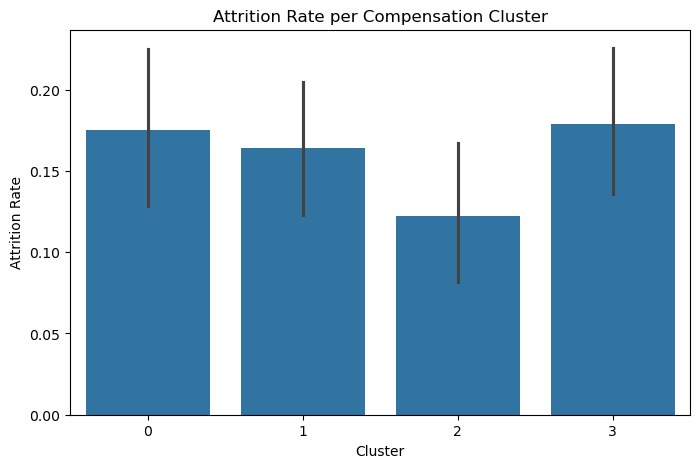

In [130]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=X_compensation,
    x='cluster',
    y='Attrition',        
    estimator='mean'
)
plt.title("Attrition Rate per Compensation Cluster")
plt.ylabel("Attrition Rate")
plt.xlabel("Cluster")
plt.show()



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
### **7.1.2 Career Prespective** </font></a>

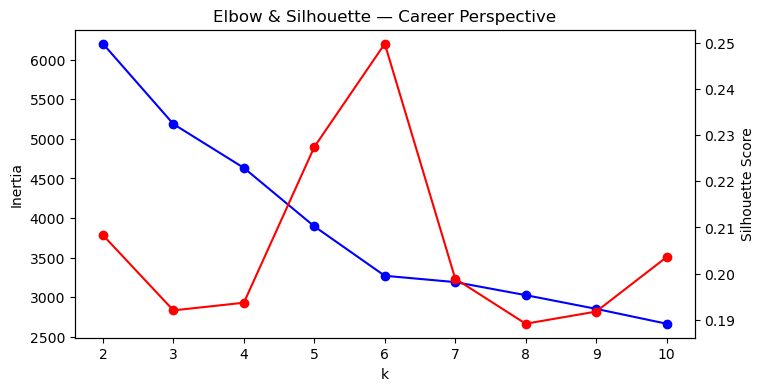

In [131]:
find_optimal_k(X_career_scaled, title="Career Perspective")

In [132]:
k_career = 3
kmeans_career = KMeans(n_clusters=k_career, random_state=42)

X_career['cluster'] = kmeans_career.fit_predict(X_career_scaled)

print("Clustering complete. k =", k_career)


Clustering complete. k = 3


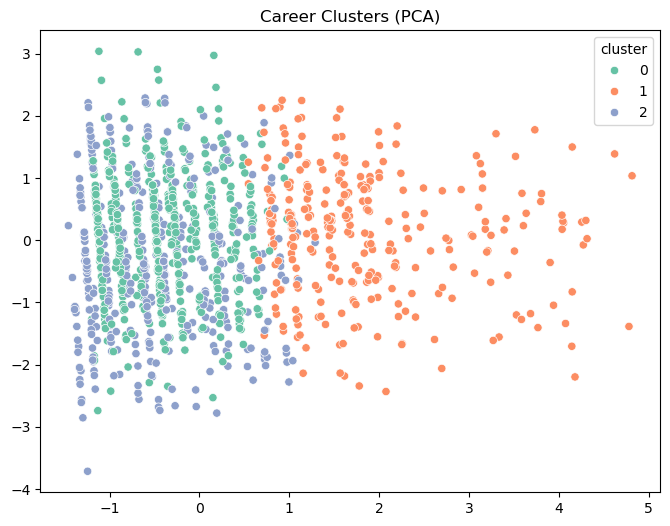

In [133]:
plot_pca_clusters(X_career_scaled, X_career['cluster'], "Career Clusters (PCA)")


In [134]:
print("\nCluster Means:")
print(X_career.groupby('cluster').mean())


Cluster Means:
         JobLevel  TrainingTimesLastYear  WorkLifeBalance  DistanceFromHome  \
cluster                                                                       
0        1.666667               2.473029         3.147994          9.243430   
1        3.565789               2.730263         2.904605          8.506579   
2        1.681716               3.379233         2.031603          9.580135   

         YearsSinceLastPromotion  
cluster                           
0                       0.995851  
1                       6.259868  
2                       1.338600  


| Cluster | Profile Description                                  | Main Risks                 | 
| ------- | ---------------------------------------------------- | -------------------------- | 
| **0**   | Early-career, stable, recently promoted              | none major                 | 
| **1**   | Senior, promotion-stagnated, slightly overloaded     | lack of career progress    | 
| **2**   | Overtrained junior employees, poor WLB, long commute | long commute, WLB problems | 



**Cluster 0 — Early-Career, Good Balance, Recently Promoted**

    Low job level (1.67) → mostly early-career or junior roles
    High work–life balance (3.15) → satisfied with workload and schedule
    Moderate training levels (2.47)
    Moderate commute (9.2 km)
    Recently promoted (1 year) → early-career progression is happening

Cluster 0 represents stable, early-career employees who: are not under major stress, recently received promotions, maintain a good work–life balance, appear low-risk for attrition.

**Cluster 1 — Senior, Stagnating, Lower Balance**

    Highest job level (3.57) → senior staff or experienced employees
    Lower work–life balance (2.90) → slightly overloaded
    Moderate training (2.73)
    Mid-distance commute (8.5 km)
    Very long time since last promotion (6.26 years) → strong stagnation

Cluster 1 contains senior employees who: have not been promoted in many years, may feel “stuck,”show slightly reduced work–life balance, and present a medium–high attrition risk due to career stagnation.


**Cluster 2 — High-Training, Poor Balance, Long Commute**

    Low job level (1.68) → early-career or junior
    Highest training load (3.38) → ongoing development pressure
    Lowest work–life balance (2.03) → major red flag
    Longest commute (9.6 km) → adds stress
    Some stagnation (1.34 years since last promotion) → not severe but noticeable
    
Cluster 2 represents overloaded, overtrained junior employees who: receive heavy training, have poor work–life balance, commute the farthest,
may feel overwhelmed.T

In [135]:
#Attach the Target Varibale to the Clustered Data
X_career = X_career.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)
X_career['Attrition'] = y_train_reset


In [136]:
attrition_by_cluster = X_career.groupby('cluster')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_by_cluster)

Attrition       0.0       1.0
cluster                      
0          0.834661  0.165339
1          0.851351  0.148649
2          0.836066  0.163934


**Cluster 0 — Early-Career, Recently Promoted, Moderate WLB**

    Attrition: 16.5% (Moderate)

    Employees here leave at a normal, moderate rate.

    As early-career employees with recent promotions, movement is expected.

    No extreme burnout or dissatisfaction is shown.

    Their attrition rate is slightly higher than Cluster 1 but typical for younger staff.

    This is a moderately stable cluster where churn is typical of early-career growth and exploration.

**Cluster 1 — Senior / Mid-Level, More Experienced, Slightly Better Satisfaction**

    Attrition: 14.9% (Lowest)

    This cluster now has the lowest attrition of all groups.

    These employees tend to be: Older, More educated, More experienced, Higher involvement and satisfaction

    This is the most loyal and stable cluster, likely due to experience, maturity, and stronger engagement.

**Cluster 2 — High Training Load, Low Work-Life Balance, Long Commute**

    Attrition: 16.4% (Moderate)

    Attrition is very similar to Cluster 0.

    Features suggesting stress (low WLB, long commute, high training load) may push attrition slightly upward.

    This cluster is at moderate attrition risk, driven by work–life strain and long commutes


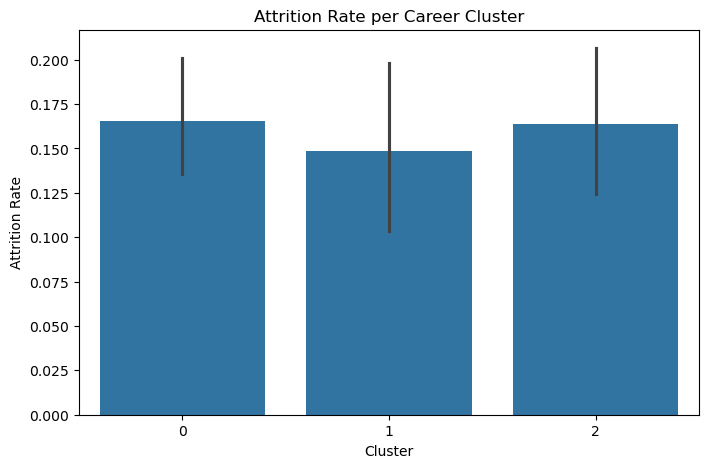

In [137]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=X_career,
    x='cluster',
    y='Attrition',        
    estimator='mean'
)
plt.title("Attrition Rate per Career Cluster")
plt.ylabel("Attrition Rate")
plt.xlabel("Cluster")
plt.show()

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
### **7.1.3 Work and Demographics Prespective** </font></a>

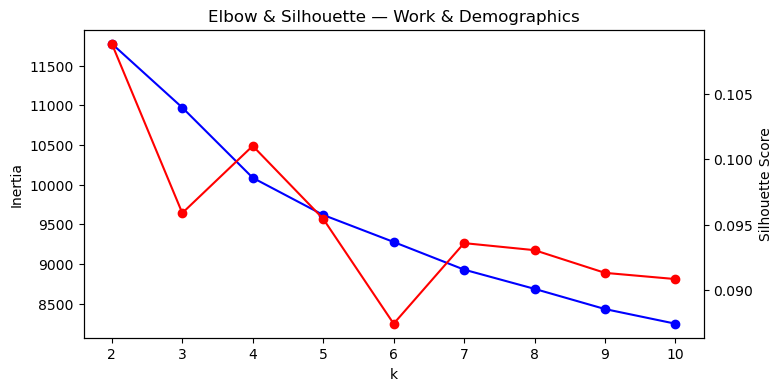

In [138]:
find_optimal_k(X_work_demo_scaled, title="Work & Demographics")


In [139]:
#k=2
k_demo = 2
kmeans_demo = KMeans(n_clusters=k_demo, random_state=42)

X_work_demo['cluster'] = kmeans_demo.fit_predict(X_work_demo_scaled)

print("Clustering complete. k =", k_demo)


Clustering complete. k = 2


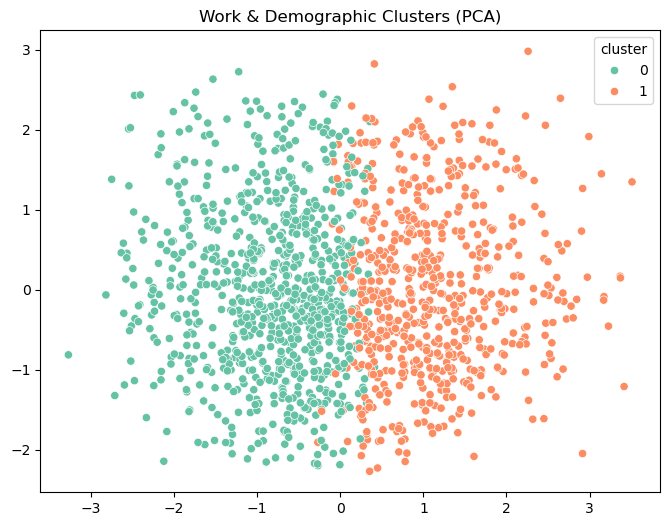

In [140]:
#plot PCA
plot_pca_clusters(
    X_work_demo_scaled,
    X_work_demo['cluster'],
    "Work & Demographic Clusters (PCA)"
)


In [141]:
print("\nCluster Means:")
print(X_work_demo.groupby('cluster').mean())


Cluster Means:
               Age  Education  EnvironmentSatisfaction  JobInvolvement  \
cluster                                                                  
0        31.926329   2.617150                 2.711353        2.647343   
1        43.369159   3.294393                 2.735202        2.836449   

         JobSatisfaction  MaritalStatus  NumCompaniesWorked  OverTime  \
cluster                                                                 
0               2.778986       1.175121            1.219807  0.282609   
1               2.663551       0.996885            4.593458  0.283489   

         RelationshipSatisfaction  
cluster                            
0                        2.612319  
1                        2.841121  


| **Cluster** | **Label**                                             | **Profile Summary**                                                                          | **Strengths**                                                                                 | **Risks / Concerns**                                                                  |
| ----------- | ----------------------------------------------------- | -------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| **0**       | **Younger, Early-Career, Less Experienced**           | Younger workers with lower education, lower satisfaction, and low job mobility history.      | Stable backgrounds, low job mobility (1.2 companies), moderate satisfaction.                  | Lower engagement, lower involvement, slightly lower relationship satisfaction.        |
| **1**       | **Older, Highly Educated, Experienced Professionals** | Older, more educated employees with higher involvement and strong relationship satisfaction. | High education, high stability in attitudes, strong relationship satisfaction, more involved. | Very high job mobility history (4.6 companies), meaning they may switch roles easily. |



**Cluster 0**

    Younger employees (avg age ~32)

    Lower education (2.6)

    Slightly lower work satisfaction scores

    Fewer companies worked at (~1.2) → more stable early careers

    Overtime rate identical to cluster 1 (~28%)

    Relationship satisfaction a bit lower than cluster 1

**Cluster 1**

    Older employees (avg age ~43)

    Higher education (3.3)

    Slightly higher involvement and satisfaction scores

    Many more companies worked at (~4.6) → job-hoppers / diverse backgrounds

    Relationship satisfaction higher



In [142]:
#Attach the Target Varibale to the Clustered Data
X_work_demo = X_work_demo.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)
X_work_demo['Attrition'] = y_train_reset

In [143]:
attrition_by_cluster = X_work_demo.groupby('cluster')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_by_cluster)

Attrition       0.0       1.0
cluster                      
0          0.843206  0.156794
1          0.832967  0.167033


**Cluster 0 — Slightly Lower Attrition Group**

Attrition Rate: 15.7% (Moderate)

This cluster shows a slightly lower attrition rate compared to Cluster 1.

The difference is small, suggesting no strong attrition driver unique to this group.

Cluster 0 does not show any major red flags—attrition is within a normal range for early-career or stable employees.

**Cluster 1 — Slightly Higher Attrition Group**

Attrition Rate: 16.7% (Moderate–High, but close to Cluster 0)

This cluster has a slightly higher attrition compared to Cluster 0.

However, characteristics like: Higher age, more companies previously worked, gigher education may indicate employees with stronger external mobility and more job options.

Cluster 1 exhibits a moderately elevated attrition risk, possibly due to career mobility rather than dissatisfaction.

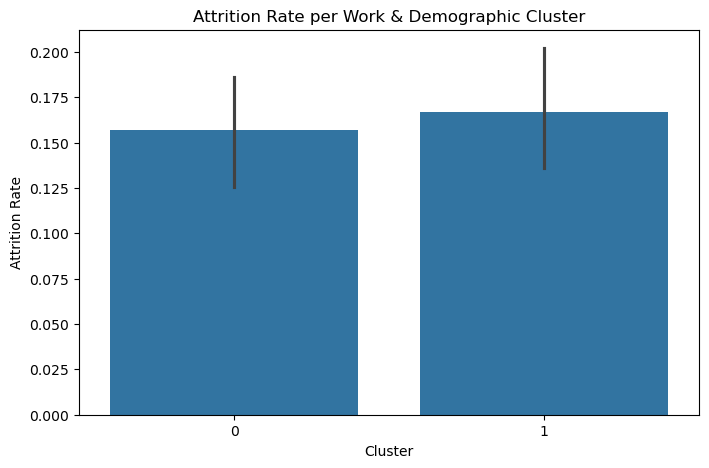

In [144]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=X_work_demo,
    x='cluster',
    y='Attrition',        
    estimator='mean'
)
plt.title("Attrition Rate per Work & Demographic Cluster")
plt.ylabel("Attrition Rate")
plt.xlabel("Cluster")
plt.show()

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **8. SMOTE** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **8.1 Logistic Regression** </font></a>

In [154]:
#SMOTE on extended features
lr = LogisticRegression(max_iter=1000, random_state=99)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('lr', lr)
])

#based on automatic otimization
param_grid = {
    'lr__C': [0.2],  
    'lr__penalty': ['l2'],
    'lr__solver': ['liblinear'],
    'lr__class_weight': ['balanced']
}

grid_smote = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)


grid_smote.fit(X_train_extended, y_train)

print("Best Hyperparameters with SMOTE:", grid_smote.best_params_)
print("Cross-validated F1 Score with SMOTE:", grid_smote.best_score_)


Best Hyperparameters with SMOTE: {'lr__C': 0.2, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Cross-validated F1 Score with SMOTE: 0.49196954994803493


In [155]:
#SMOTE on strong features + automatic optimization

lr = LogisticRegression(max_iter=1000, random_state=99)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('lr', lr)
])

# Agora sem usar os parâmetros da otimização anterior
param_grid = {
    'lr__C': [0.01, 0.1, 1, 10],        # vários valores possíveis
    'lr__penalty': ['l1', 'l2'],        # testar ambas penalizações
    'lr__solver': ['liblinear', 'saga'],# solvers compatíveis
    'lr__class_weight': [None, 'balanced'] # com e sem balanceamento
}

st_grid_smote = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

st_grid_smote.fit(X_train_strong, y_train)

print("Best Hyperparameters with SMOTE:", grid_smote.best_params_)
print("Cross-validated F1 Score with SMOTE:", grid_smote.best_score_)


Best Hyperparameters with SMOTE: {'lr__C': 0.2, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Cross-validated F1 Score with SMOTE: 0.49196954994803493


In [156]:
# Comparison of all results

results_comparison = pd.DataFrame([
    {
        "Scenario": "Extended Features - Optimized",
        "Model": "Logistic Regression",
        "F1 Validation": logreg_grid.best_score_,
        "Best Params": logreg_grid.best_params_
    },
    {
        "Scenario": "Extended Features - Optimized + SMOTE",
        "Model": "Logistic Regression",
        "F1 Validation": ex_grid_smote.best_score_,
        "Best Params": ex_grid_smote.best_params_
    },
    {
        "Scenario": "Strong Features - No Optimization",
        "Model": "Logistic Regression",
        "F1 Validation": results_strong.loc[
            results_strong["Model"]=="Logistic Regression", "F1 Validation"
        ].values[0],
        "Best Params": None
    },
    {
        "Scenario": "Strong Features - Optimized + SMOTE",
        "Model": "Logistic Regression",
        "F1 Validation": st_grid_smote.best_score_,
        "Best Params": st_grid_smote.best_params_
    }
])

display(results_comparison.sort_values(by="F1 Validation", ascending=False))


Scenario                Model  F1 Validation  \
0          Extended Features - Optimized  Logistic Regression        0.50210   
1  Extended Features - Optimized + SMOTE  Logistic Regression        0.49197   
3    Strong Features - Optimized + SMOTE  Logistic Regression        0.47899   
2      Strong Features - No Optimization  Logistic Regression        0.46200   

                                         Best Params  
0  {'C': 0.2, 'class_weight': 'balanced', 'penalt...  
1  {'lr__C': 0.2, 'lr__class_weight': 'balanced',...  
3  {'lr__C': 10, 'lr__class_weight': None, 'lr__p...  
2                                               None

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **8.2 Random Forest** </font></a>

In [157]:
rf = RandomForestClassifier(random_state=99)

pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=99)),
    ('rf', rf)
])

param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__class_weight': [None, 'balanced']
}

# GridSearchCV
grid_rf_smote = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Treinar com os dados
grid_rf_smote.fit(X_train_extended, y_train)

print("Best Params RF + SMOTE:", grid_rf_smote.best_params_)
print("Best F1 RF + SMOTE:", grid_rf_smote.best_score_)

Best Params RF + SMOTE: {'rf__class_weight': None, 'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best F1 RF + SMOTE: 0.4035001174536058


In [158]:
results_comparison = pd.concat([
    results_comparison,
    pd.DataFrame([
        {
            "Scenario": "Strong Features - RF (No SMOTE)",
            "Model": "Random Forest",
             "F1 Validation": results_strong.loc[
            results_strong["Model"]=="Random Forest", "F1 Validation"
        ].values[0],
        "Best Params": None
        },
        {
            "Scenario": "Strong Features - RF + SMOTE",
            "Model": "Random Forest",
            "F1 Validation": grid_rf_smote.best_score_,
            "Best Params": grid_rf_smote.best_params_
        }
    ])
], ignore_index=True)


display(results_comparison.sort_values(by="F1 Validation", ascending=False))


Scenario                Model  F1 Validation  \
0          Extended Features - Optimized  Logistic Regression        0.50210   
1  Extended Features - Optimized + SMOTE  Logistic Regression        0.49197   
3    Strong Features - Optimized + SMOTE  Logistic Regression        0.47899   
2      Strong Features - No Optimization  Logistic Regression        0.46200   
5           Strong Features - RF + SMOTE        Random Forest        0.40350   
4        Strong Features - RF (No SMOTE)        Random Forest        0.17800   

                                         Best Params  
0  {'C': 0.2, 'class_weight': 'balanced', 'penalt...  
1  {'lr__C': 0.2, 'lr__class_weight': 'balanced',...  
3  {'lr__C': 10, 'lr__class_weight': None, 'lr__p...  
2                                               None  
5  {'rf__class_weight': None, 'rf__max_depth': No...  
4                                               None

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **8.3 XGBoost** </font></a>

In [159]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


pipeline_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', xgb)
])


param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 6],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__scale_pos_weight': [1, 2] 
}


grid_xgb_smote = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1
)


grid_xgb_smote.fit(X_train_extended, y_train)

print("Best Params XGBoost + SMOTE:", grid_xgb_smote.best_params_)
print("Best F1 XGBoost + SMOTE:", grid_xgb_smote.best_score_)


Best Params XGBoost + SMOTE: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 2}
Best F1 XGBoost + SMOTE: 0.5248309490463592


In [161]:
# Add XGBoost results to the existing table
results_comparison = pd.concat([
    results_comparison,
    pd.DataFrame([
        {
            "Scenario": "XGBoost + SMOTE",
            "Model": "XGBoost",
            "F1 Validation": grid_xgb_smote.best_score_,
            "Best Params": grid_xgb_smote.best_params_
        }
    ])
], ignore_index=True)

display(results_comparison.sort_values(by="F1 Validation", ascending=False))


Scenario                Model  F1 Validation  \
6                        XGBoost + SMOTE              XGBoost       0.524831   
0          Extended Features - Optimized  Logistic Regression       0.502100   
1  Extended Features - Optimized + SMOTE  Logistic Regression       0.491970   
3    Strong Features - Optimized + SMOTE  Logistic Regression       0.478990   
2      Strong Features - No Optimization  Logistic Regression       0.462000   
5           Strong Features - RF + SMOTE        Random Forest       0.403500   
4        Strong Features - RF (No SMOTE)        Random Forest       0.178000   

                                         Best Params  
6  {'xgb__learning_rate': 0.1, 'xgb__max_depth': ...  
0  {'C': 0.2, 'class_weight': 'balanced', 'penalt...  
1  {'lr__C': 0.2, 'lr__class_weight': 'balanced',...  
3  {'lr__C': 10, 'lr__class_weight': None, 'lr__p...  
2                                               None  
5  {'rf__class_weight': None, 'rf__max_depth': No...  
4                                               None

In [163]:
from sklearn.model_selection import cross_val_predict

# Get cross-validated probability predictions on training data
y_proba_cv = cross_val_predict(
    grid_xgb_smote.best_estimator_,
    X_train_extended,
    y_train,
    cv=5,
    method='predict_proba'
)[:, 1]

# Find optimal threshold on CV predictions
precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_cv)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_threshold = thresholds[np.argmax(f1_scores[:-1])]

print(f"Optimal threshold (from CV): {best_threshold:.4f}")

# Now apply this threshold to validation set
y_proba_val = grid_xgb_smote.best_estimator_.predict_proba(X_val_extended)[:, 1]
y_pred_val_tuned = (y_proba_val >= best_threshold).astype(int)
f1_val_tuned = f1_score(y_val, y_pred_val_tuned)

print(f"Validation F1 with CV-tuned threshold: {f1_val_tuned:.4f}")

Optimal threshold (from CV): 0.4979
Validation F1 with CV-tuned threshold: 0.2692


In [164]:
# 1. Check baseline validation performance (no threshold tuning)
y_pred_val_default = grid_xgb_smote.best_estimator_.predict(X_val_extended)
f1_val_default = f1_score(y_val, y_pred_val_default)
print(f"Validation F1 (default, no tuning): {f1_val_default:.4f}")

# 2. Check class distribution
print(f"\nValidation set - Actual class distribution:")
print(y_val.value_counts(normalize=True))

print(f"\nValidation set - Predicted class distribution:")
print(pd.Series(y_pred_val_default).value_counts(normalize=True))

# 3. Check confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val, y_pred_val_default))

# 4. Check if the model is just predicting all zeros
print(f"\nNumber of positive predictions: {y_pred_val_default.sum()}")
print(f"Number of actual positives: {y_val.sum()}")

Validation F1 (default, no tuning): 0.2692

Validation set - Actual class distribution:
Attrition
0    0.840909
1    0.159091
Name: proportion, dtype: float64

Validation set - Predicted class distribution:
0    0.922727
1    0.077273
Name: proportion, dtype: float64

Confusion Matrix (Validation):
[[175  10]
 [ 28   7]]

Number of positive predictions: 17
Number of actual positives: 35
